Loading required package: lattice
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


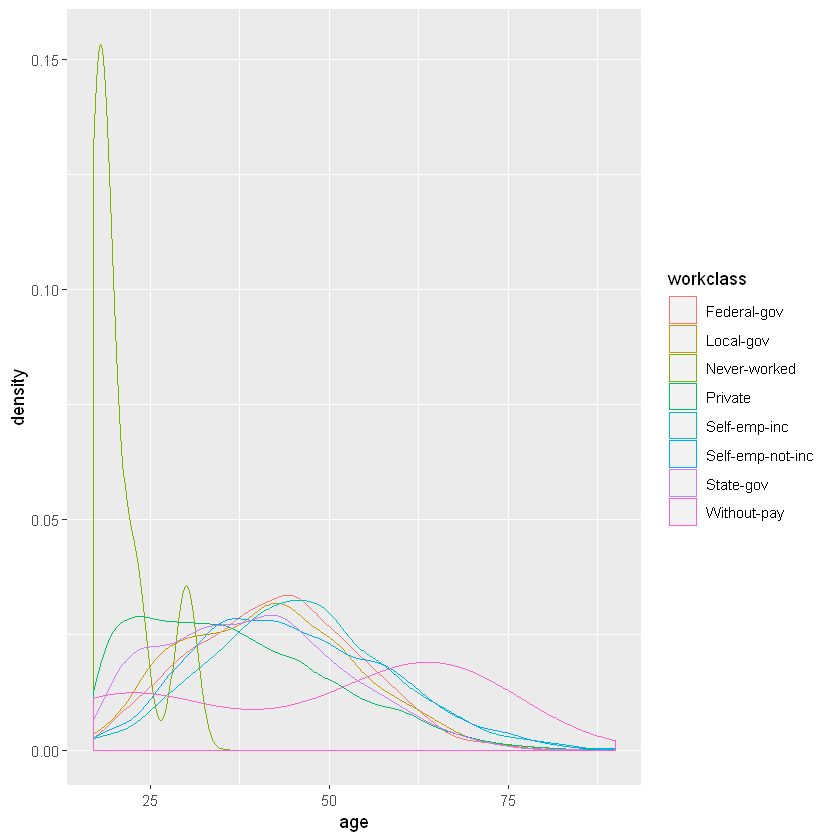

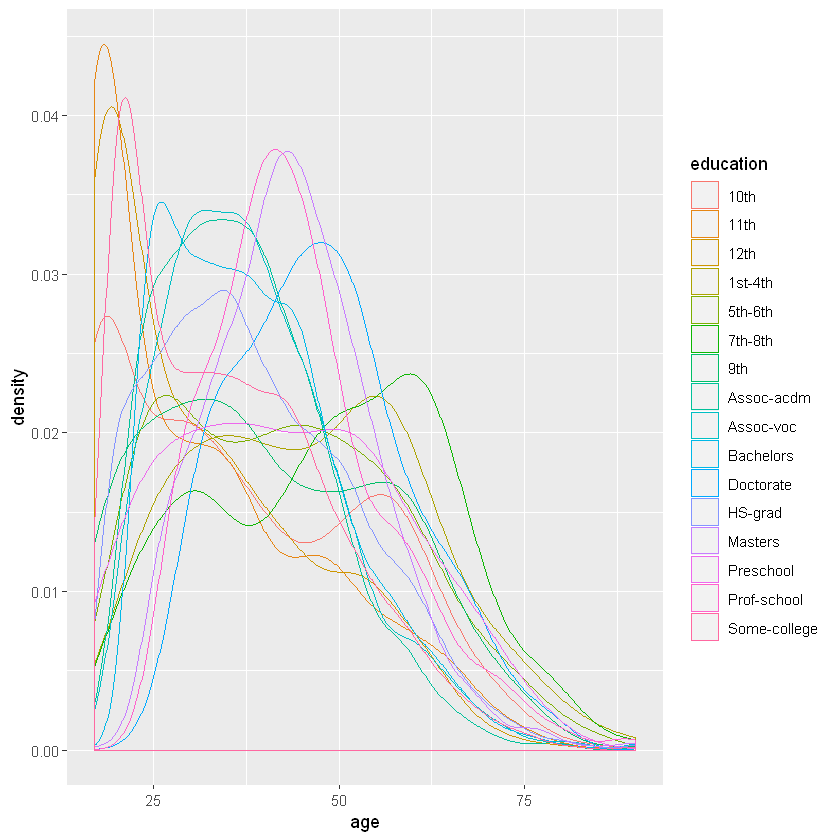

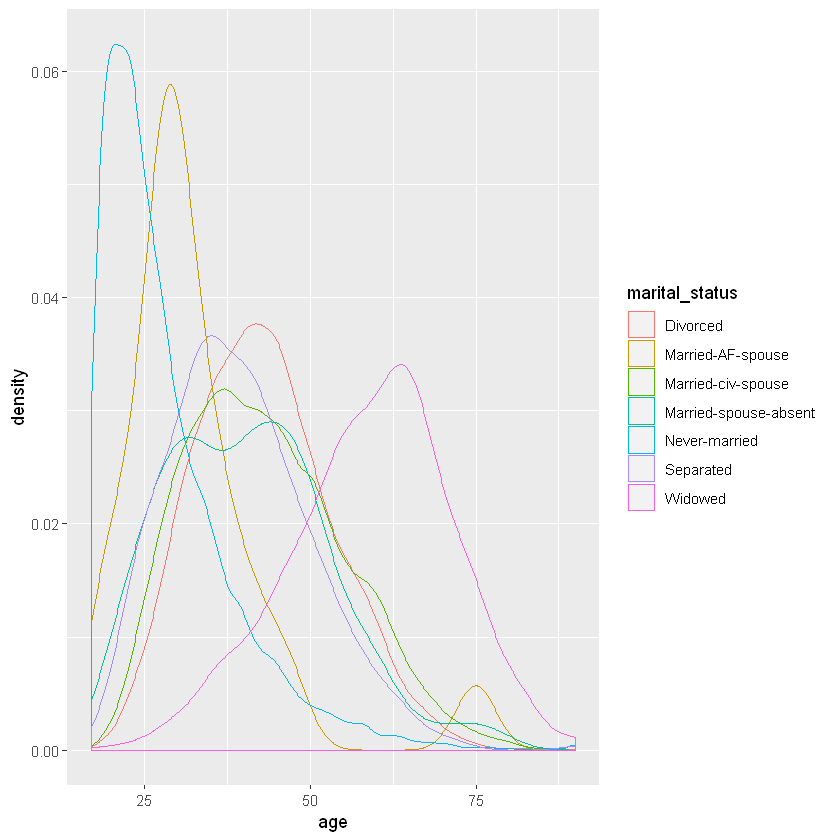

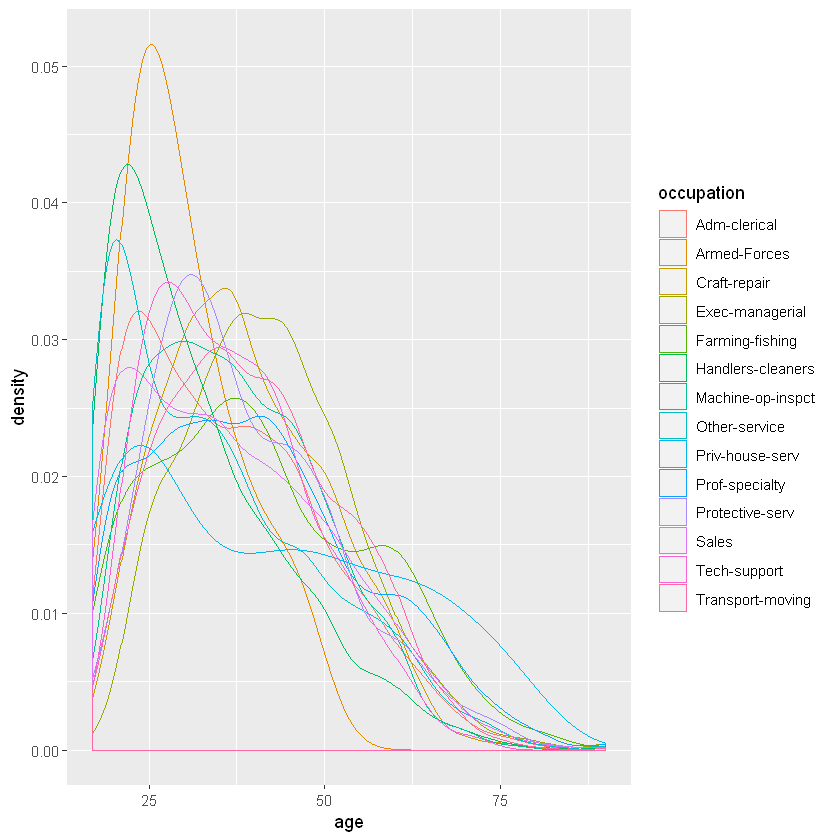

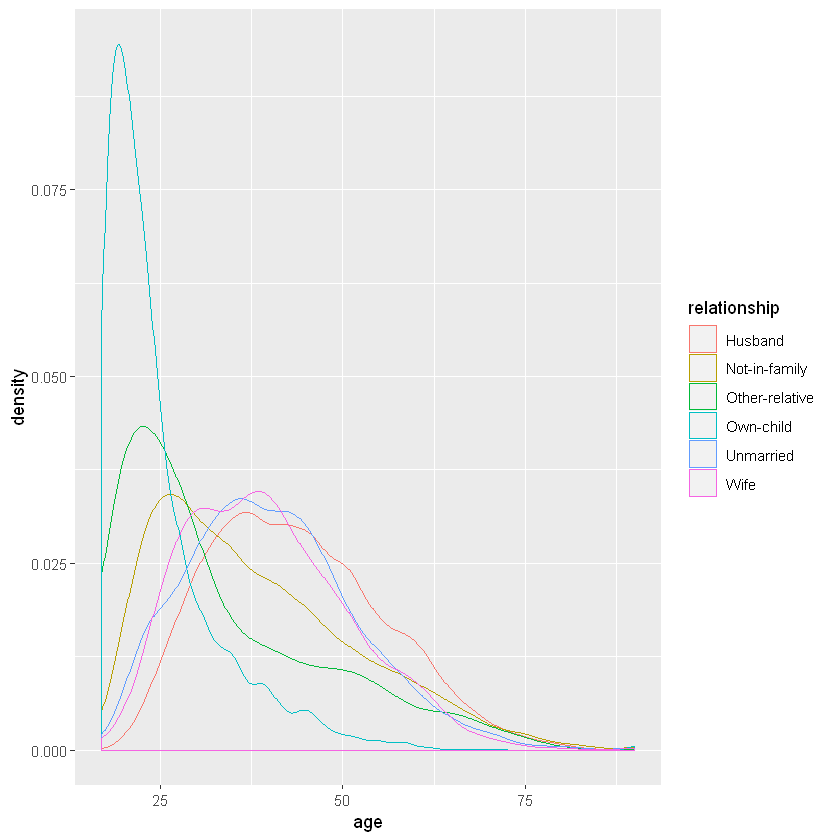

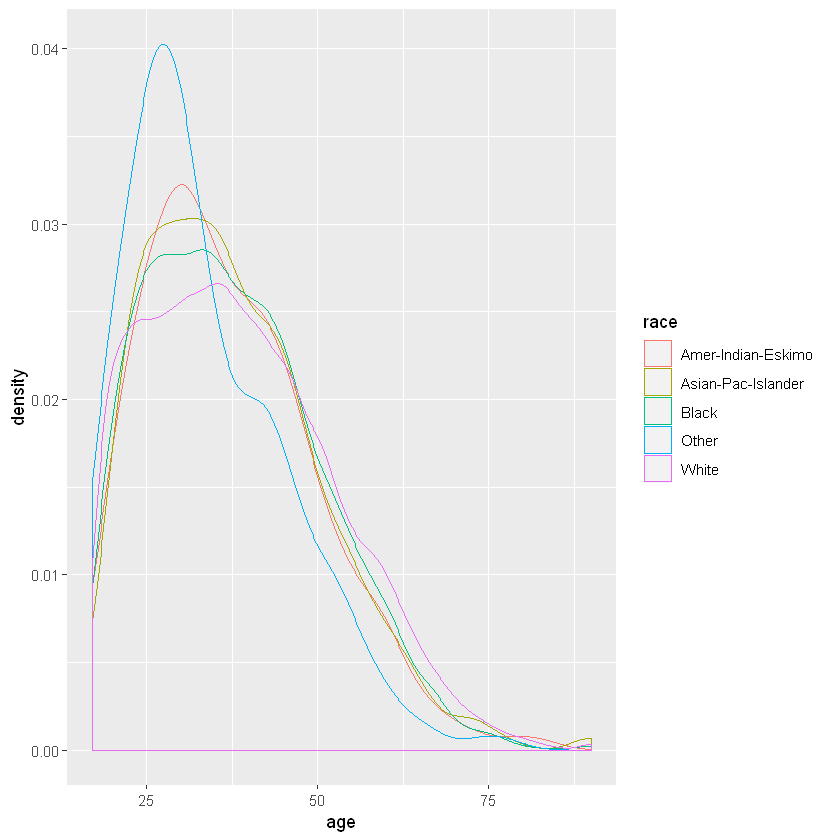

Warning message:
"Groups with fewer than two data points have been dropped."

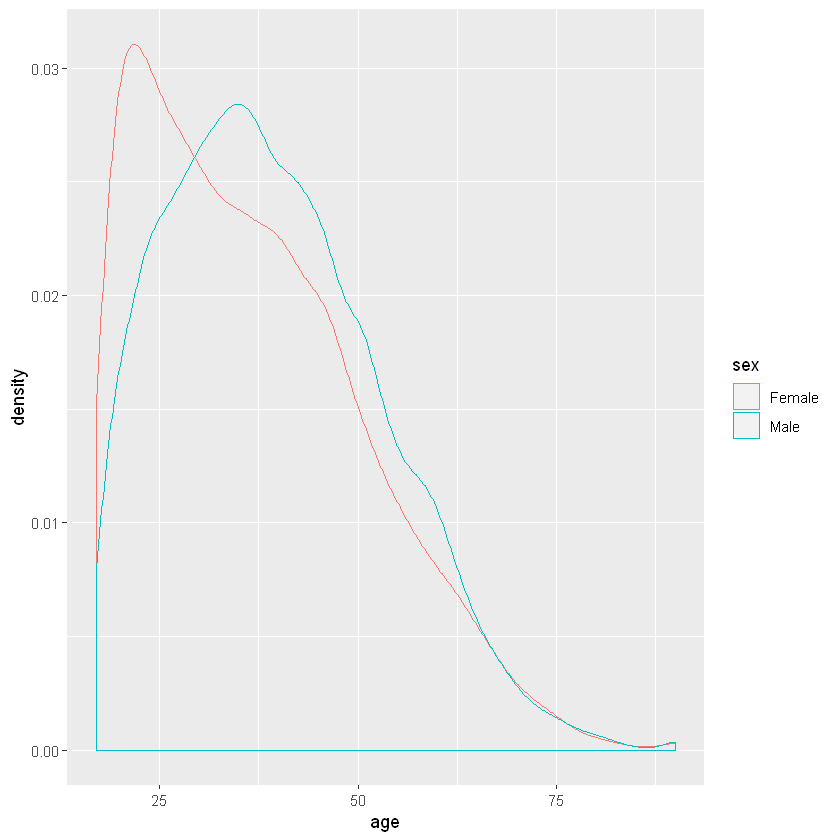

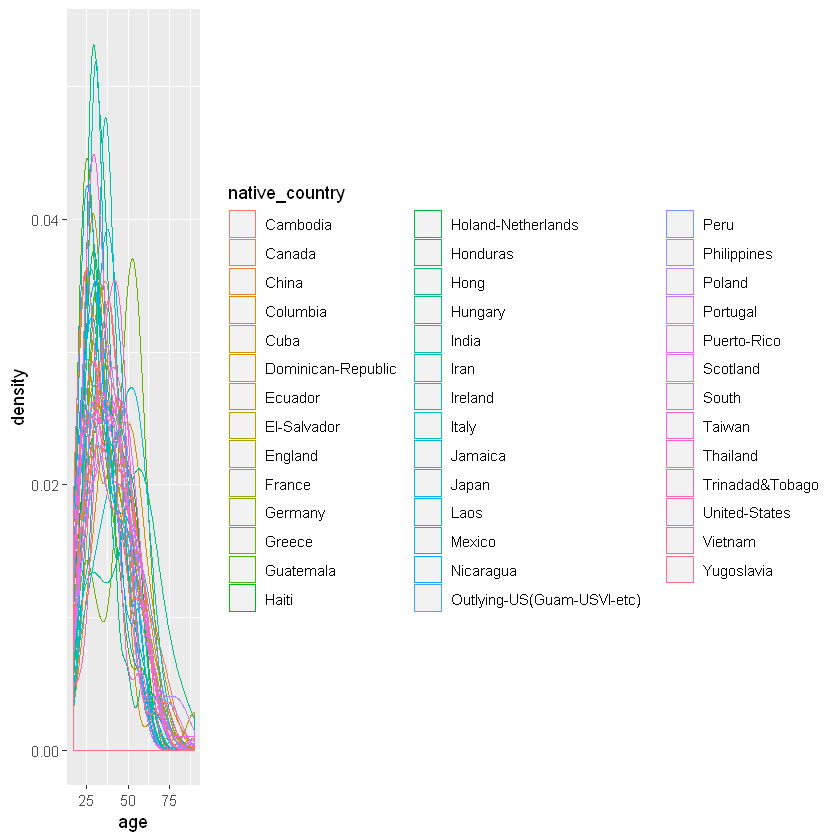

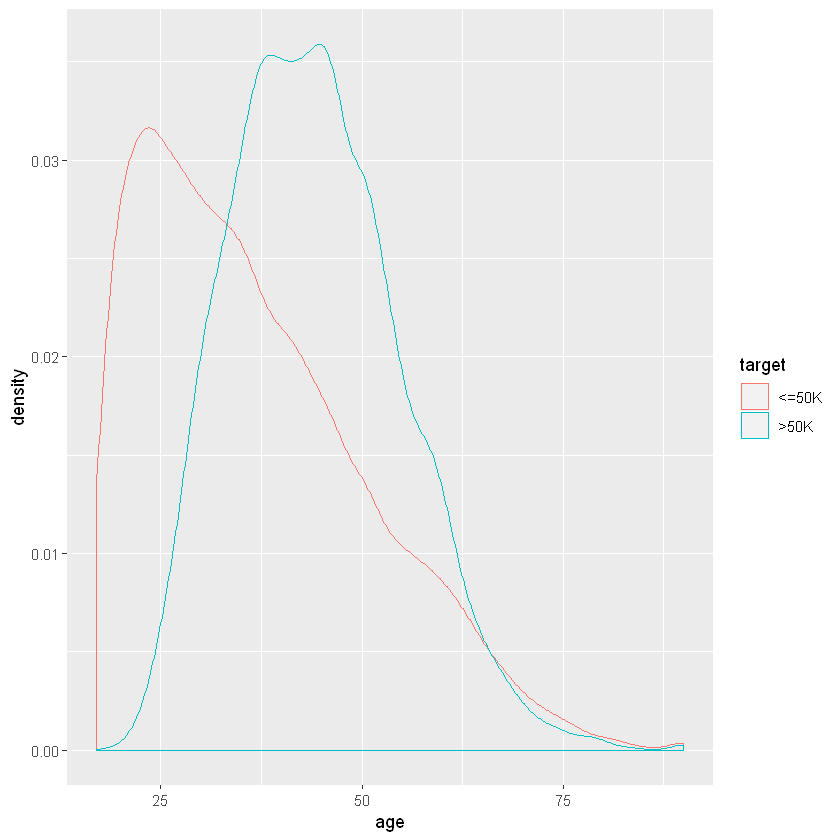

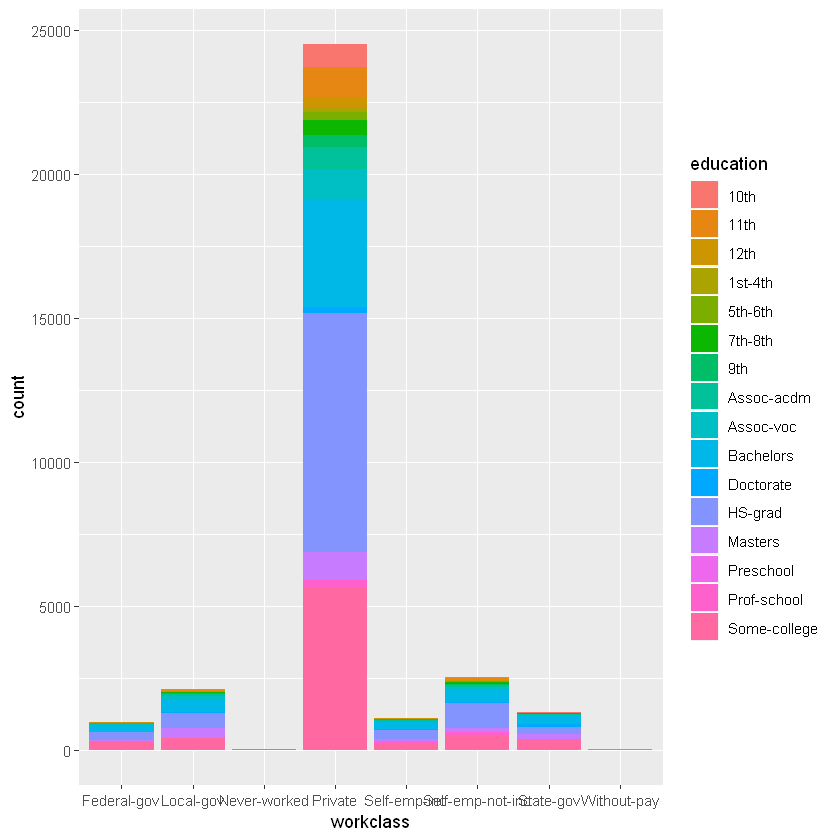

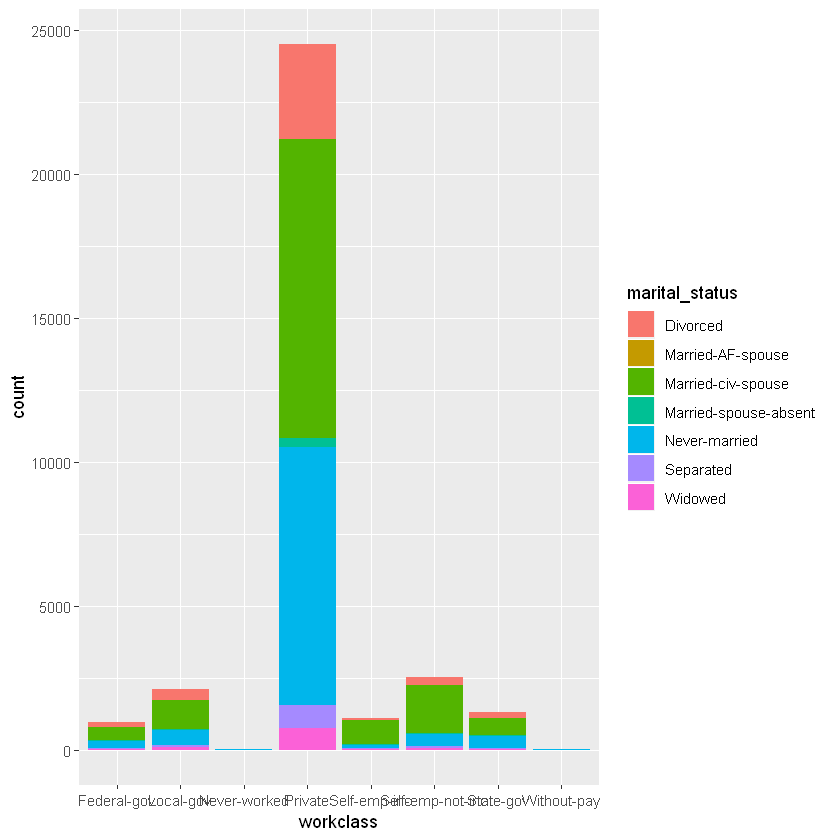

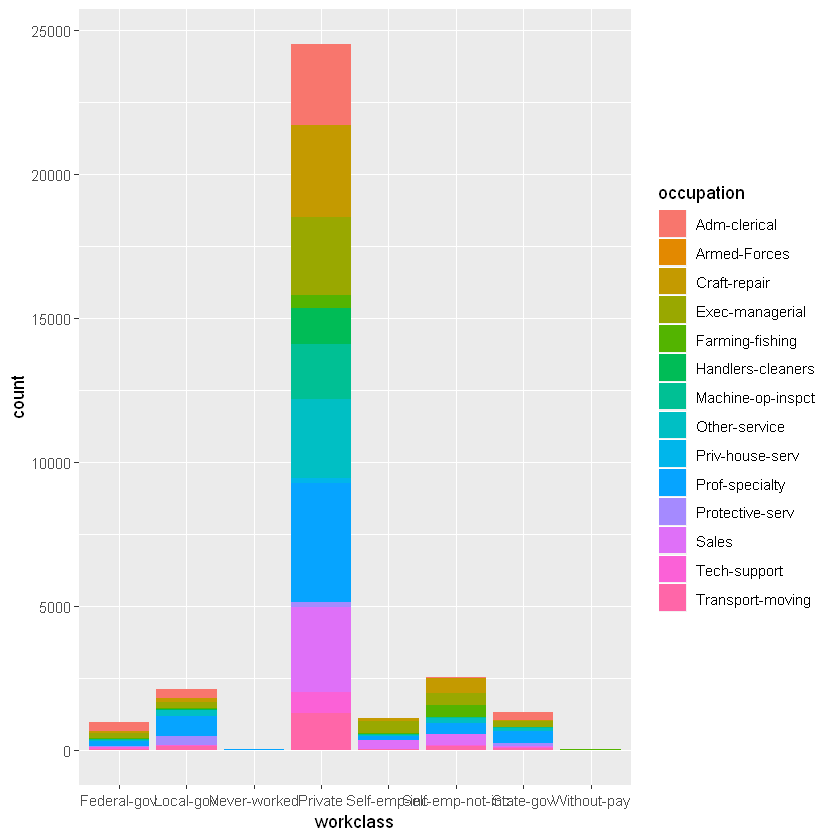

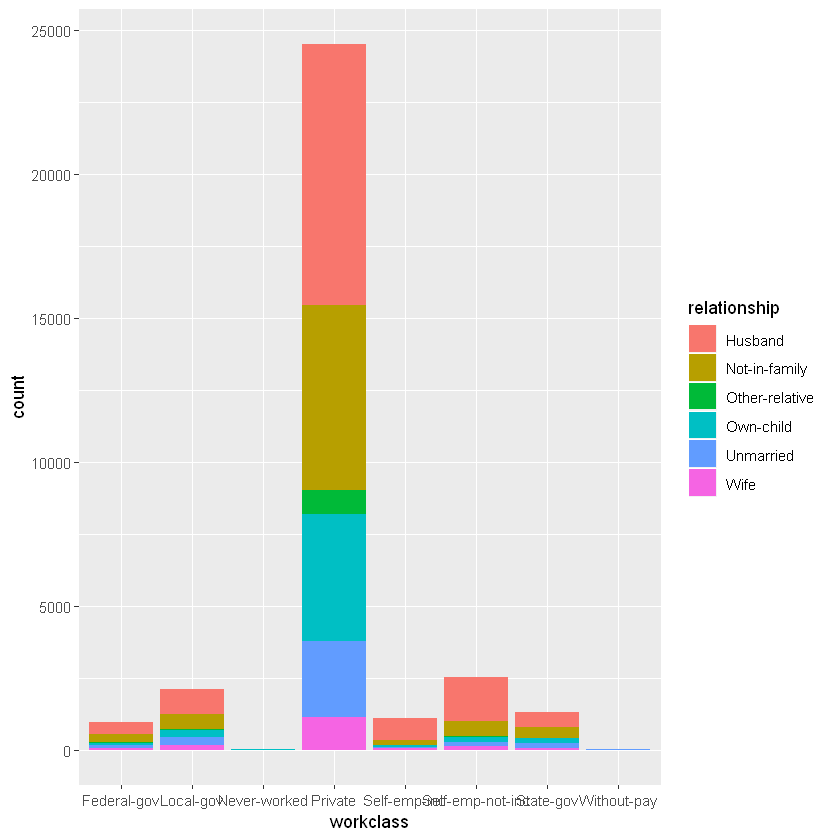

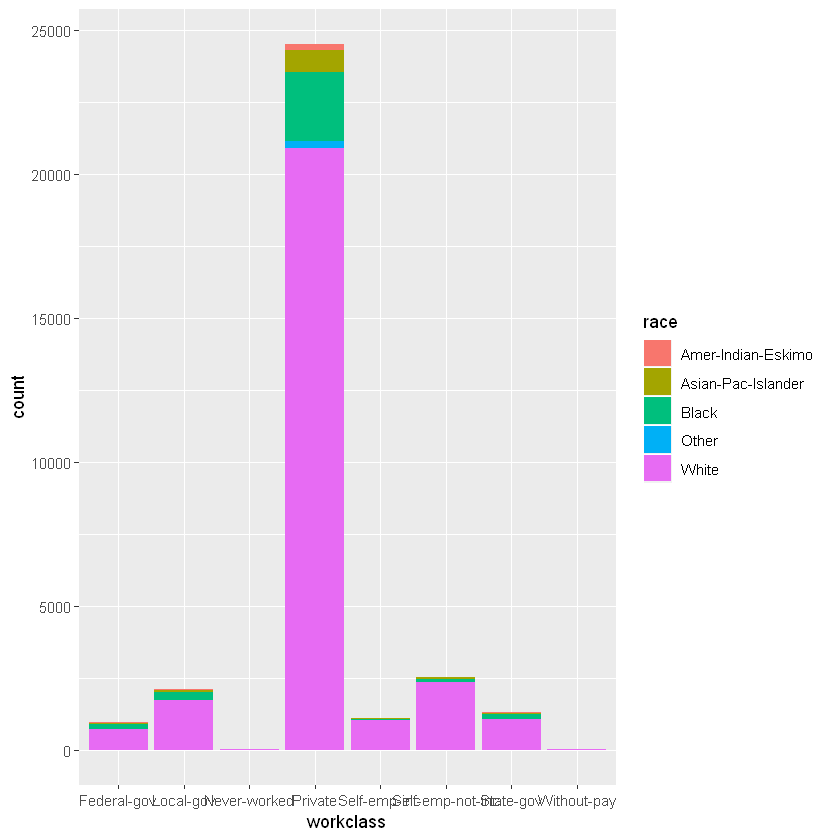

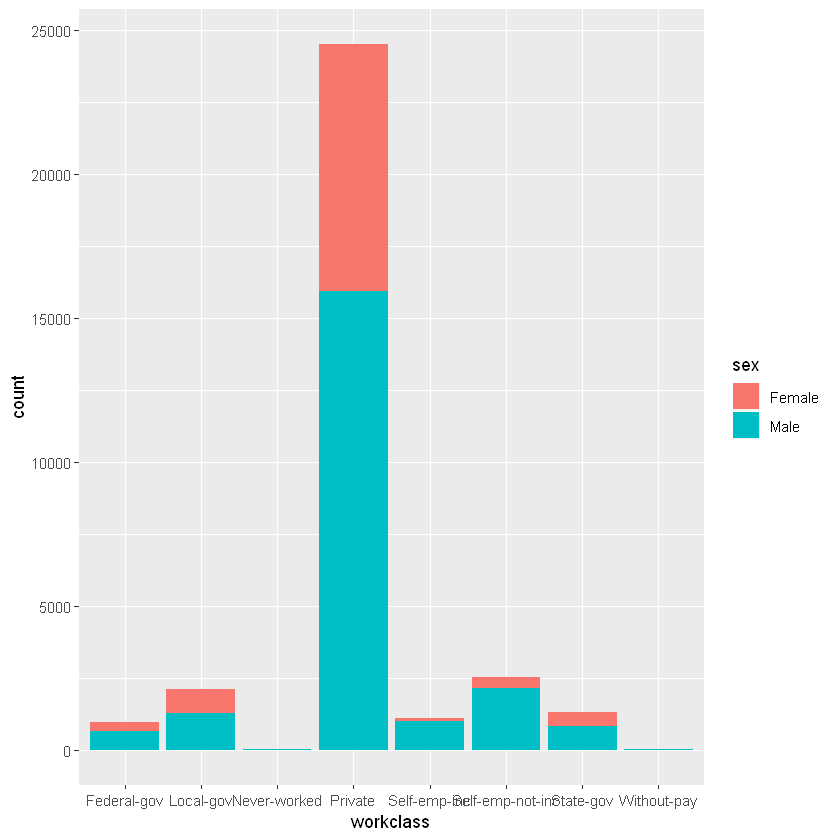

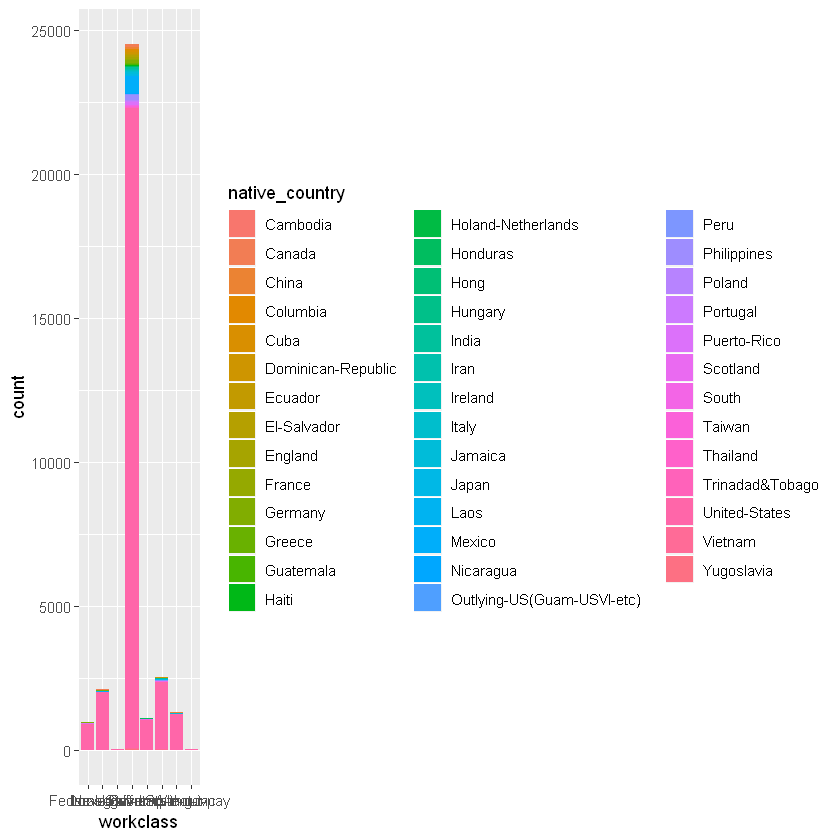

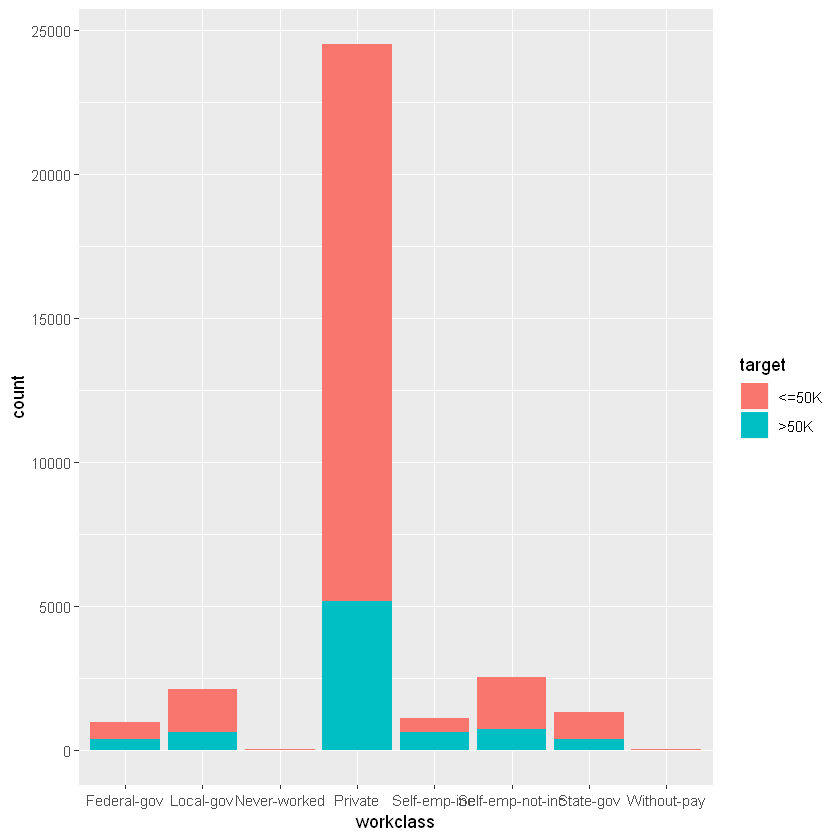

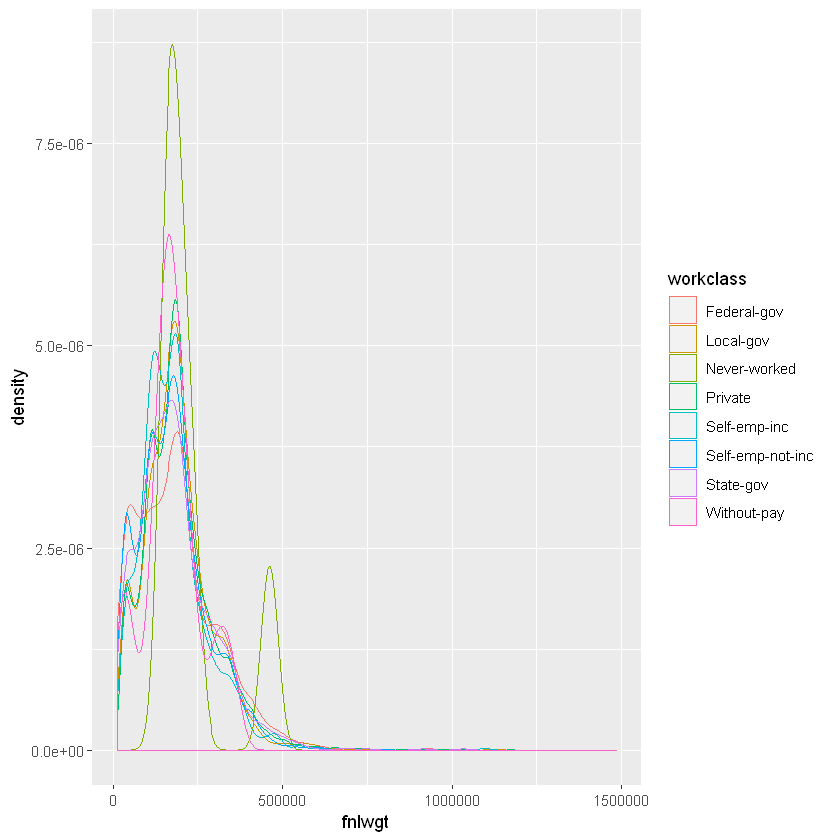

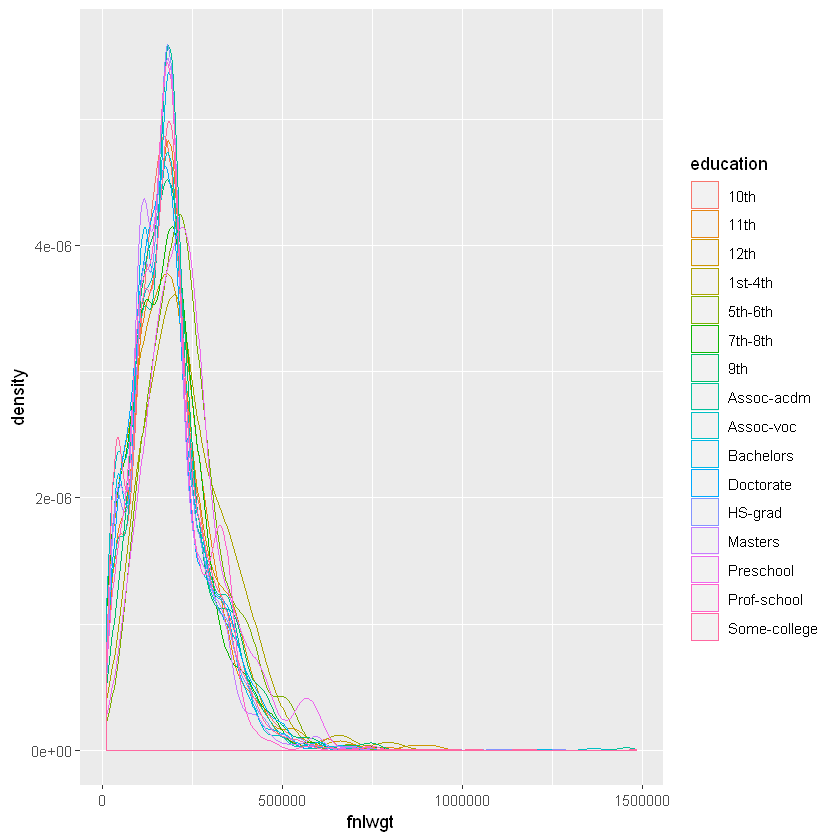

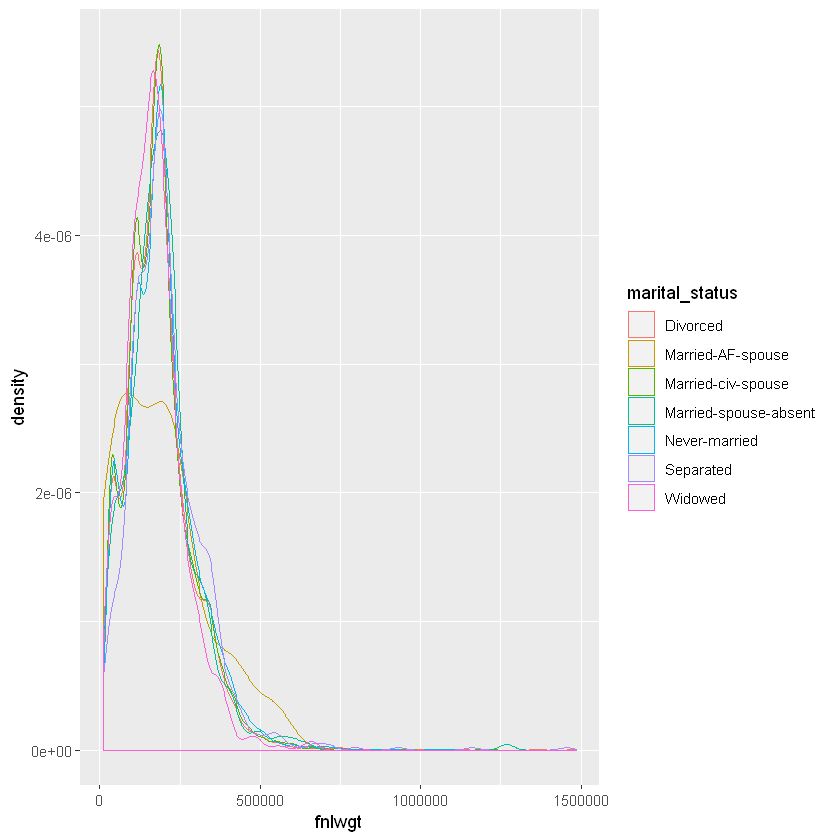

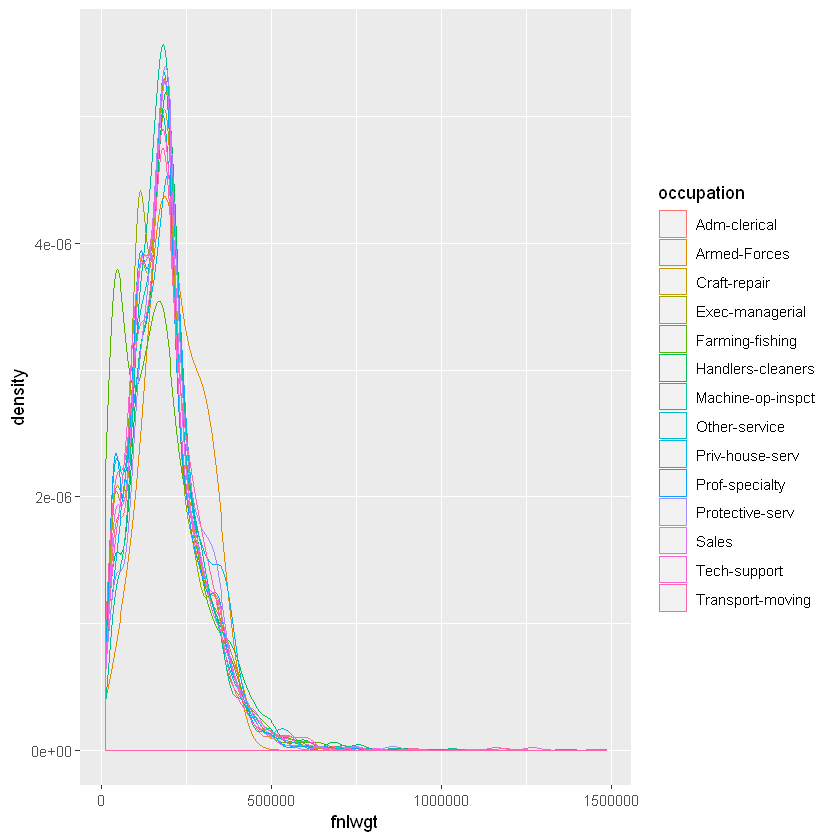

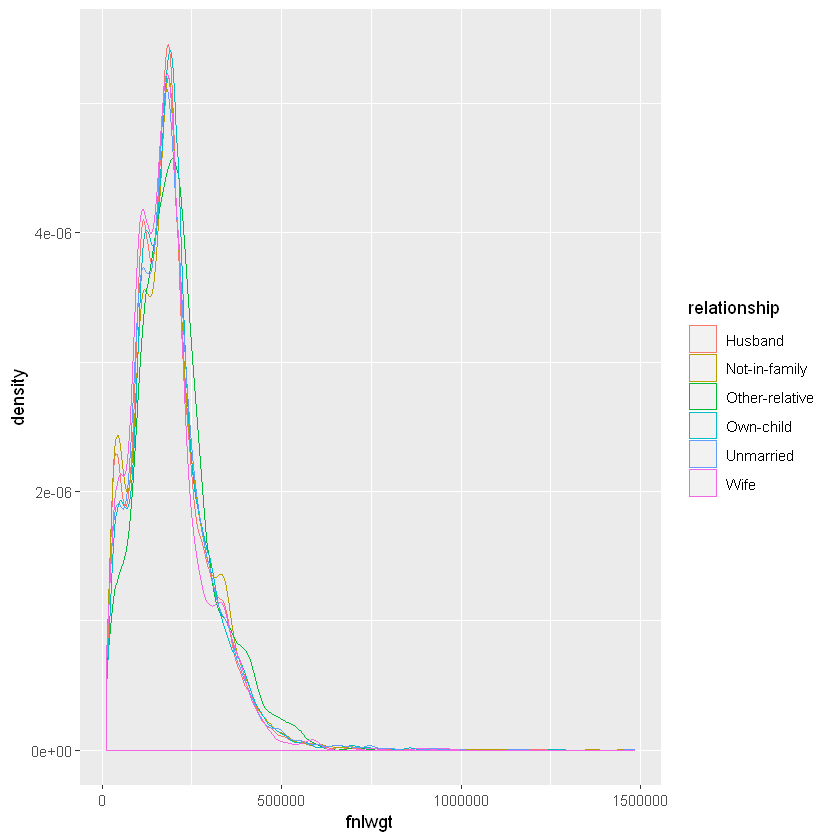

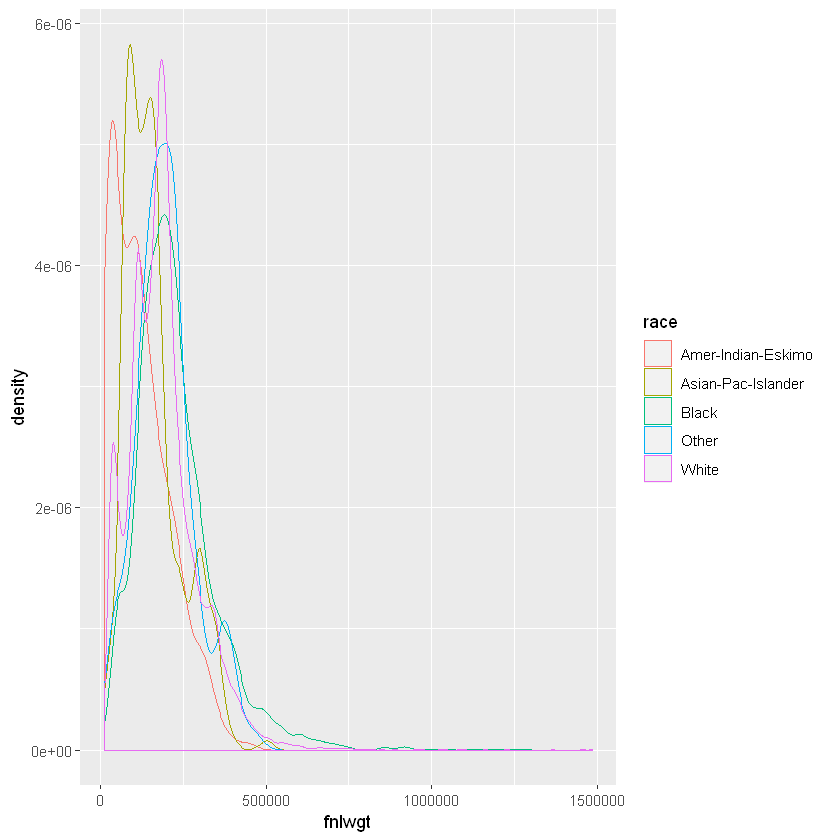

Warning message:
"Groups with fewer than two data points have been dropped."

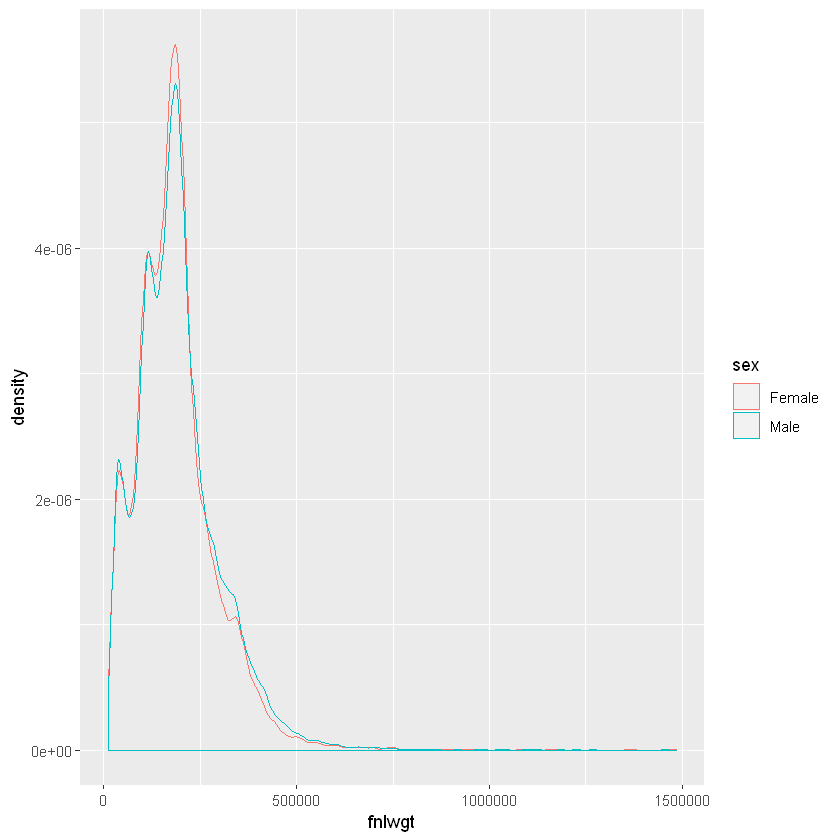

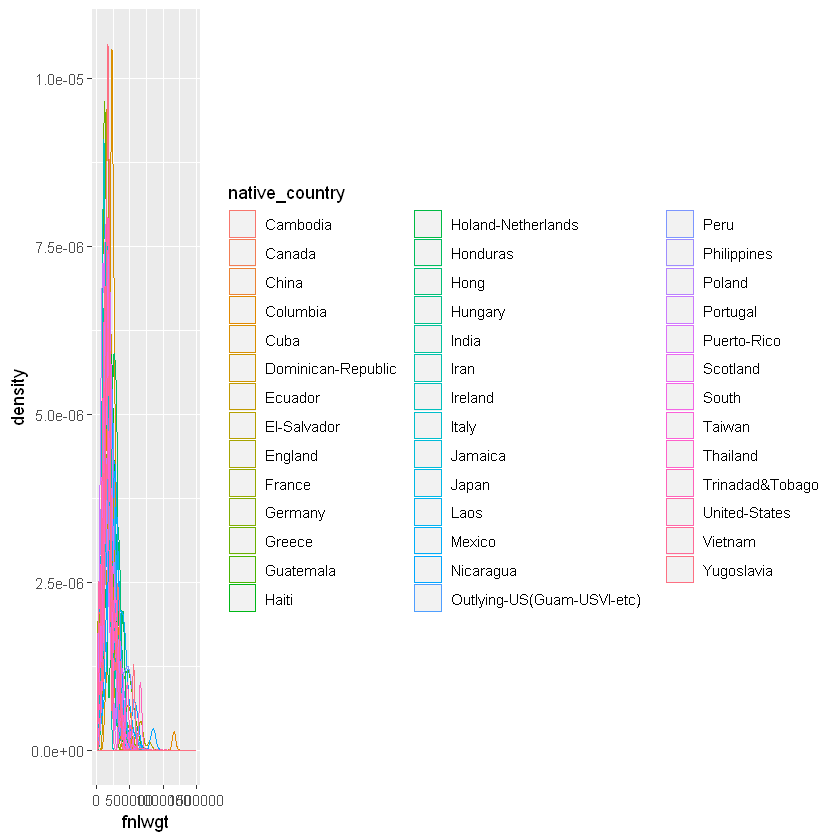

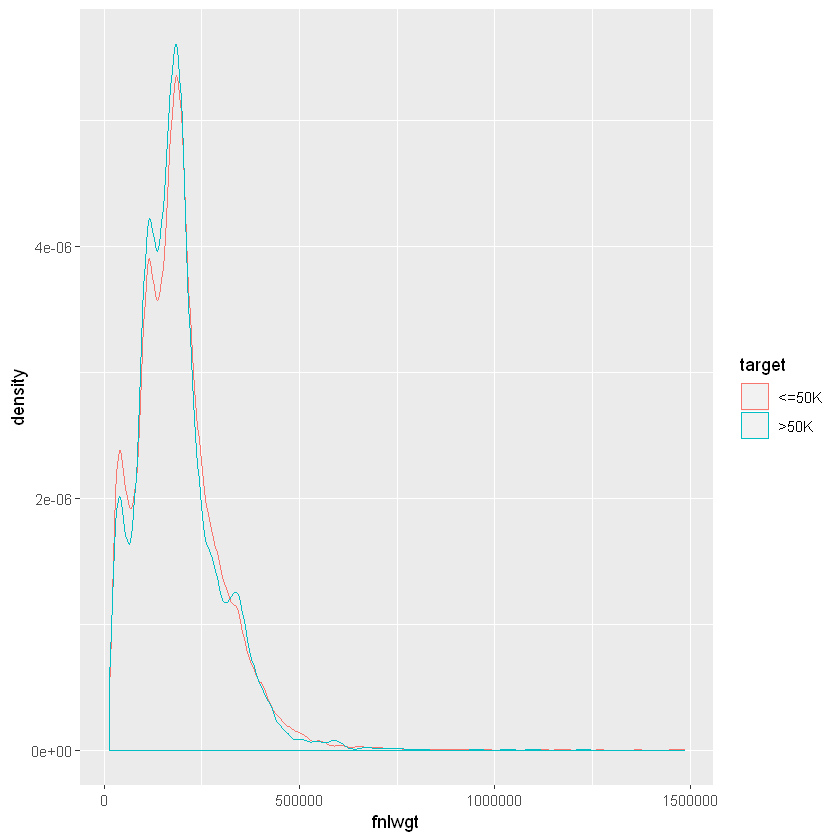

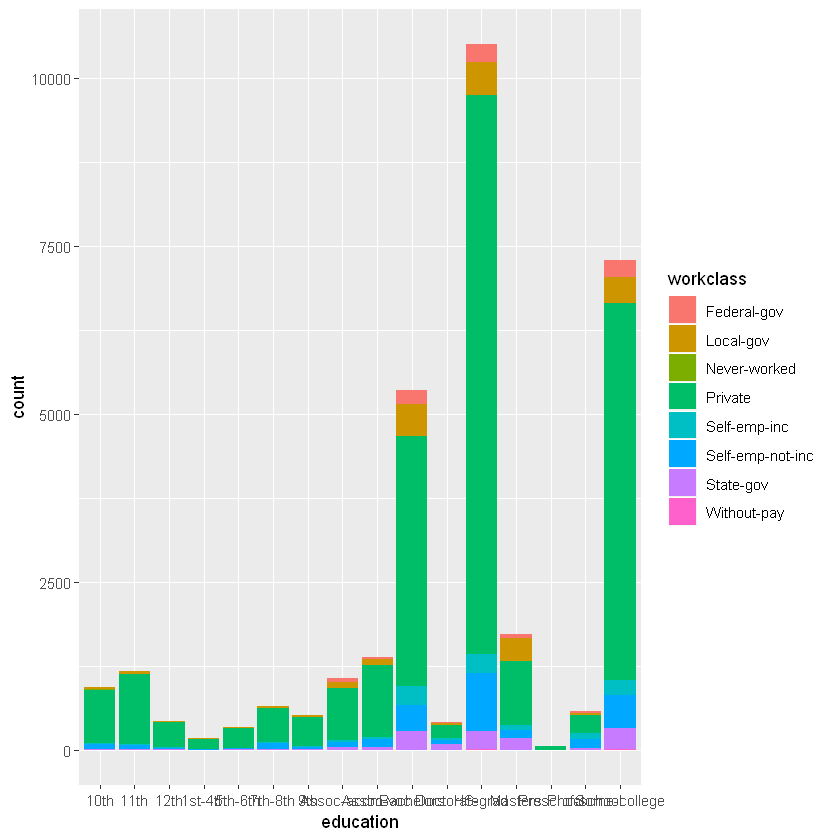

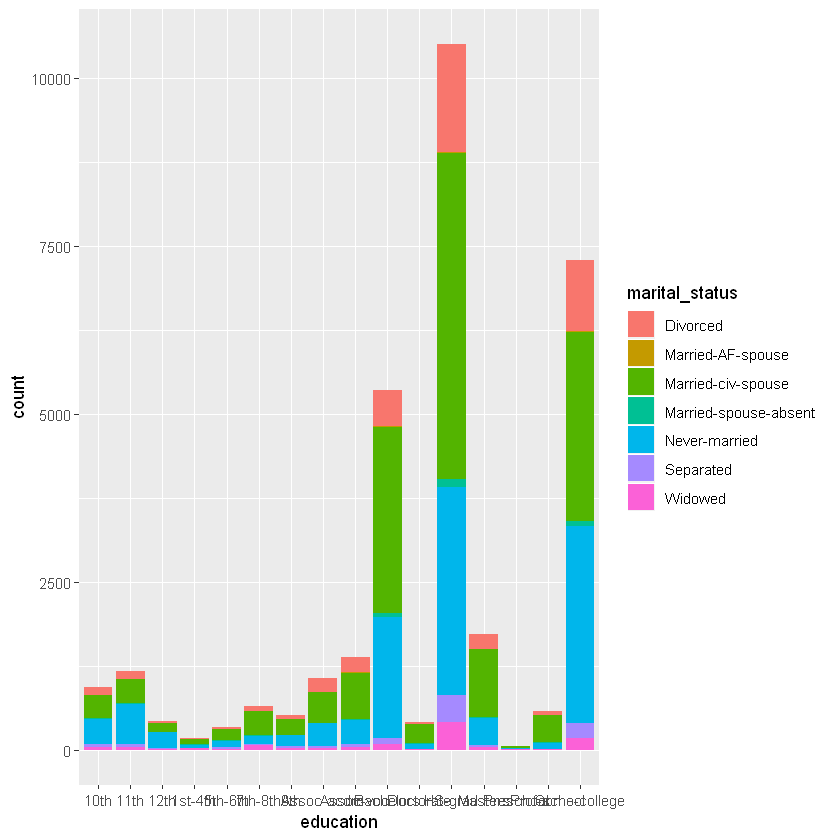

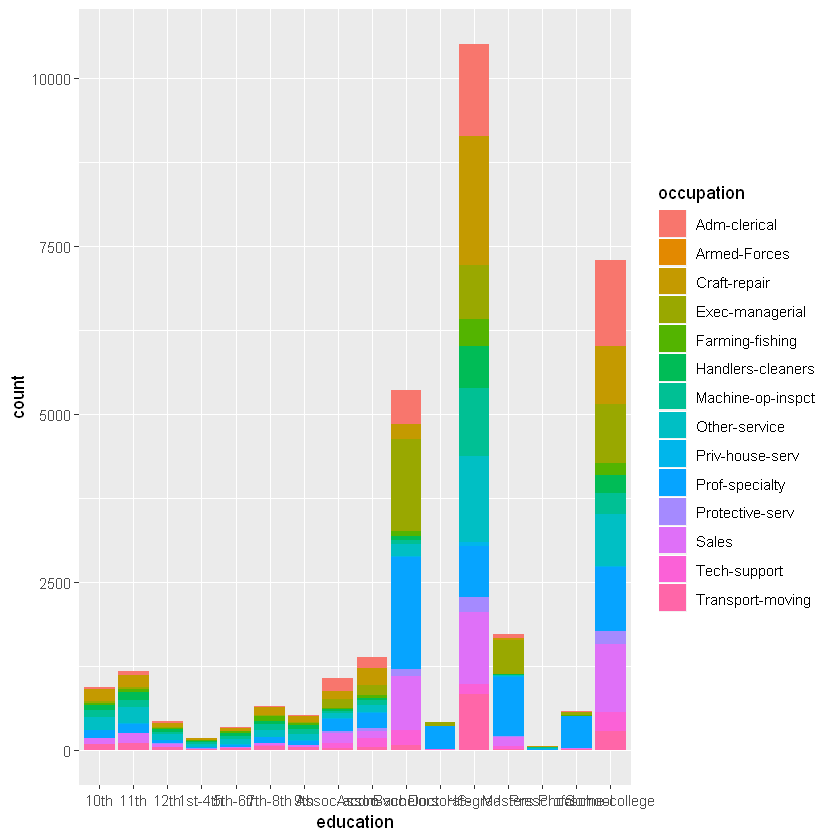

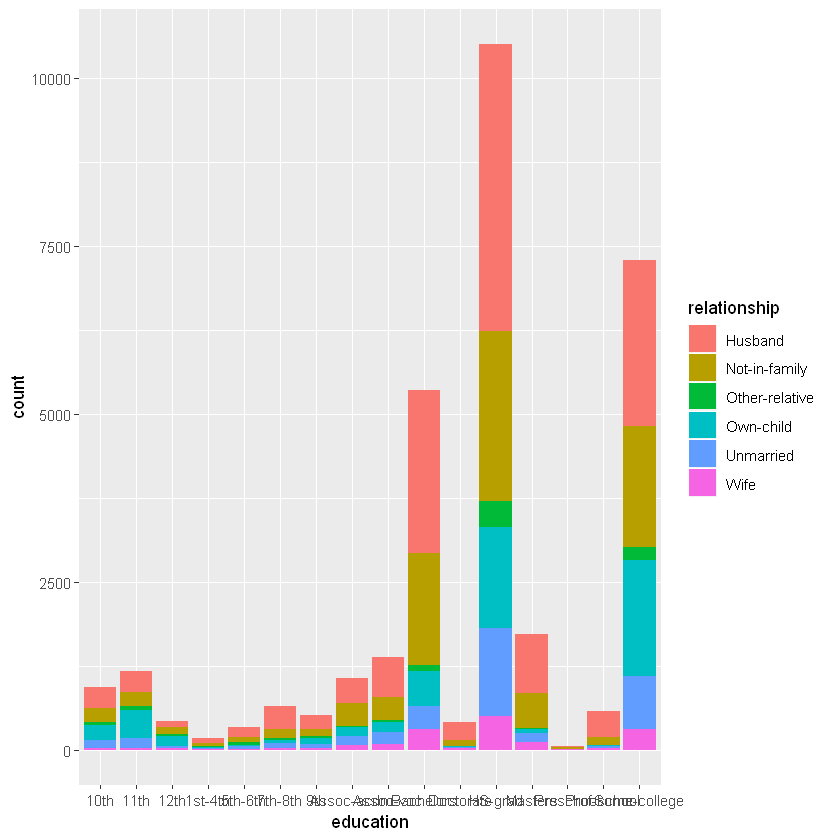

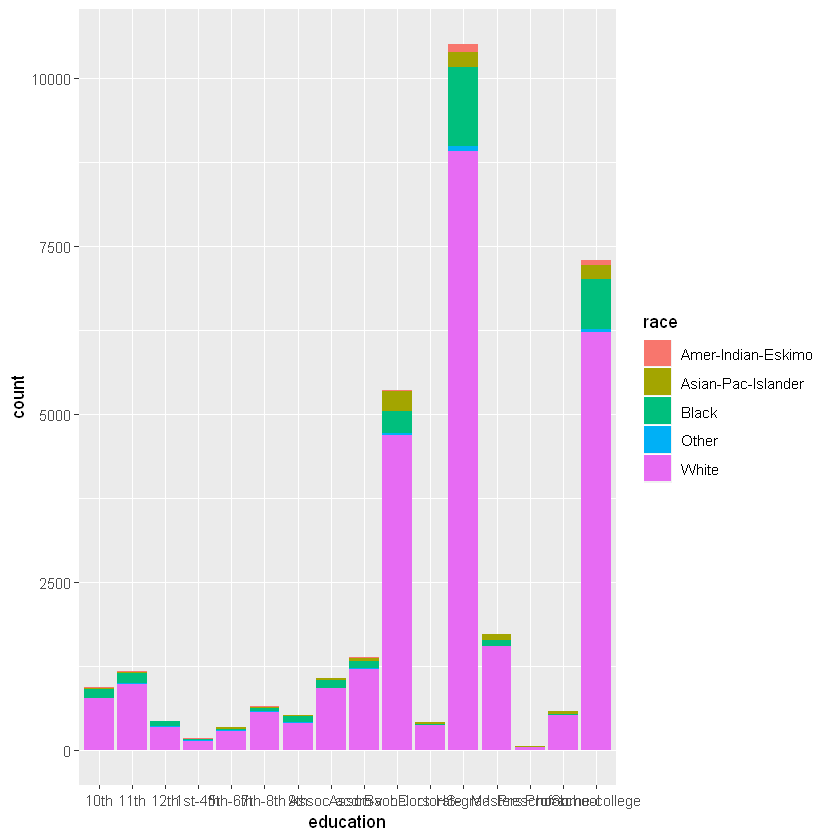

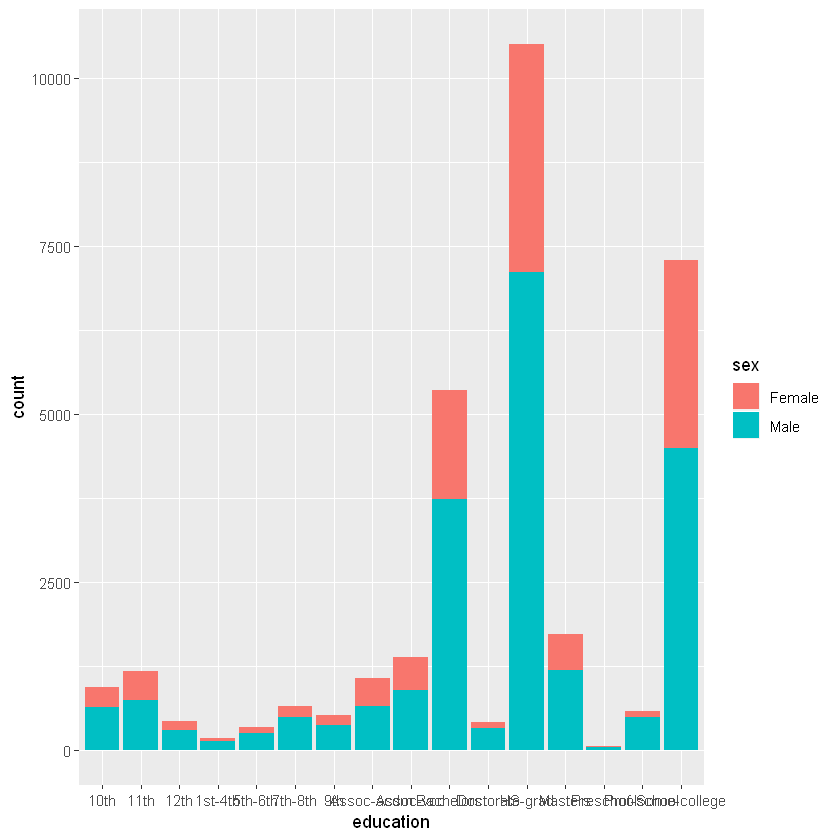

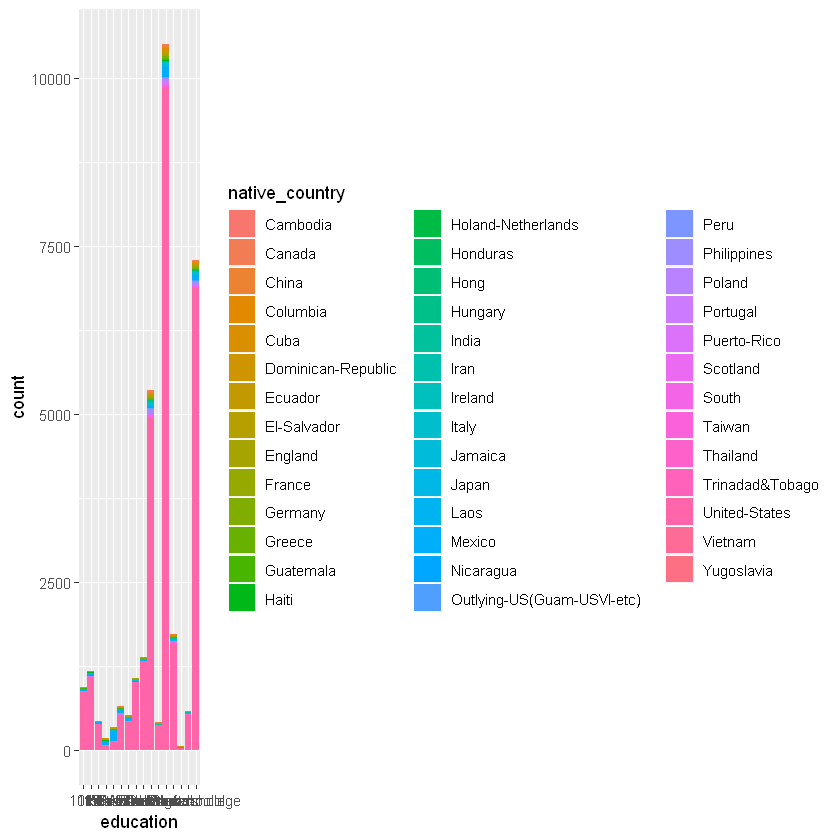

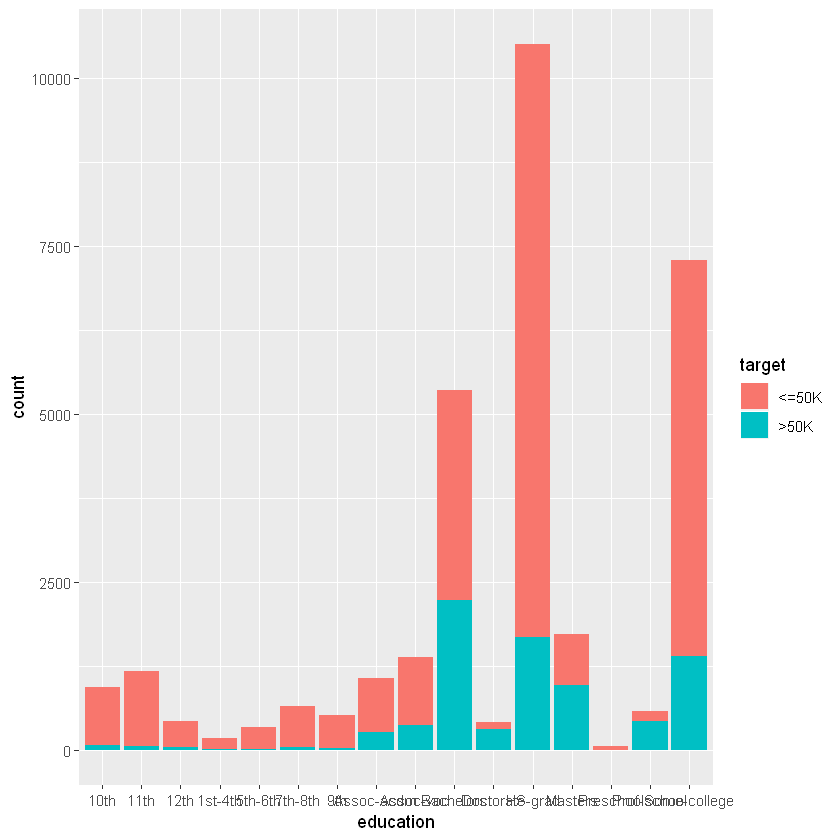

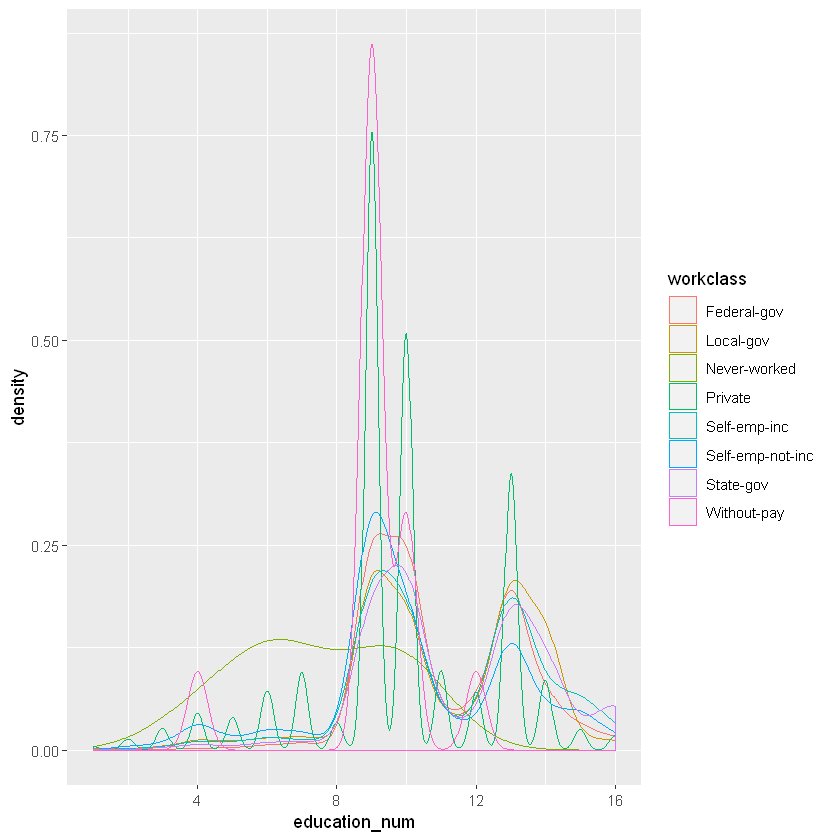

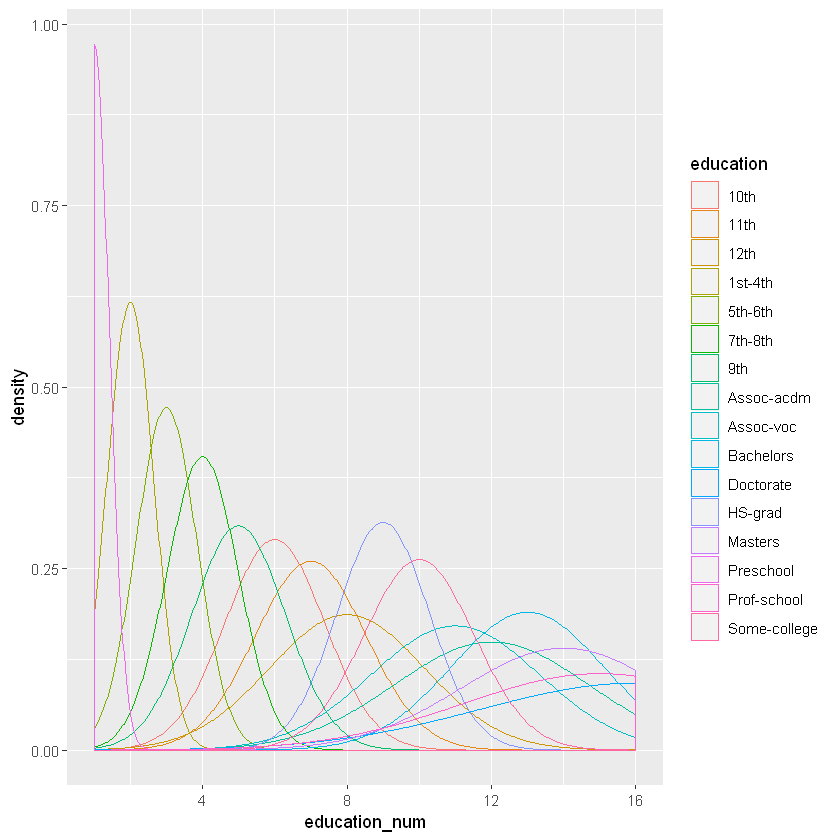

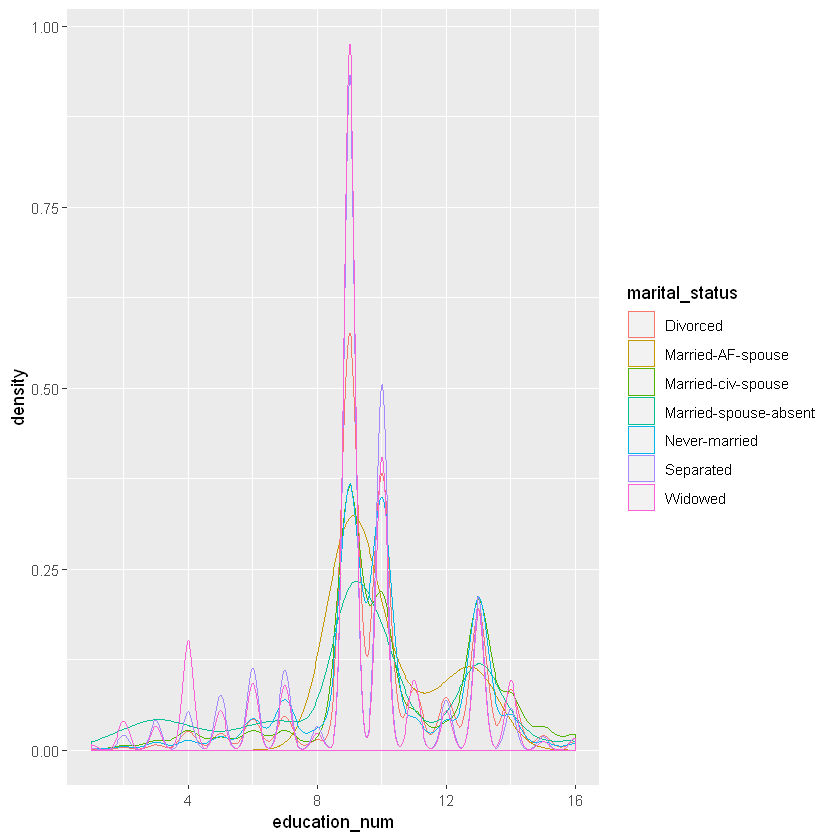

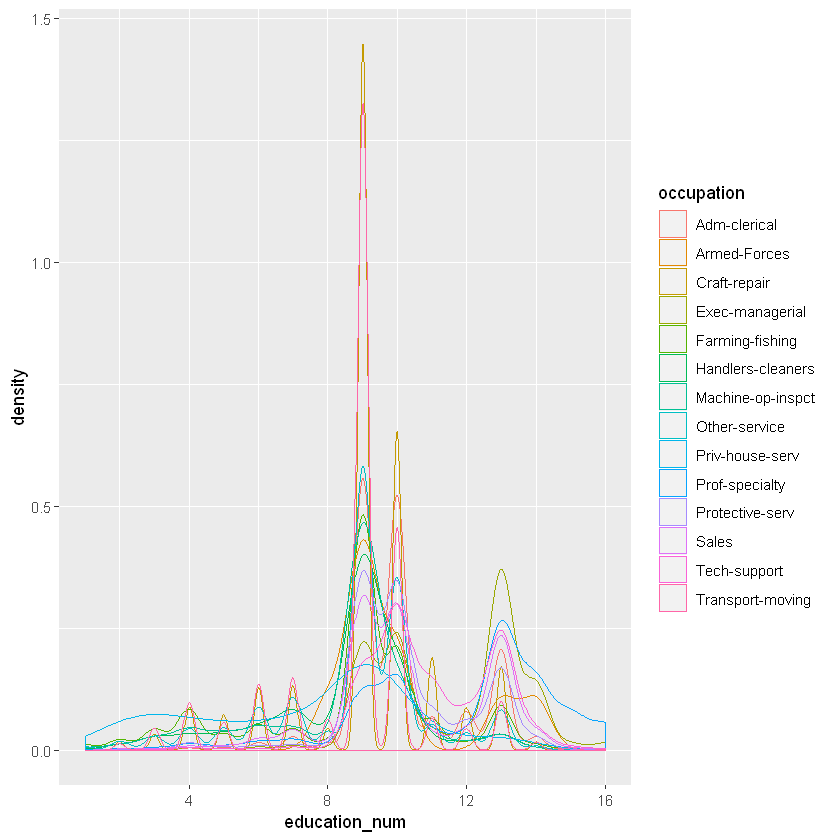

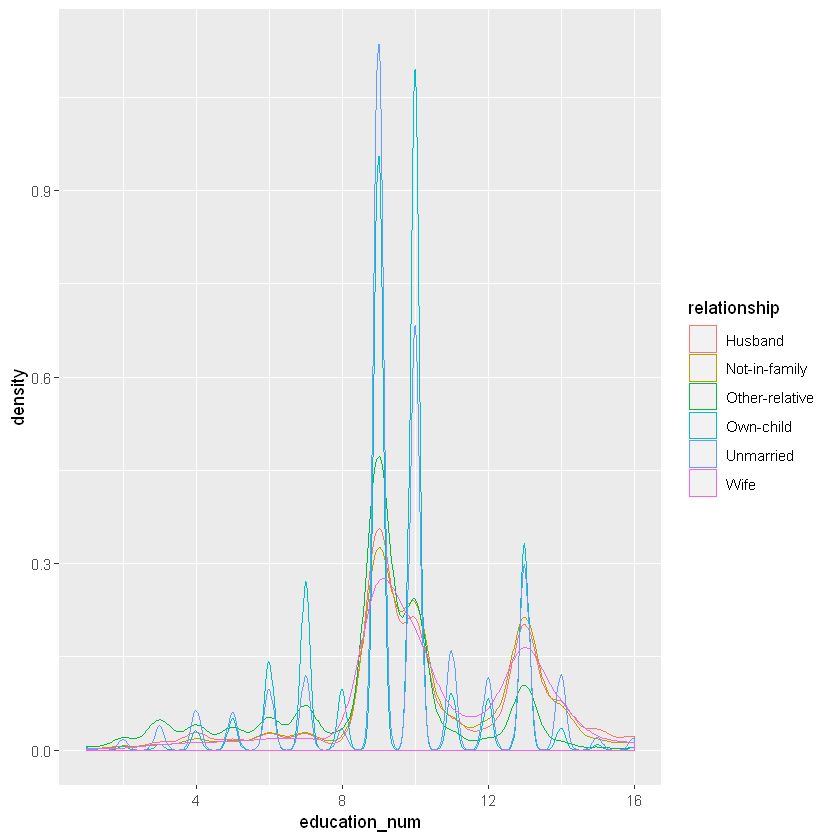

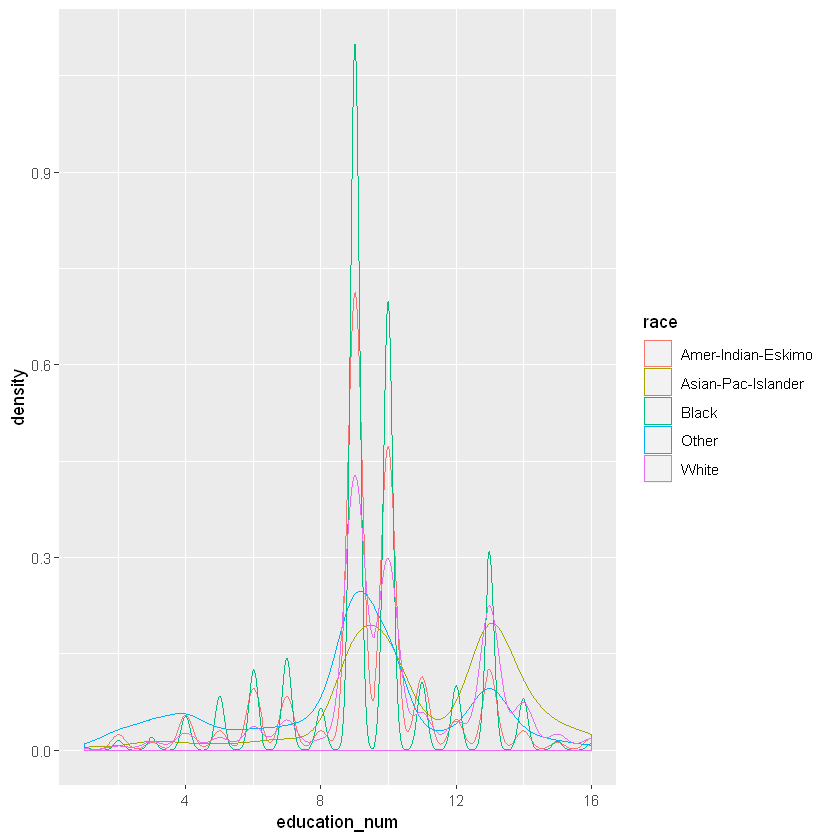

Warning message:
"Groups with fewer than two data points have been dropped."

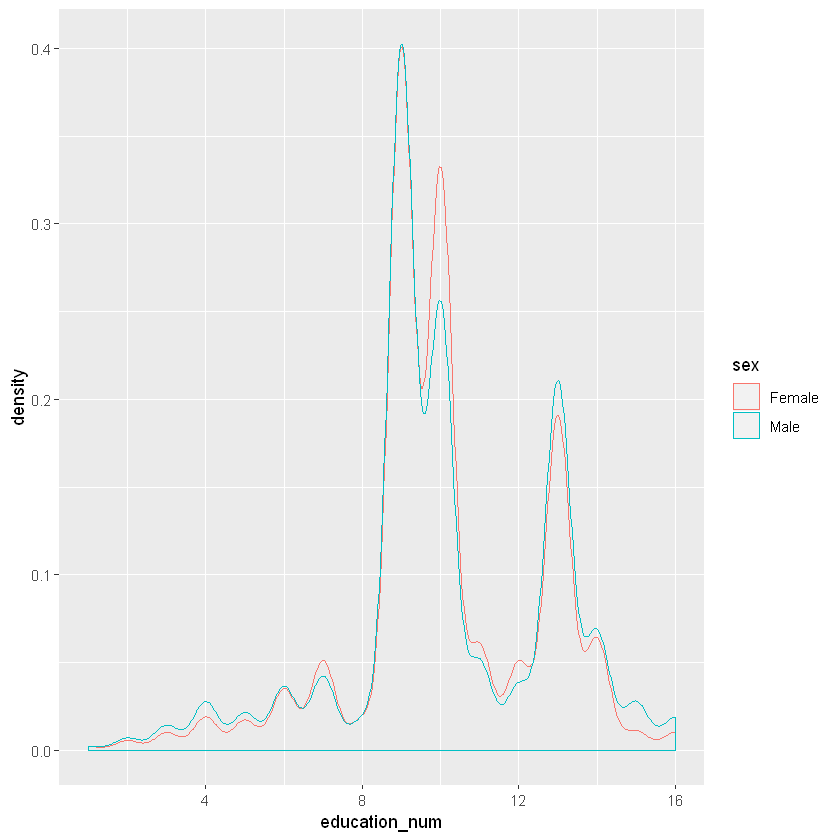

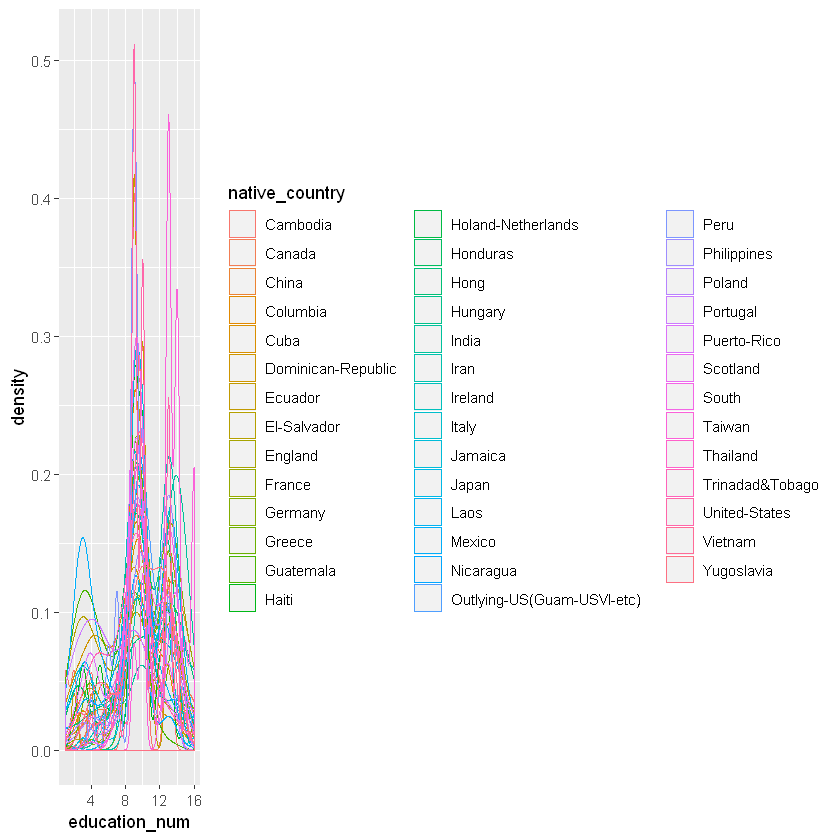

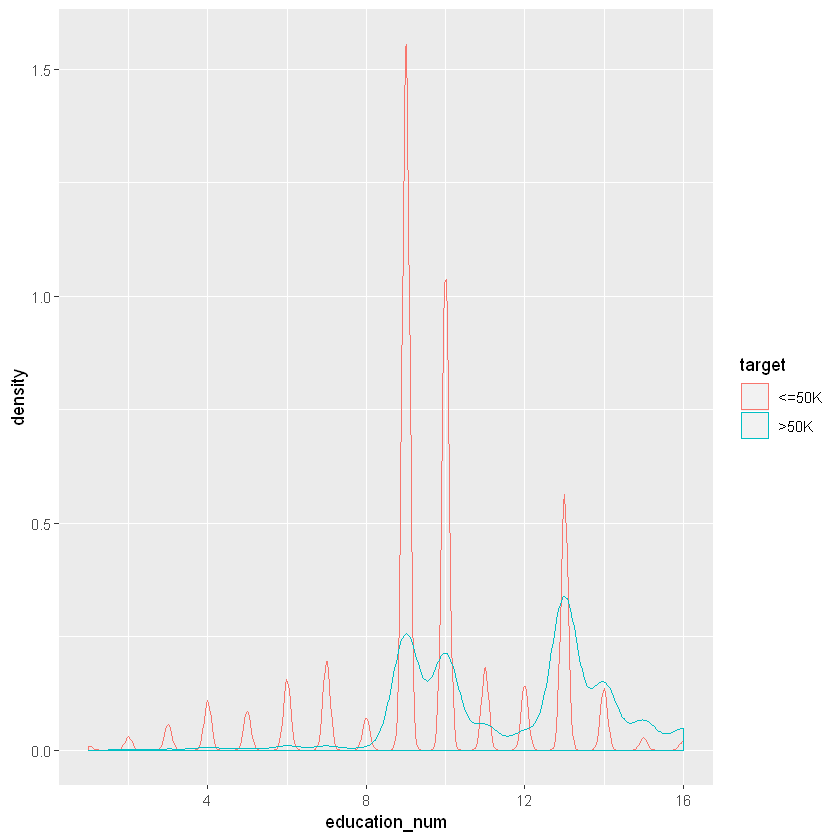

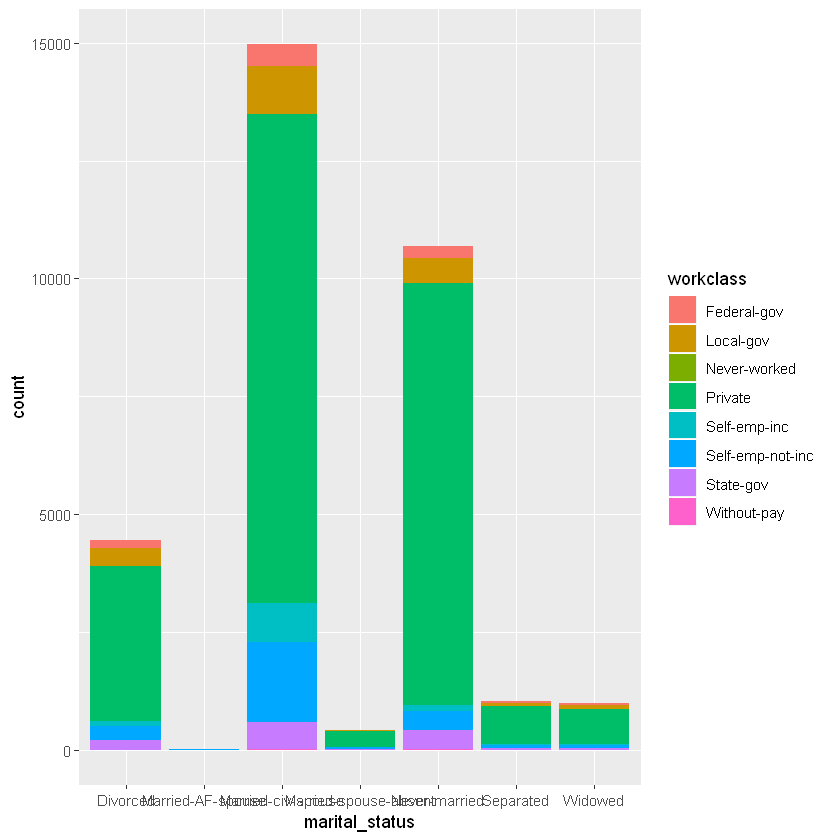

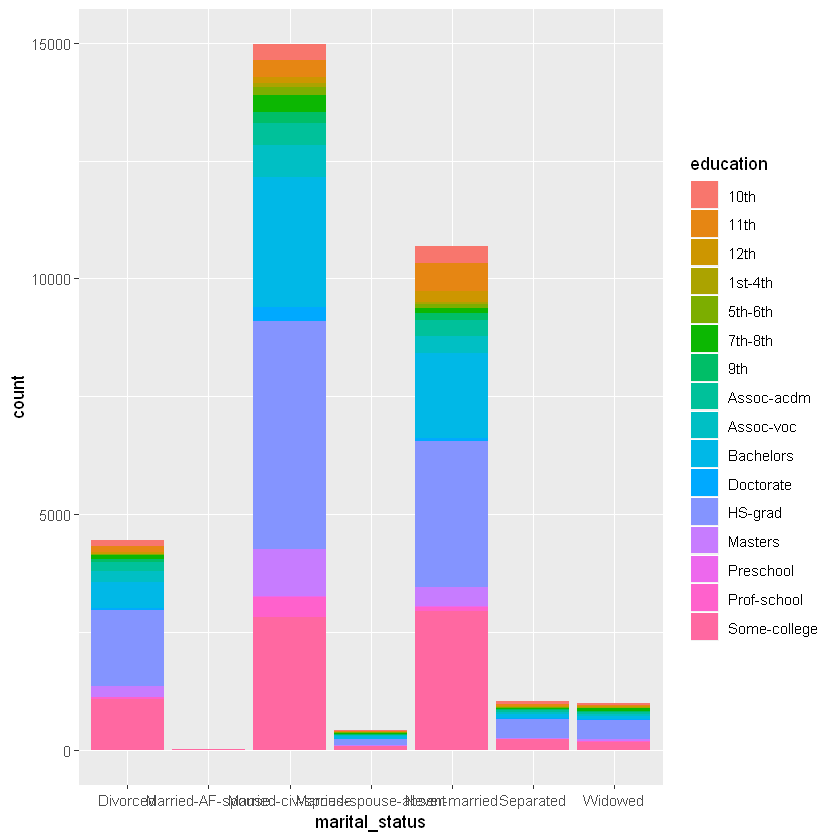

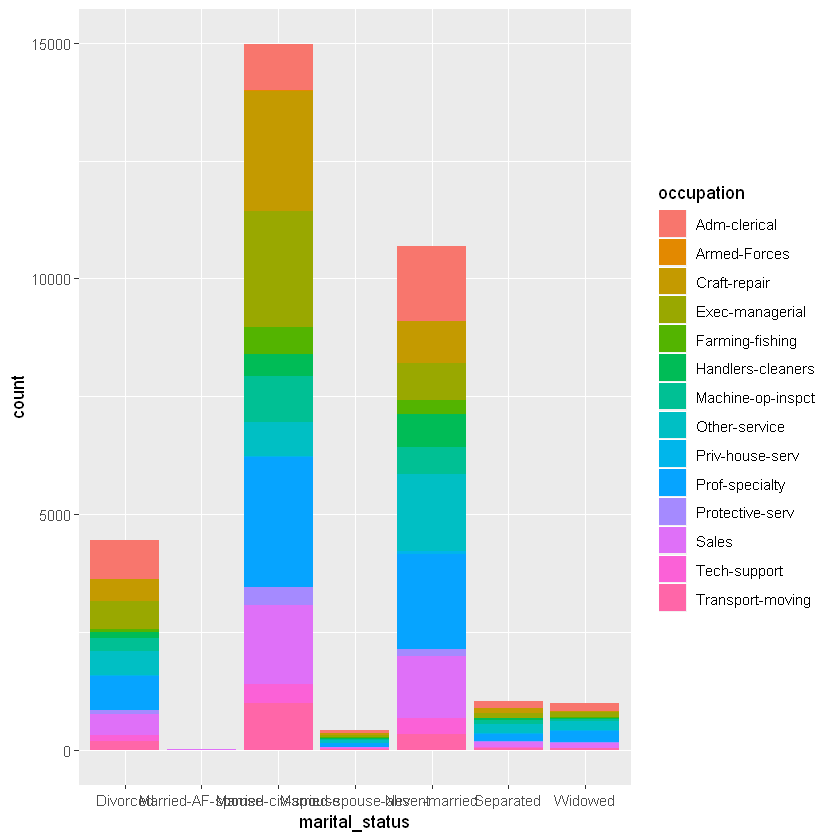

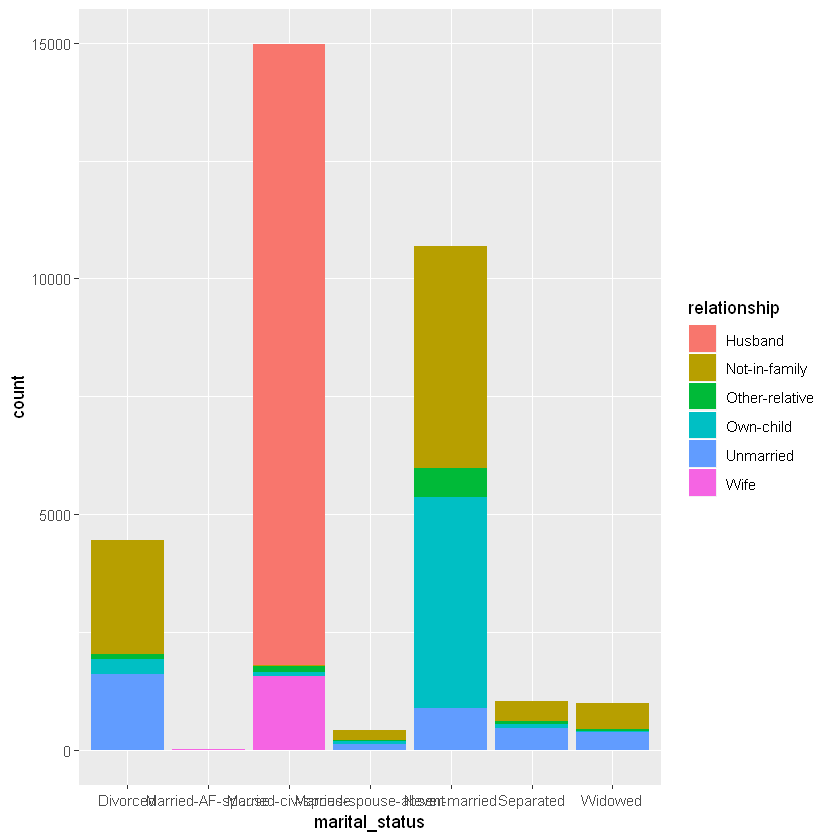

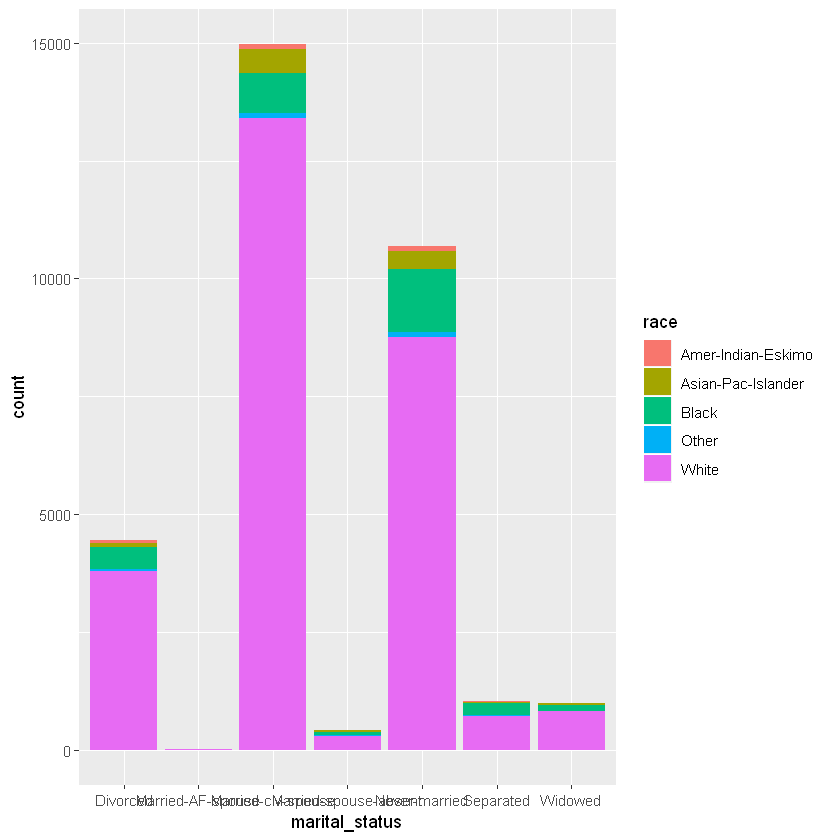

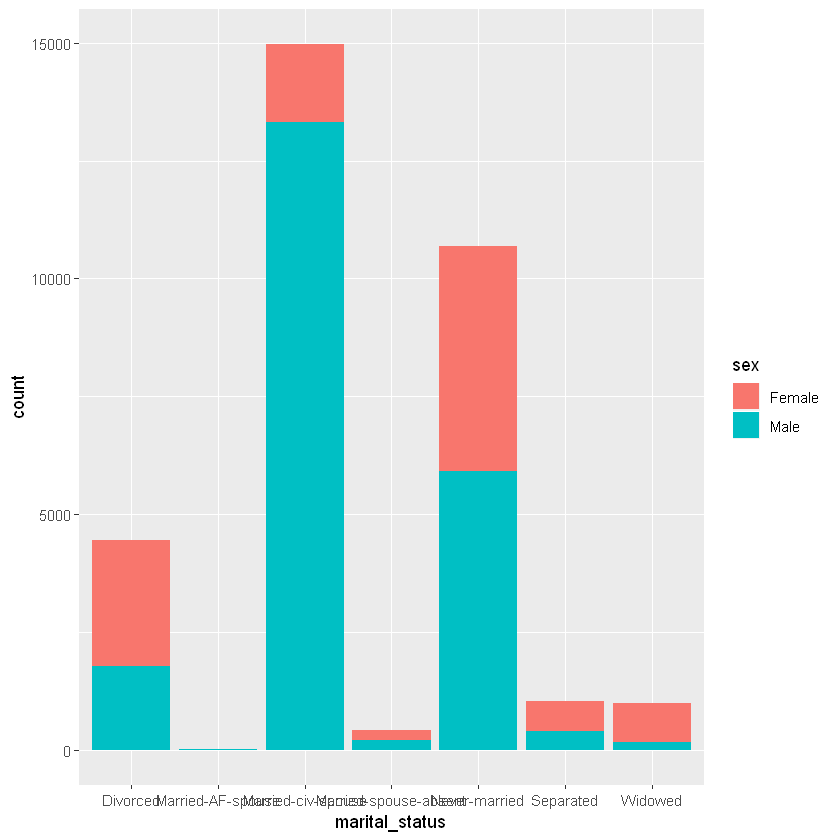

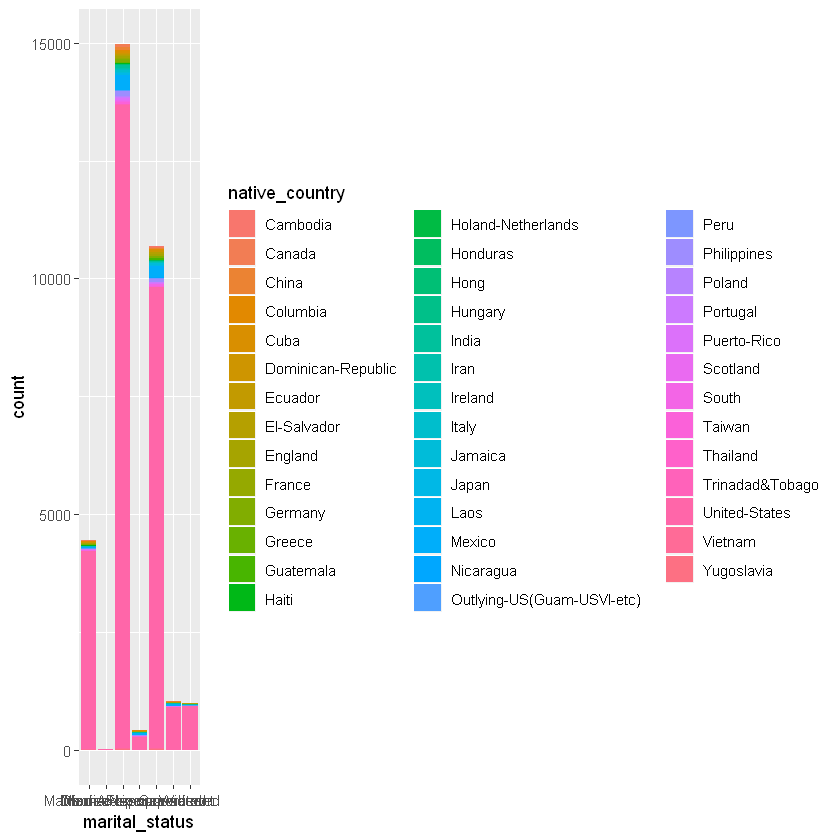

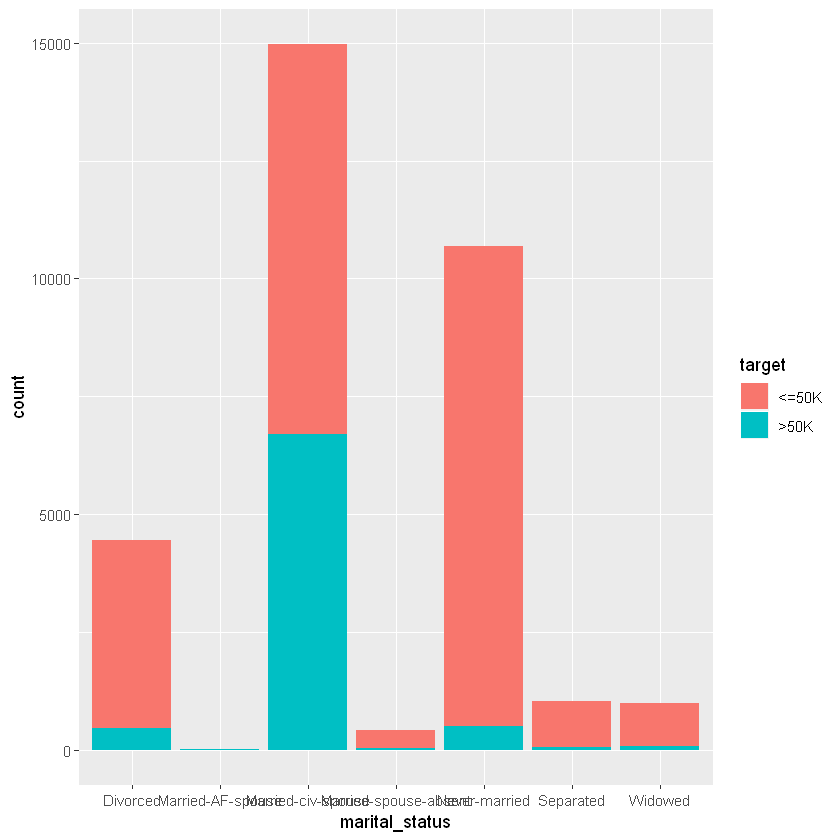

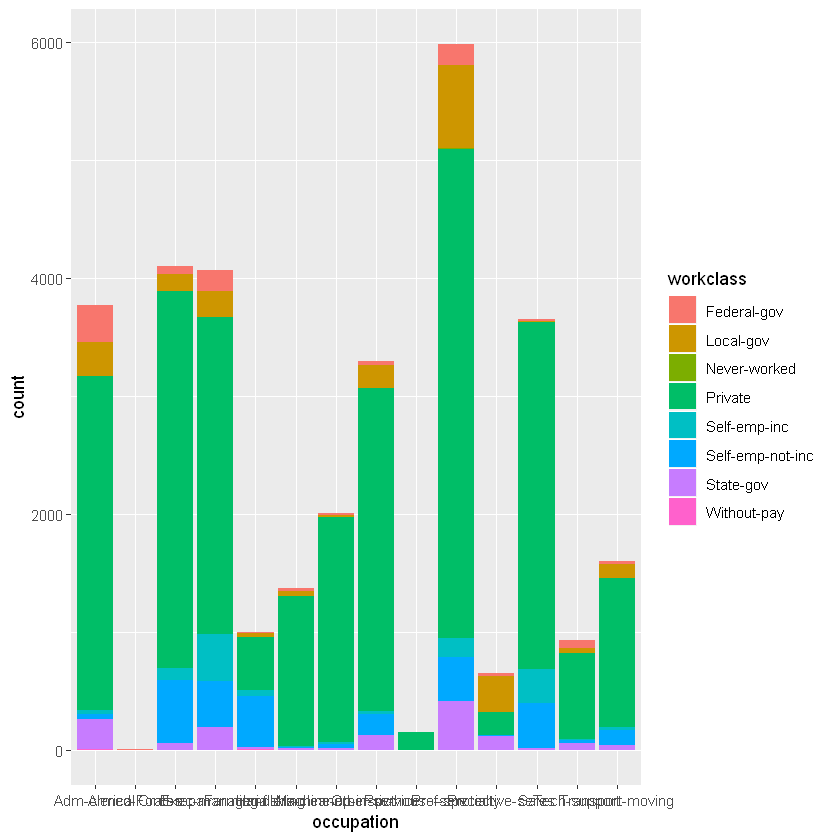

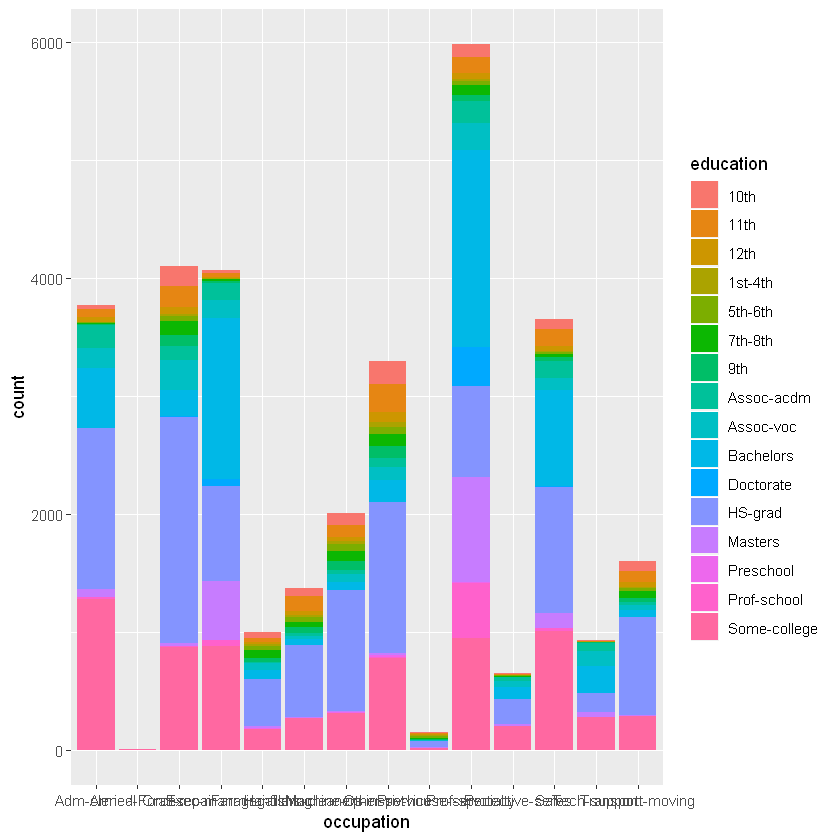

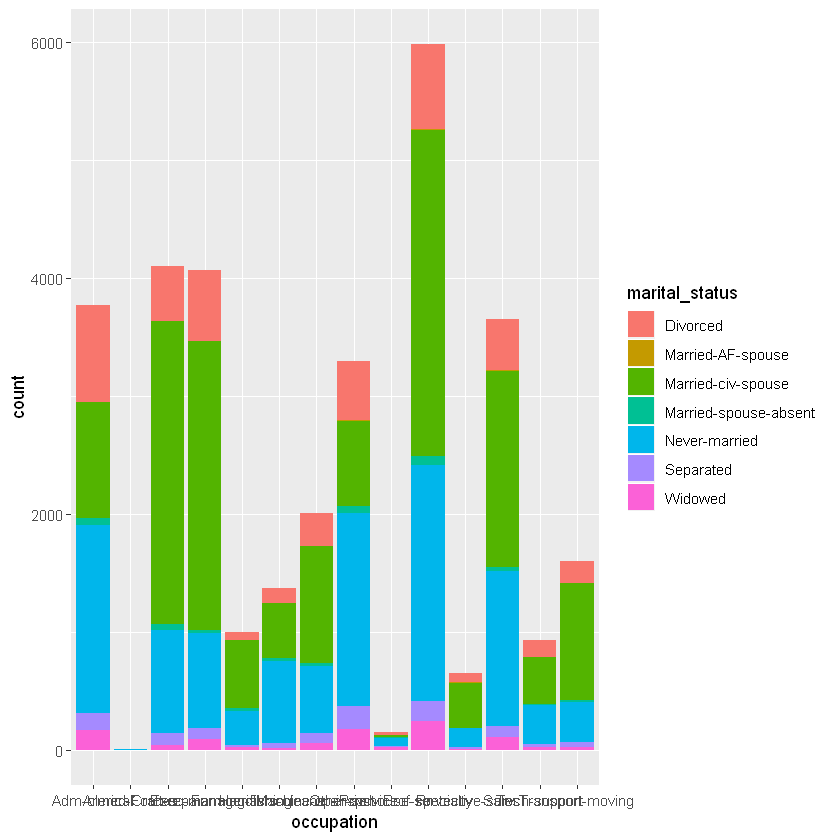

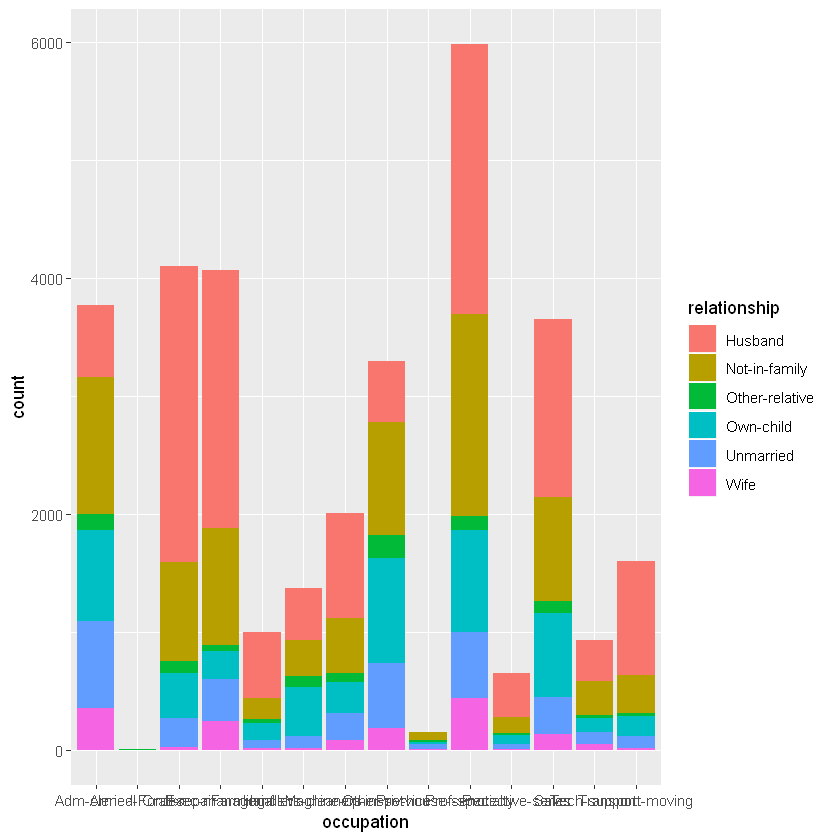

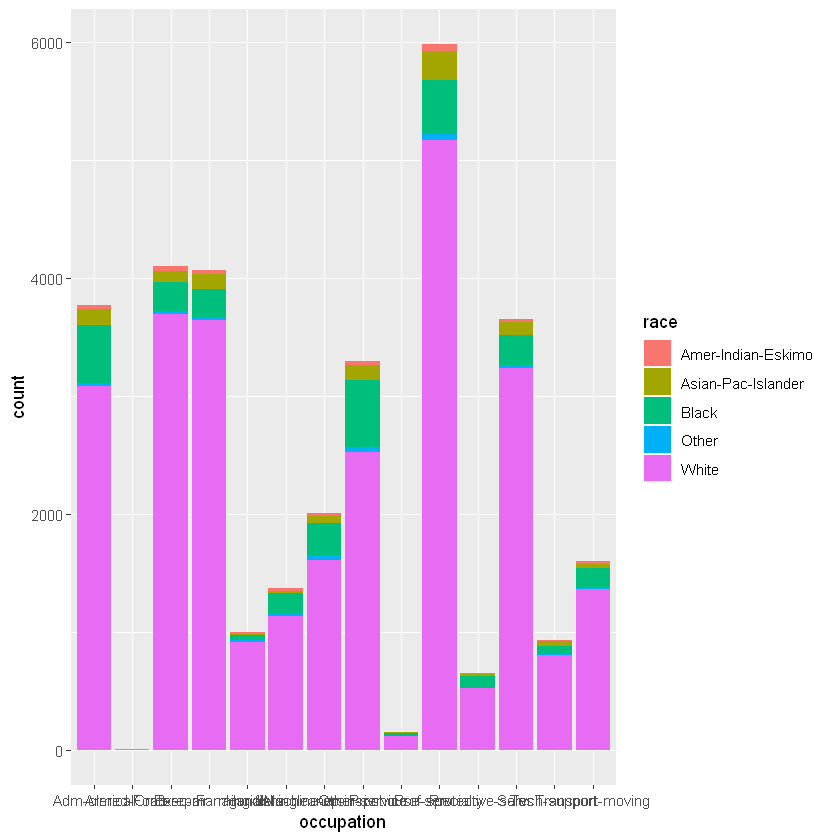

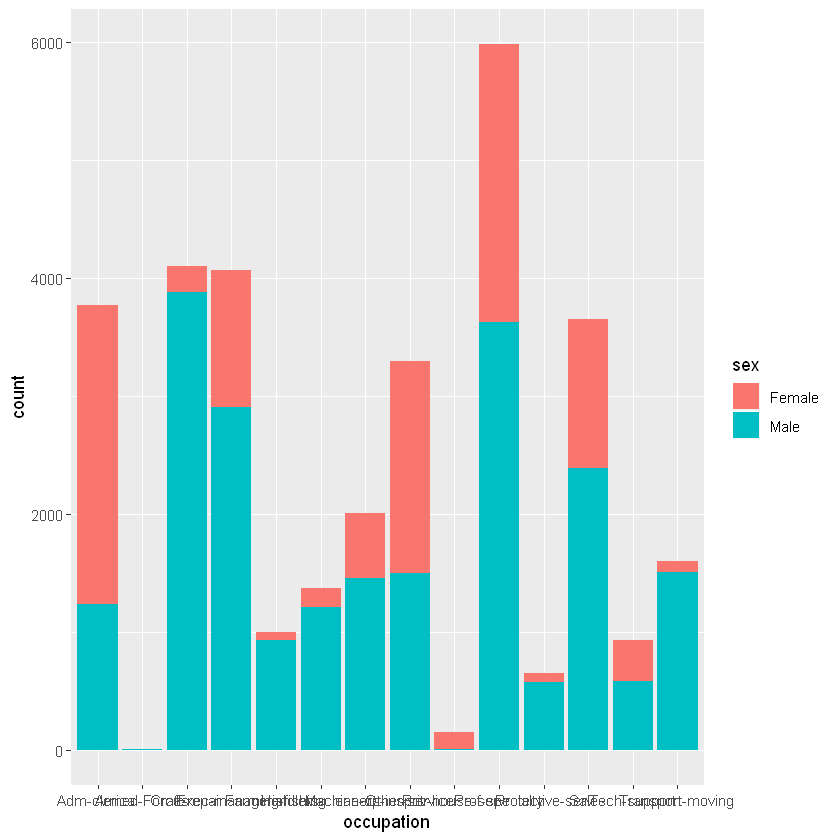

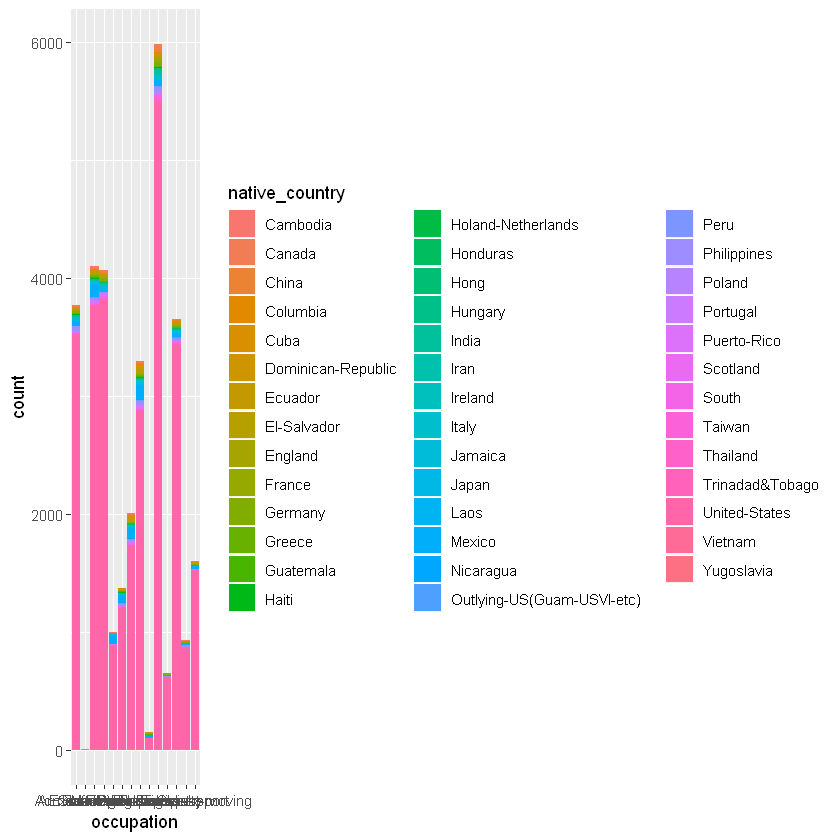

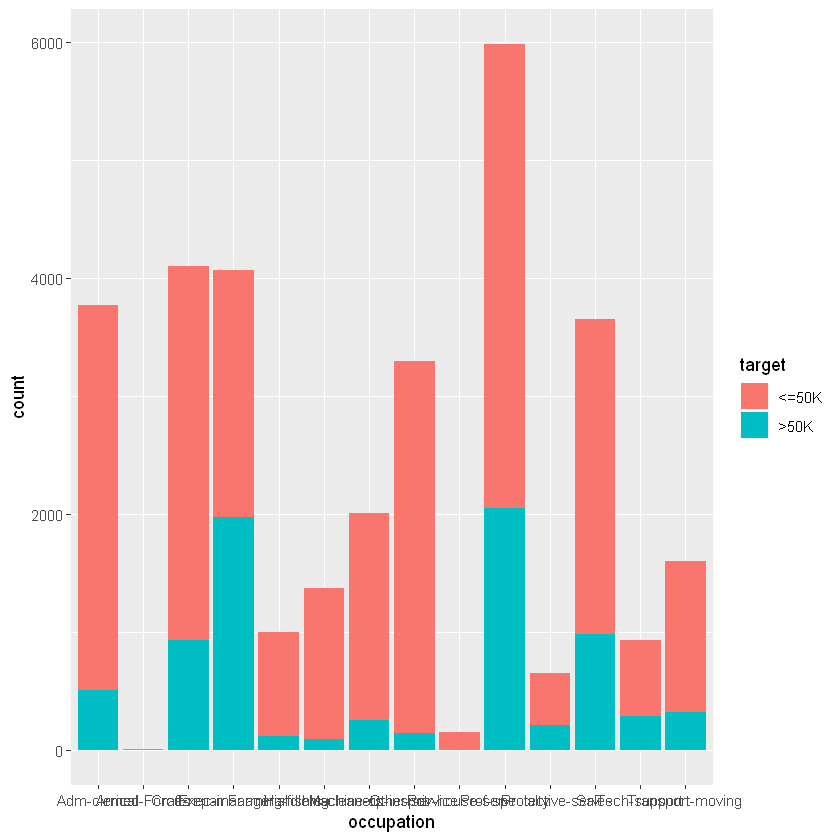

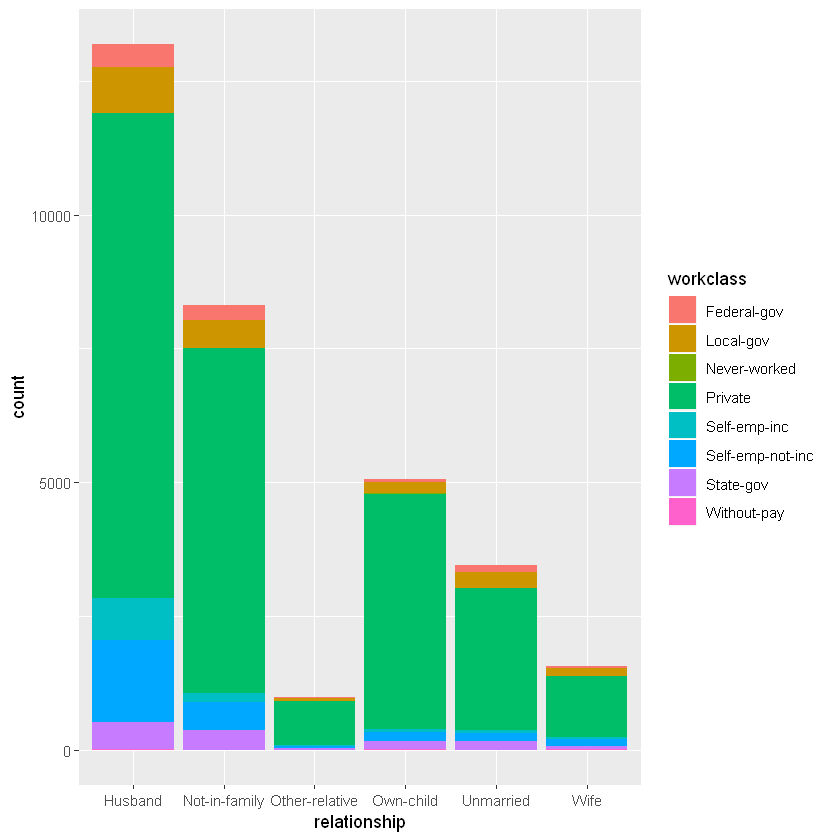

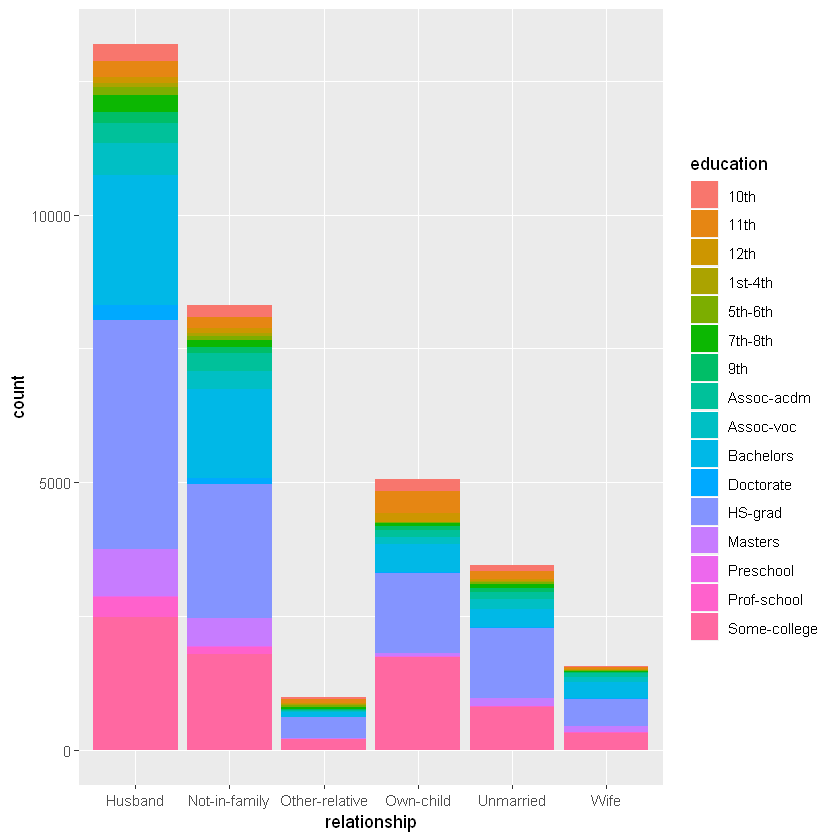

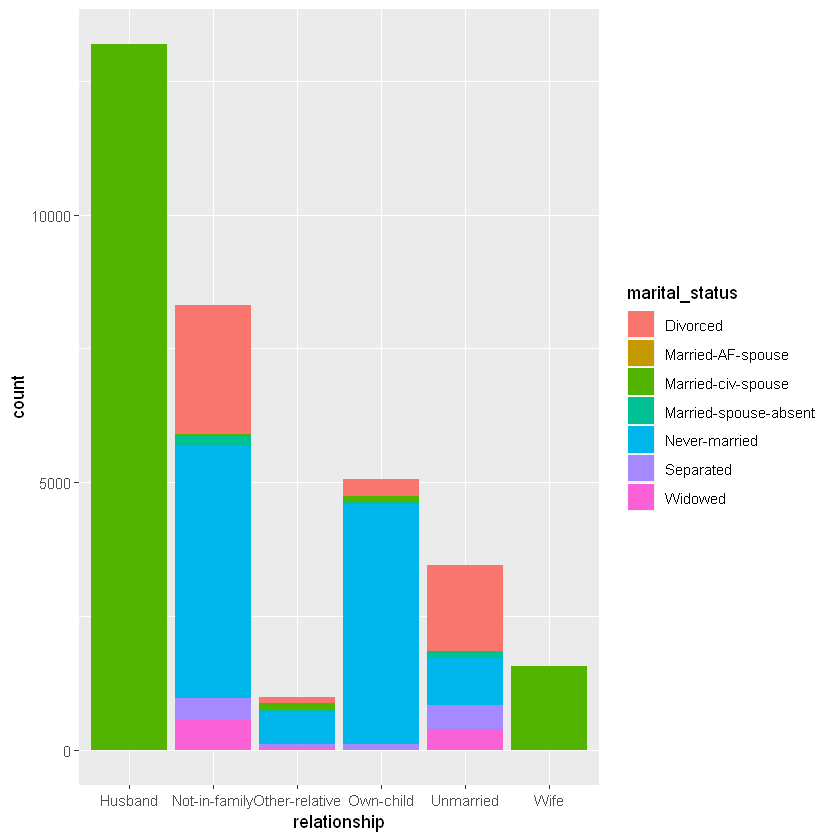

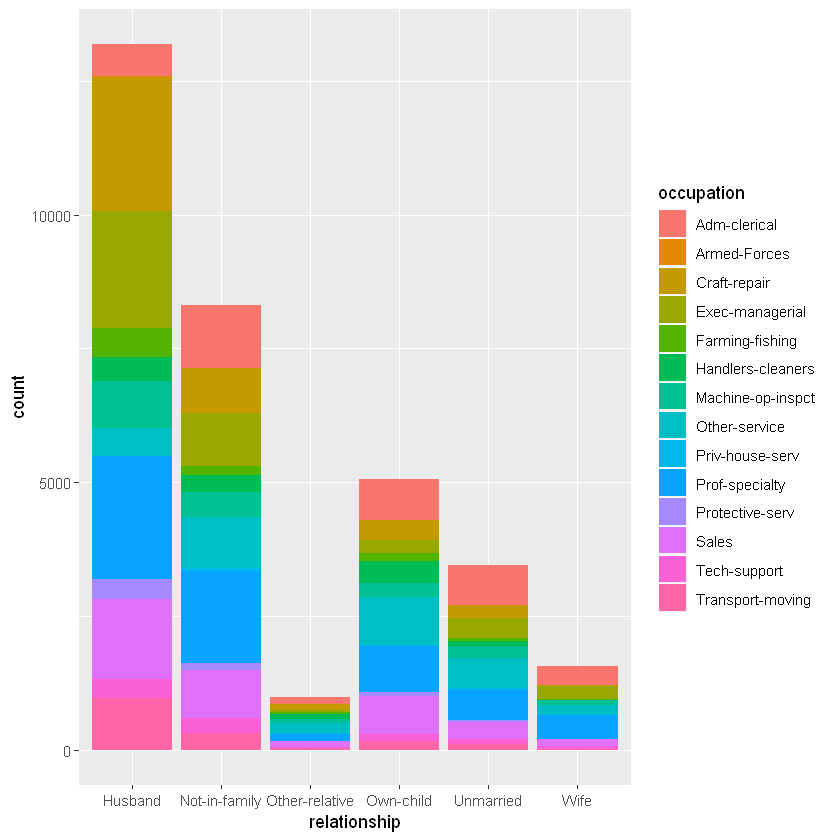

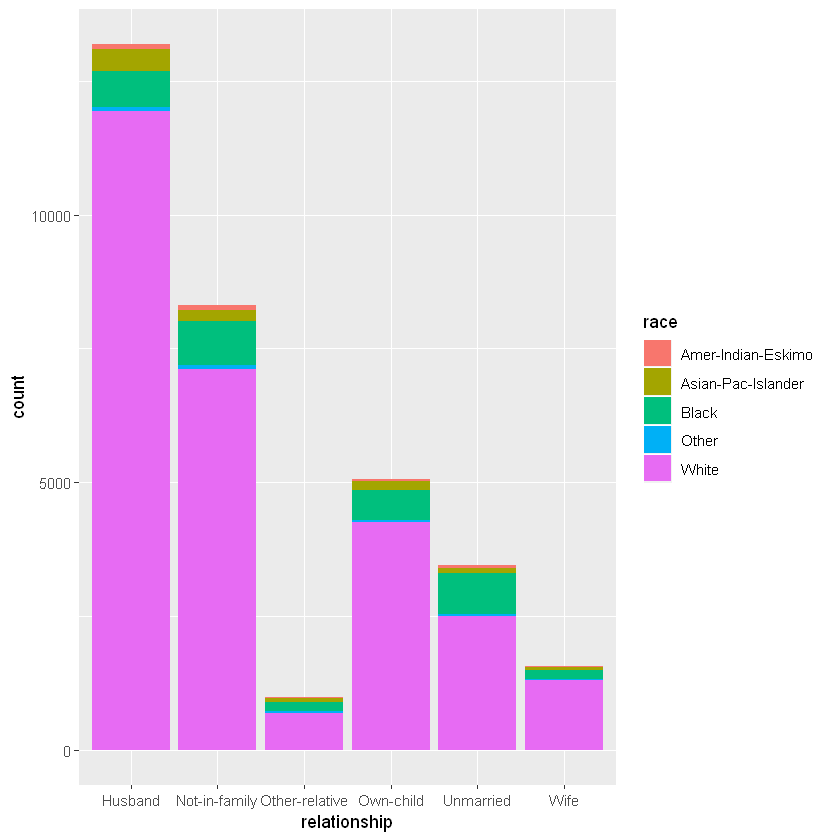

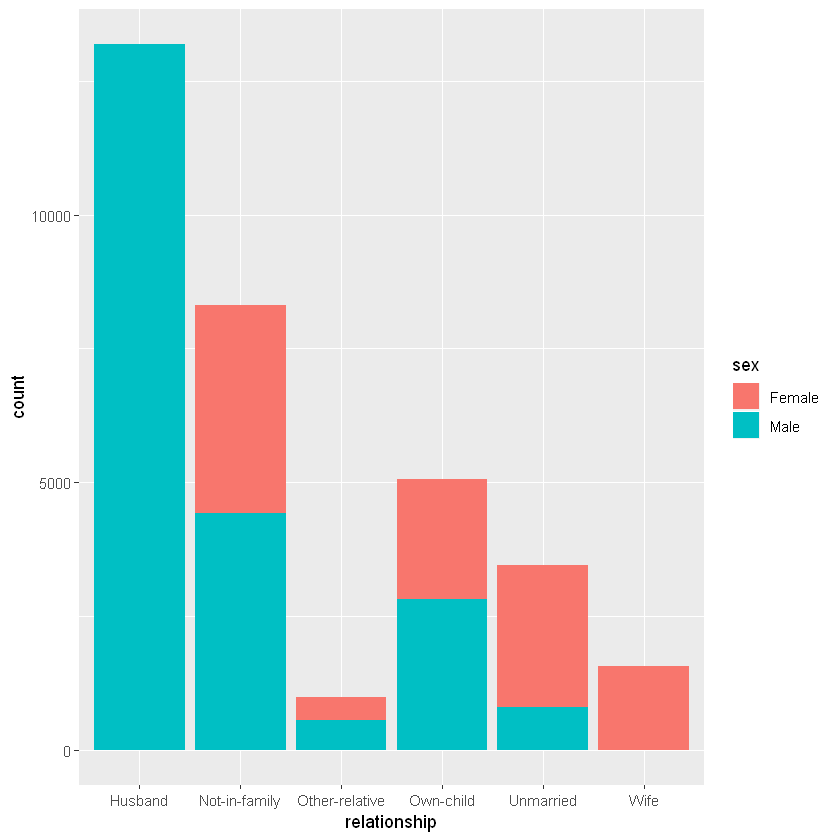

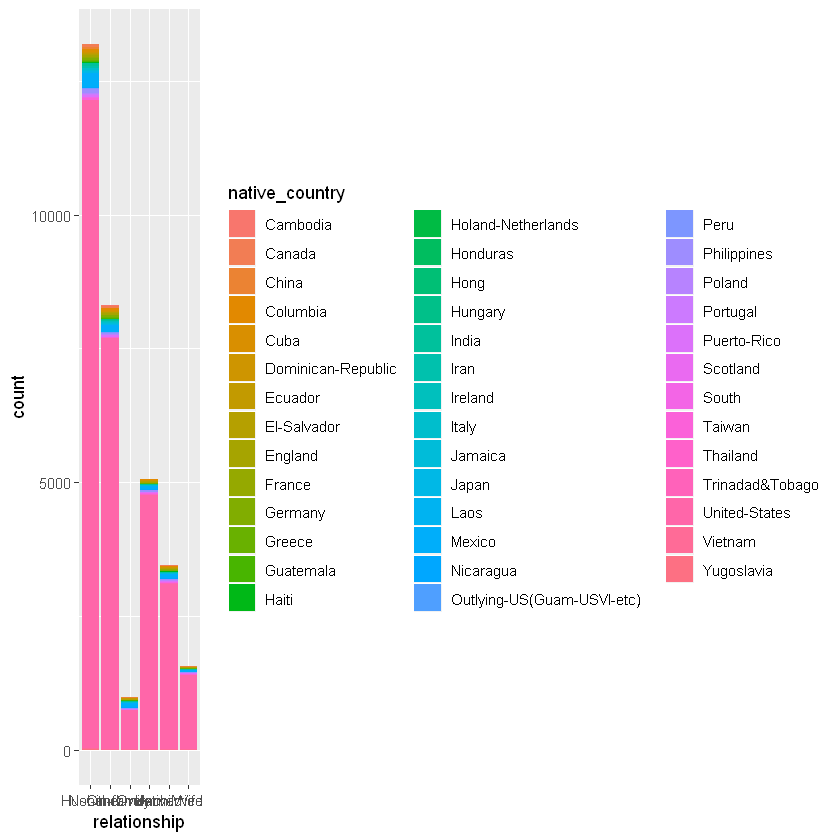

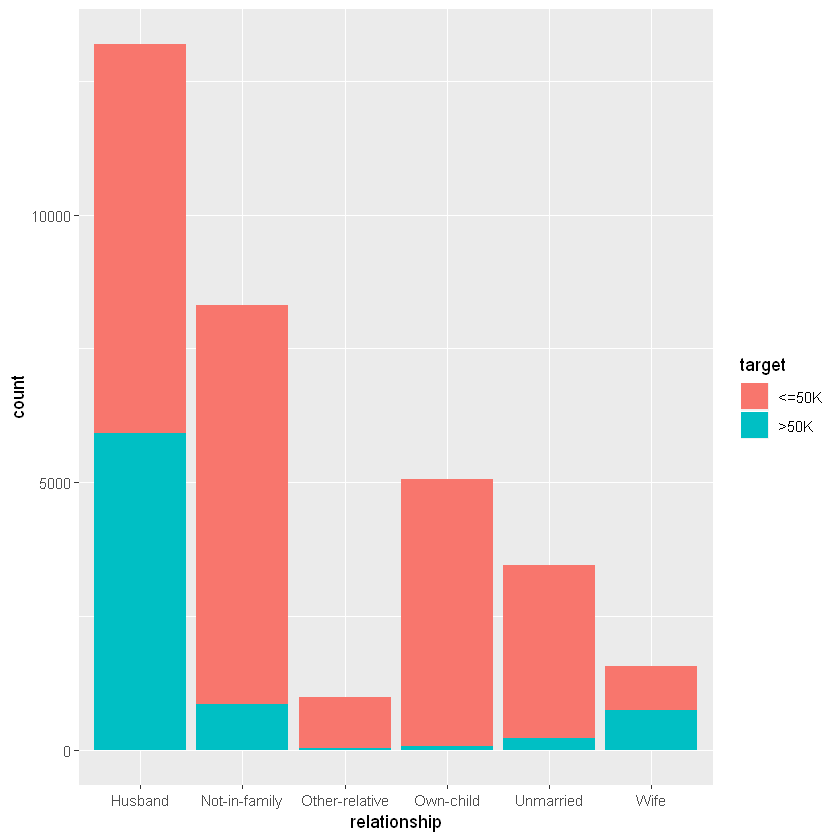

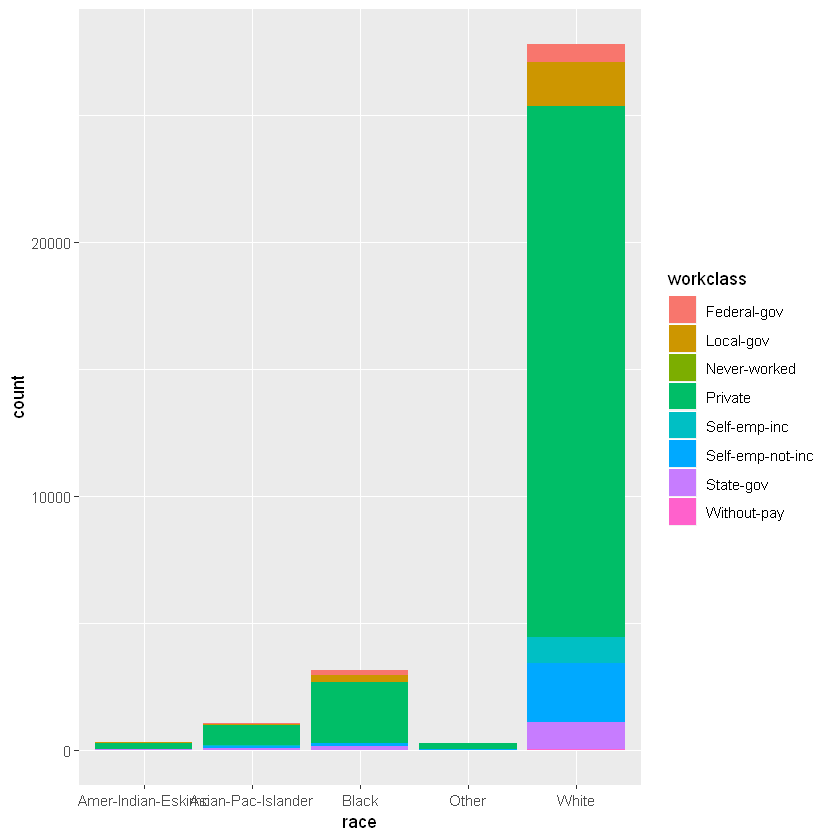

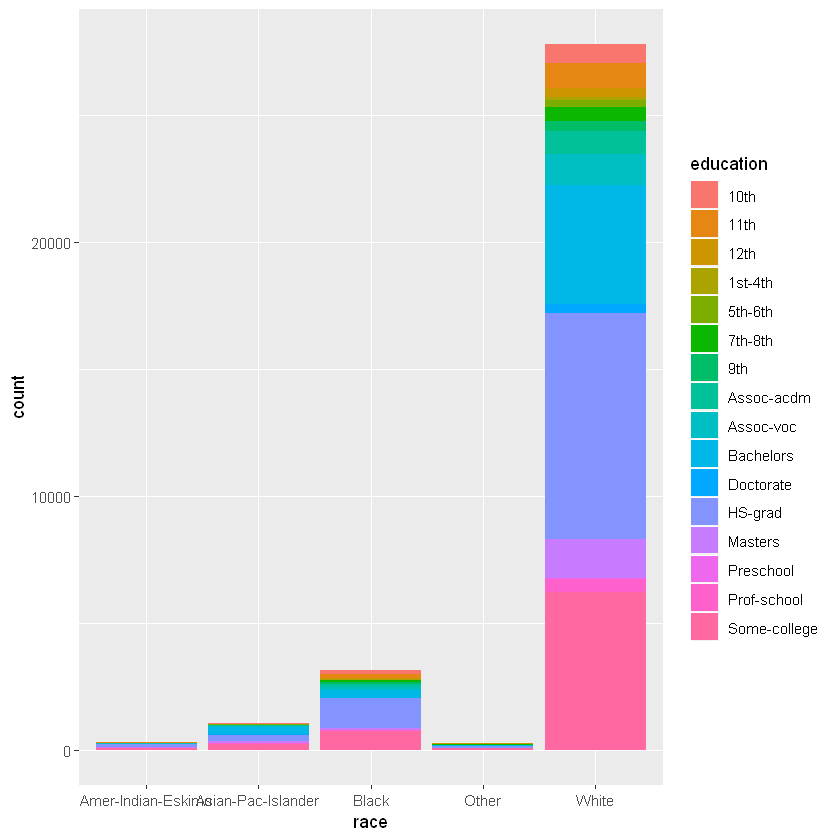

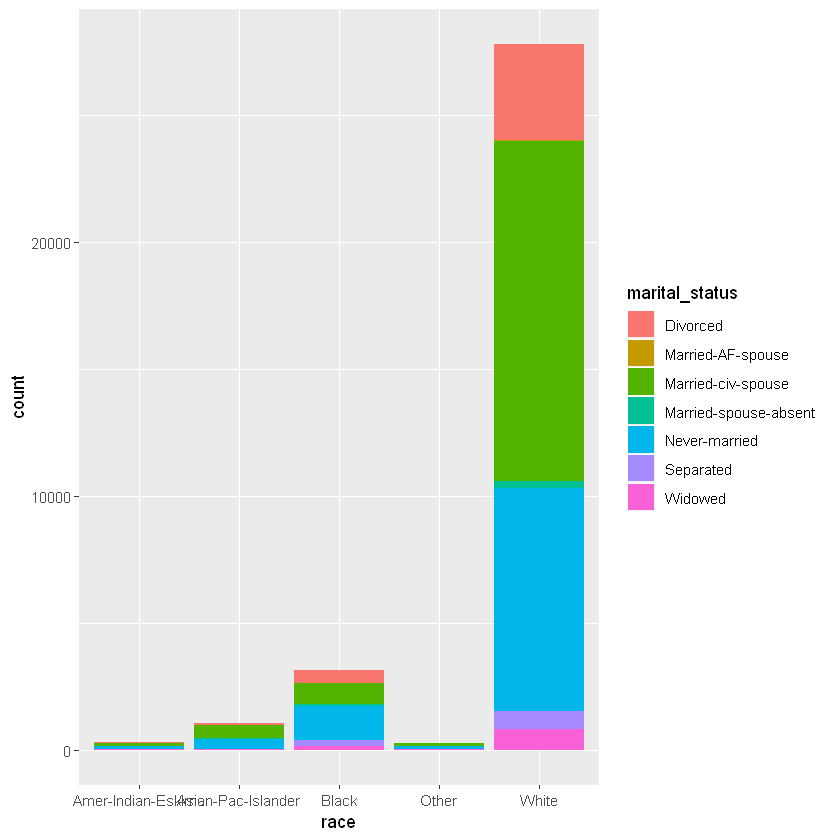

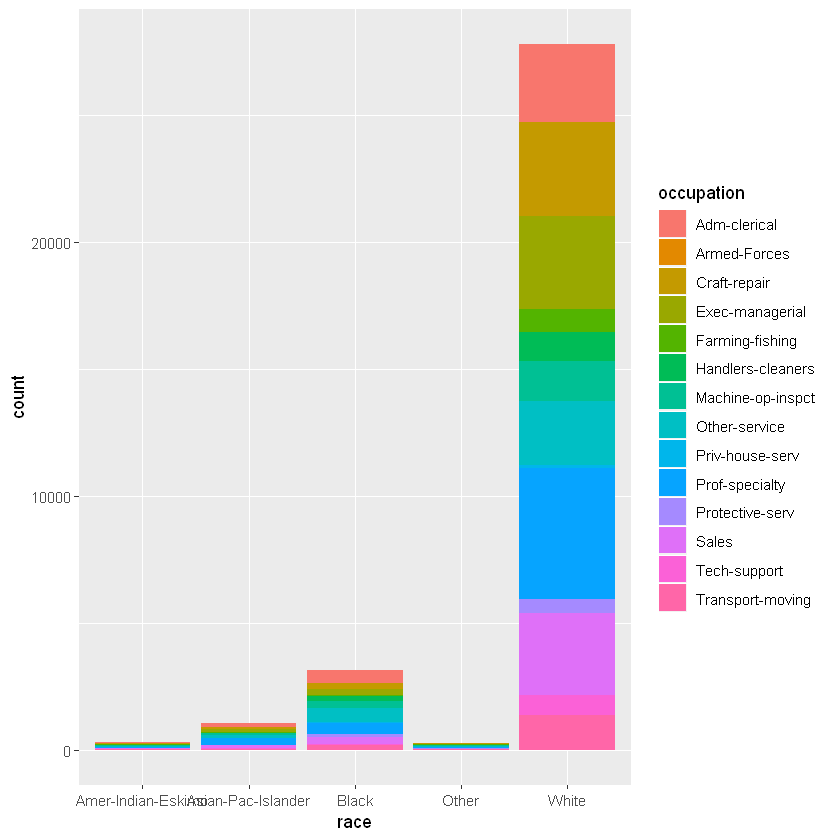

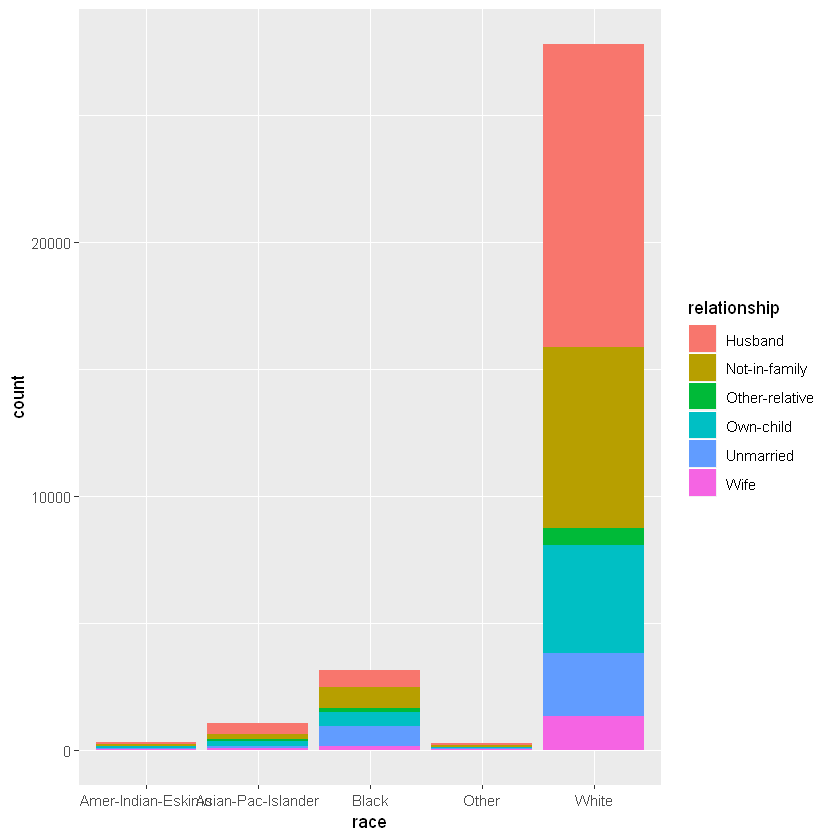

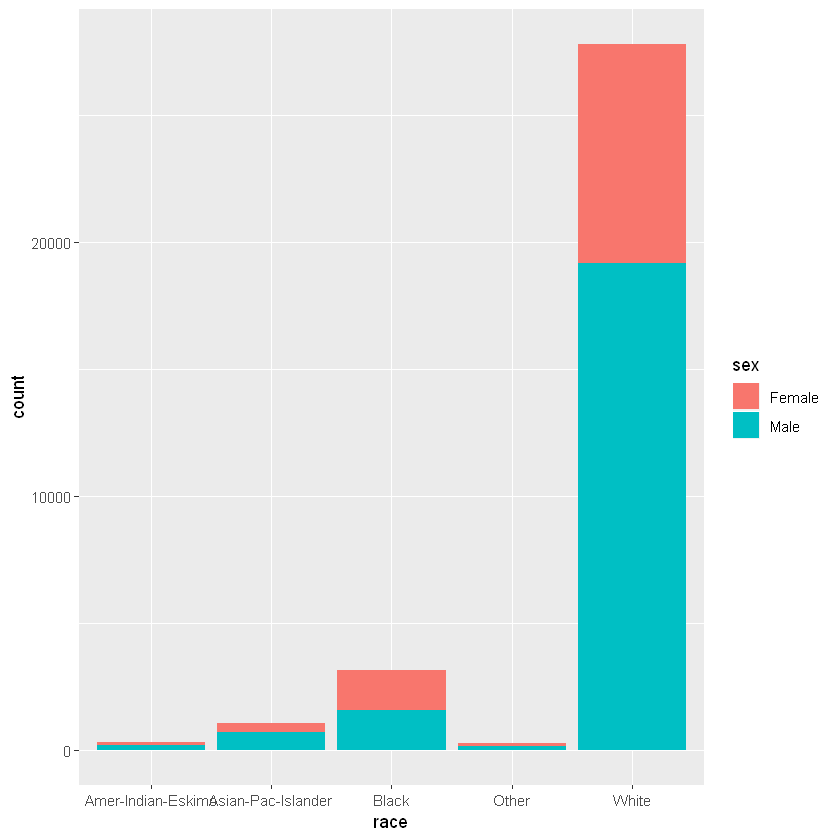

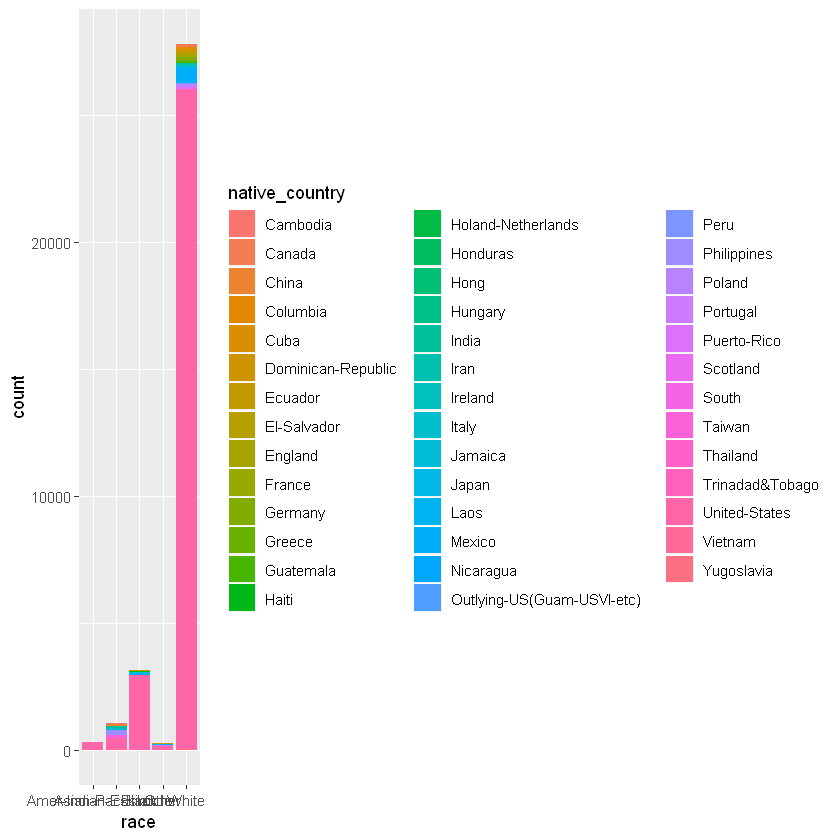

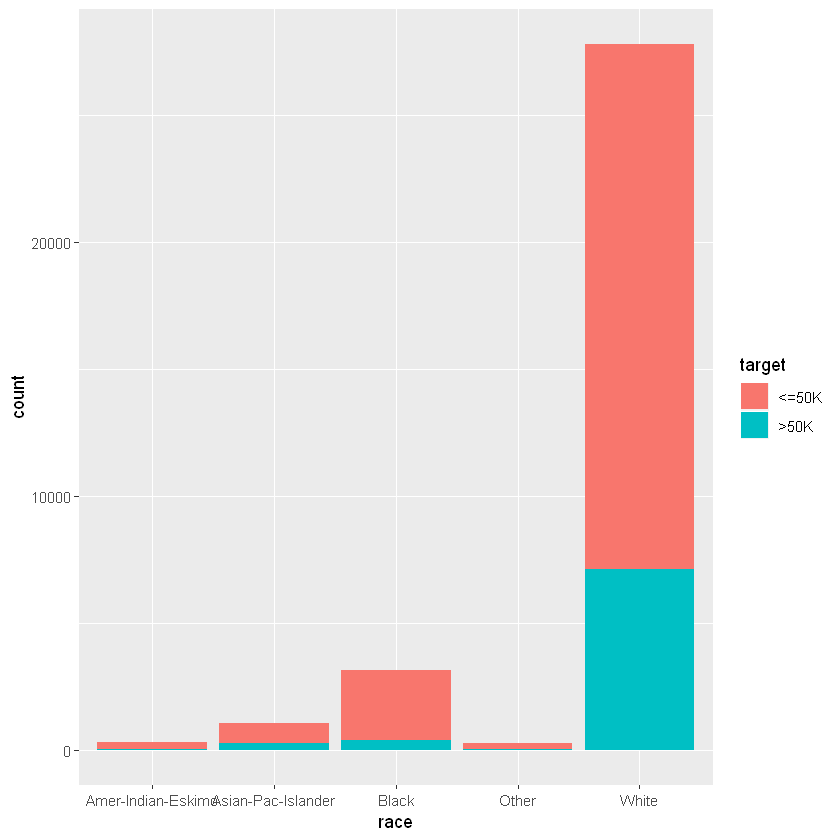

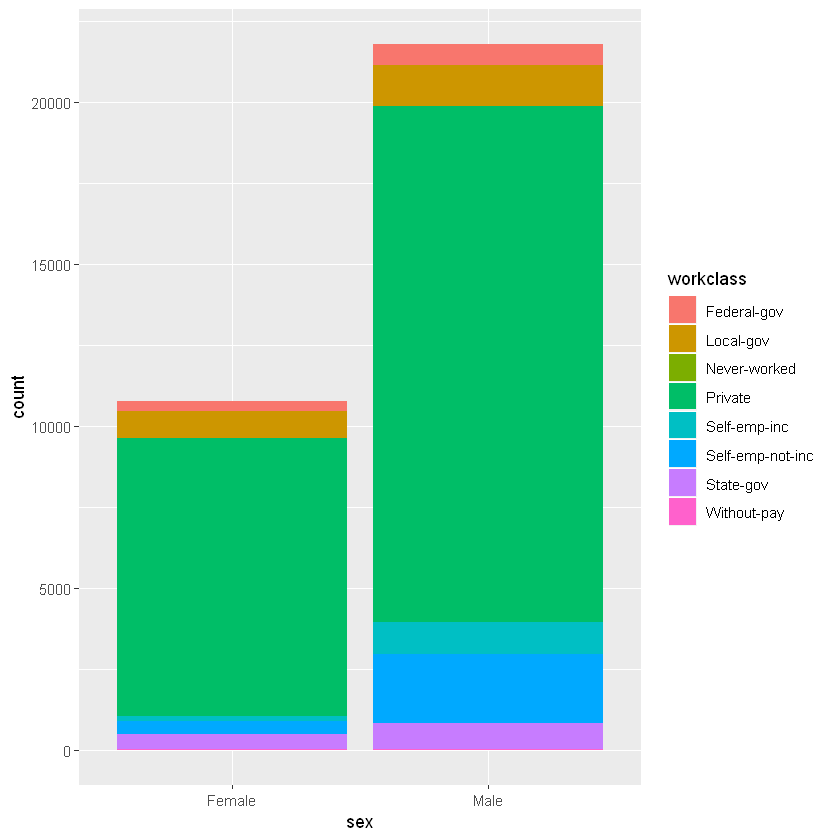

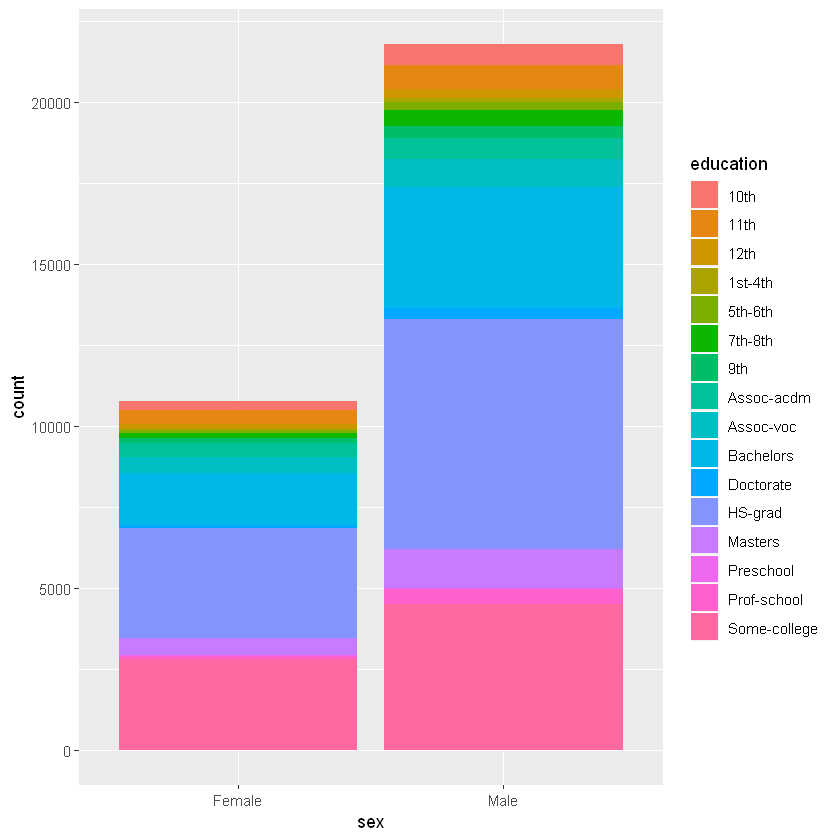

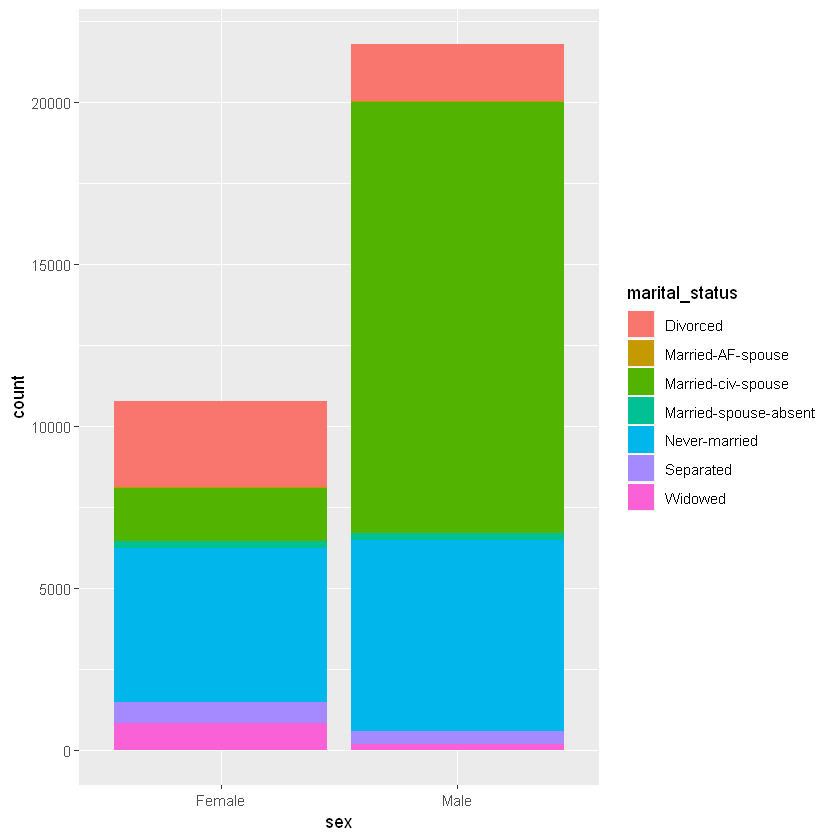

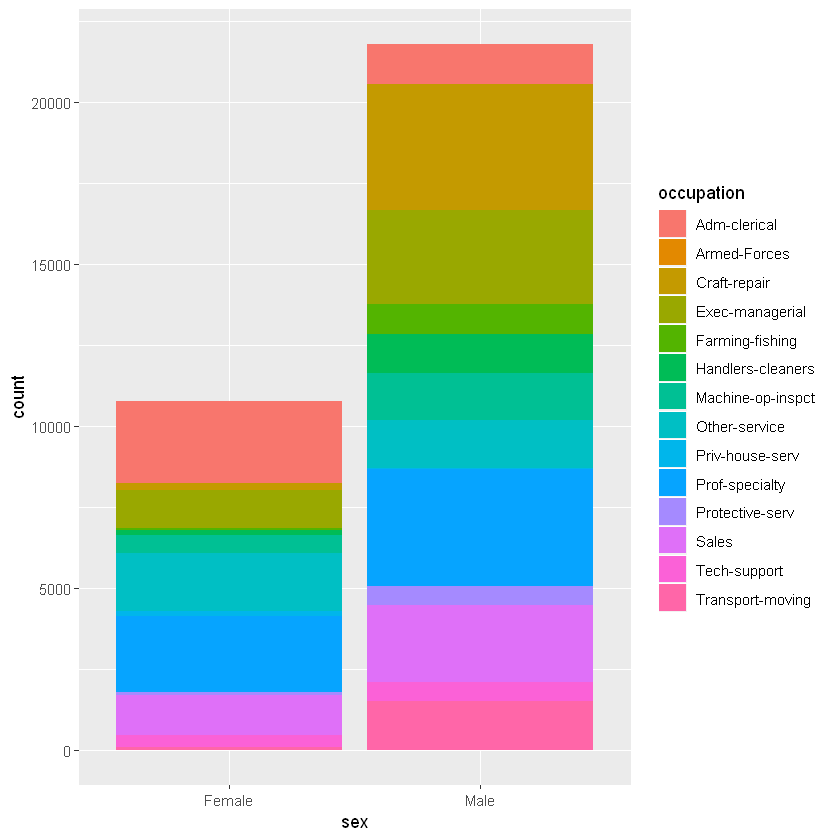

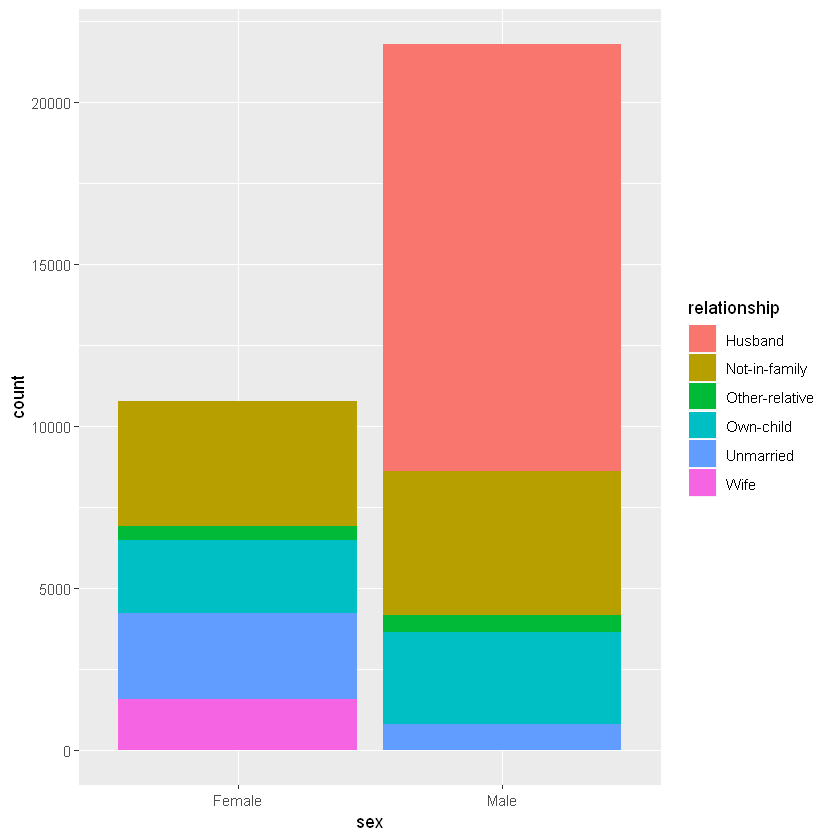

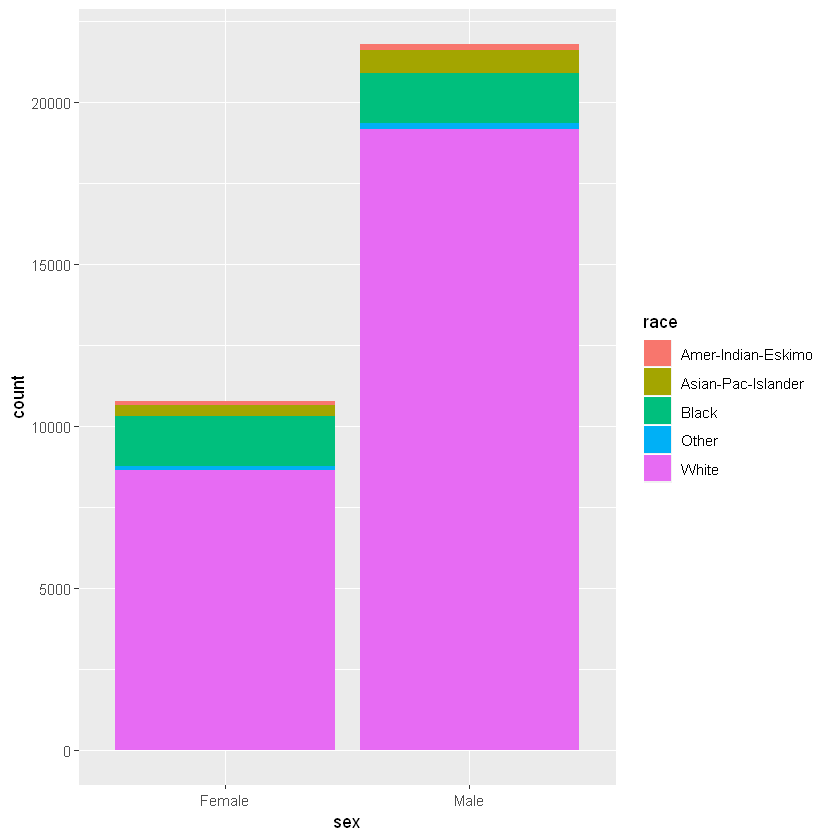

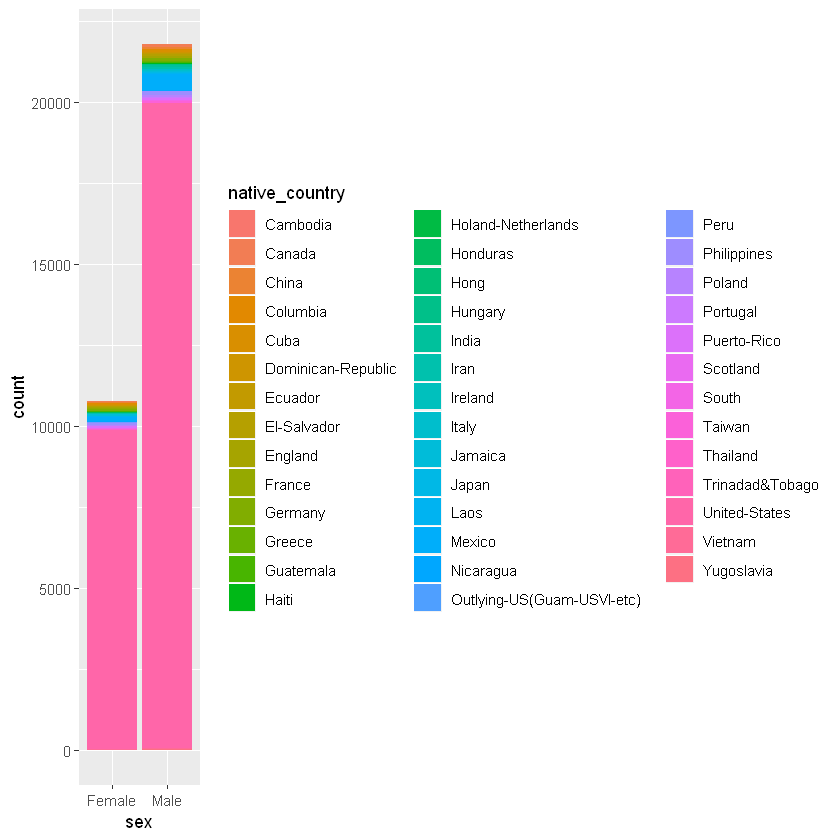

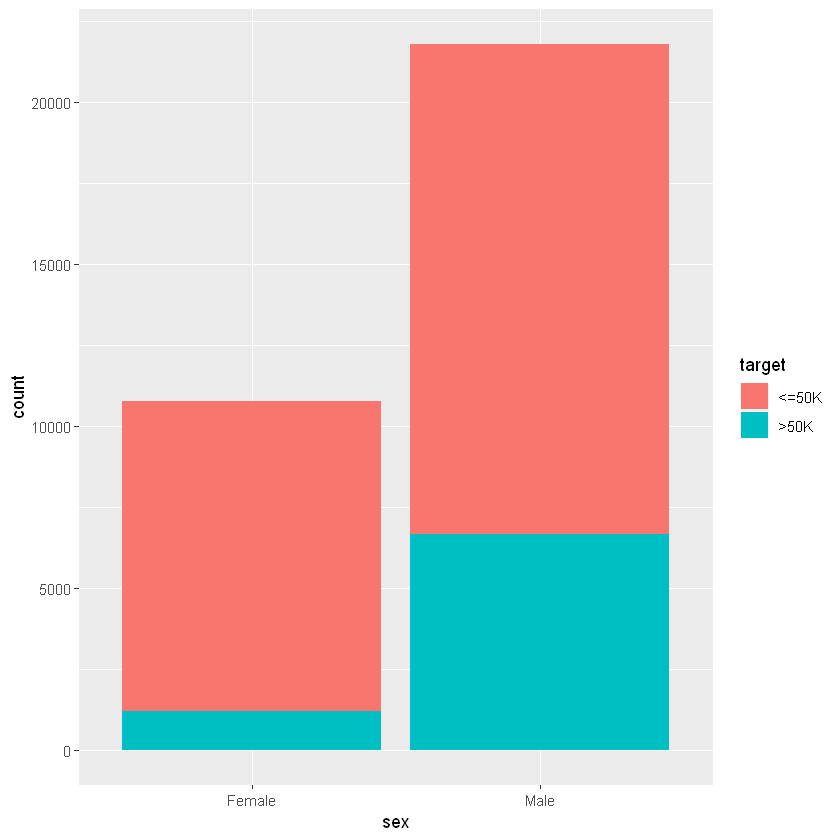

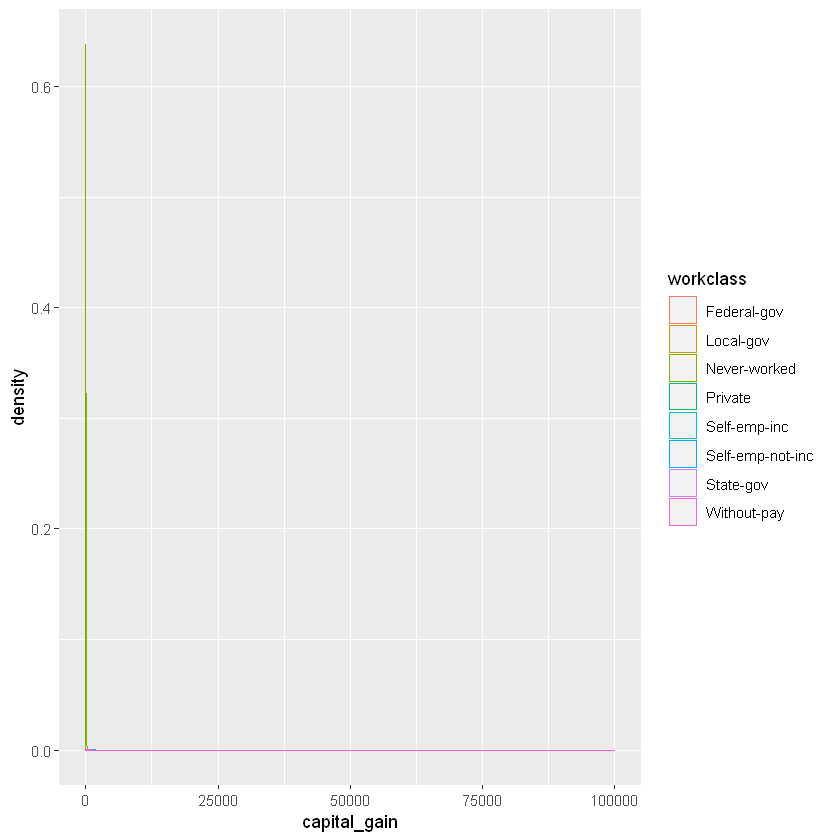

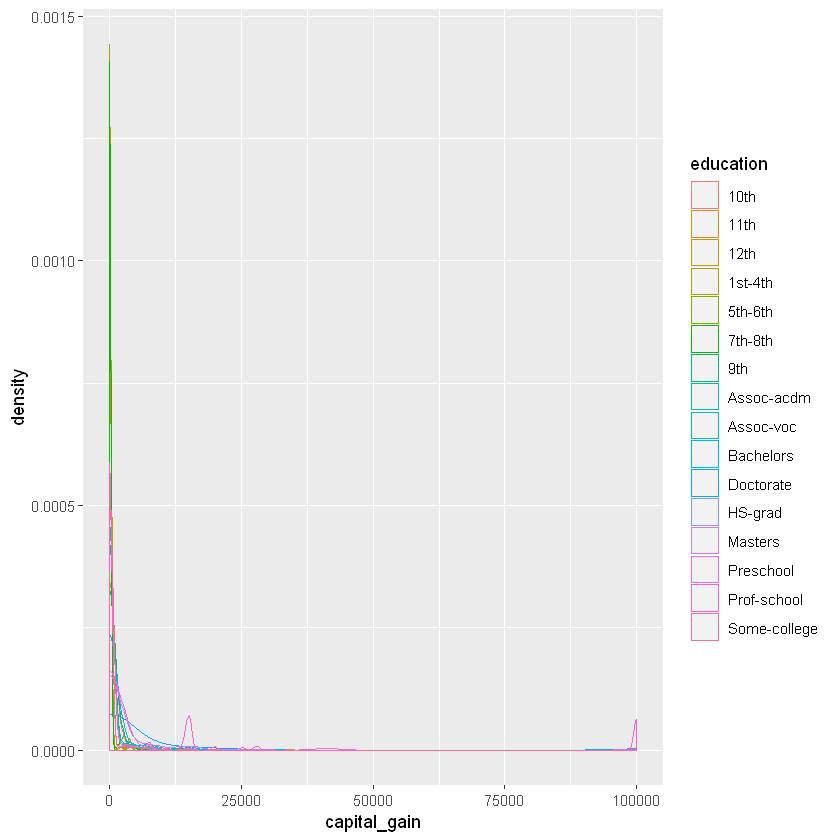

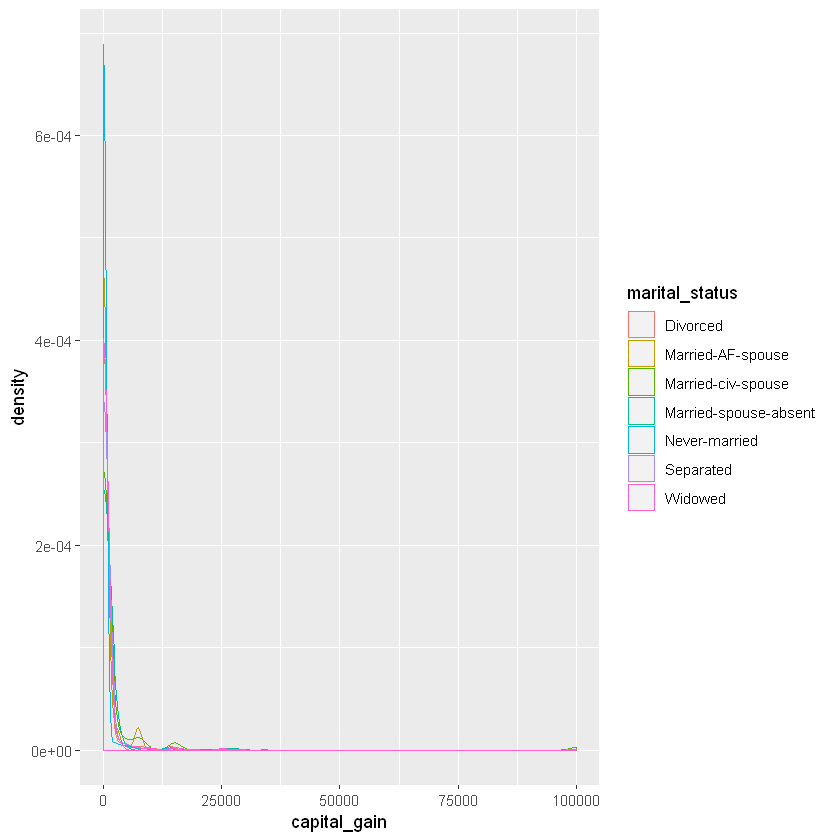

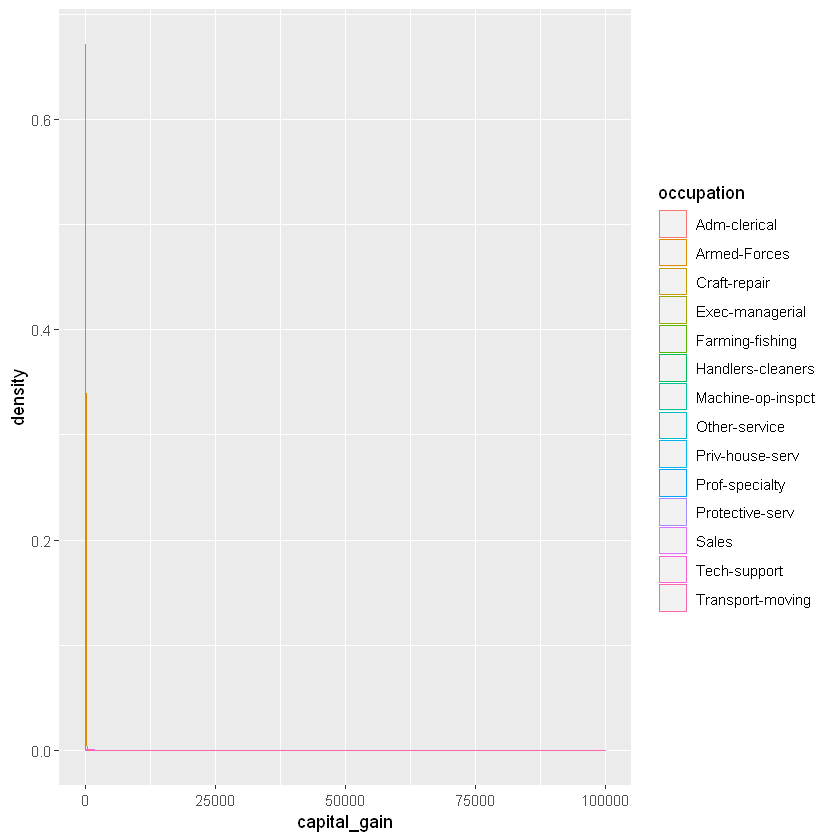

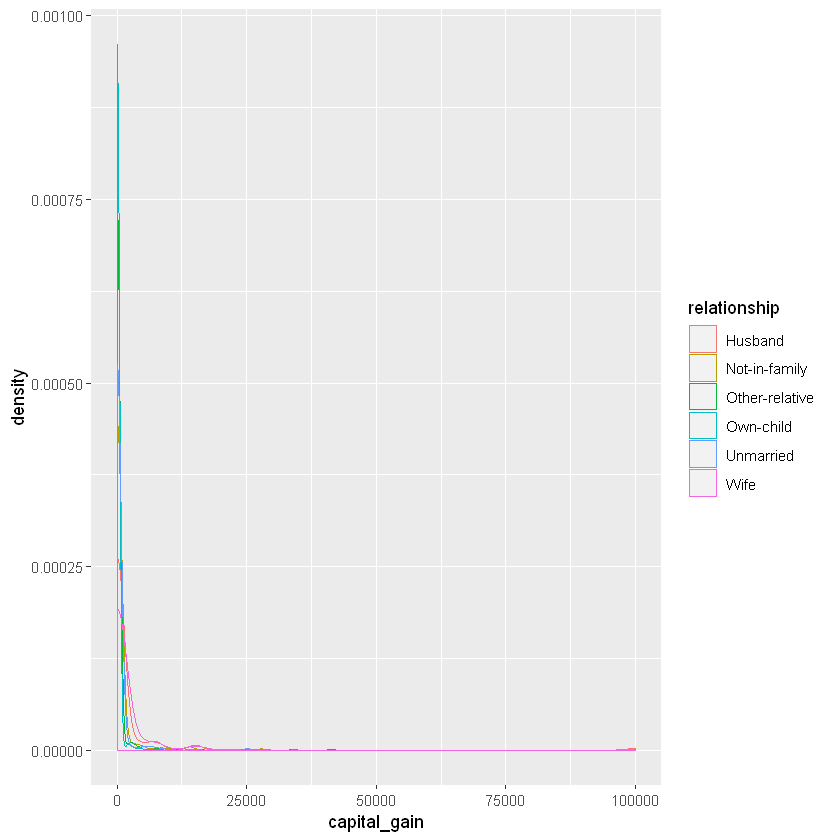

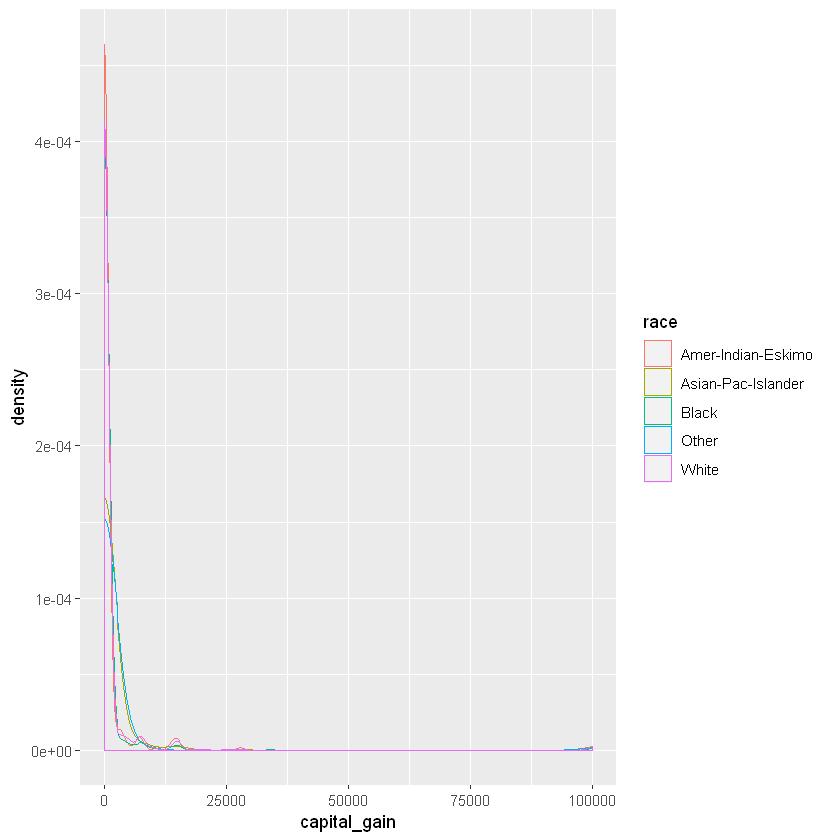

Warning message:
"Groups with fewer than two data points have been dropped."

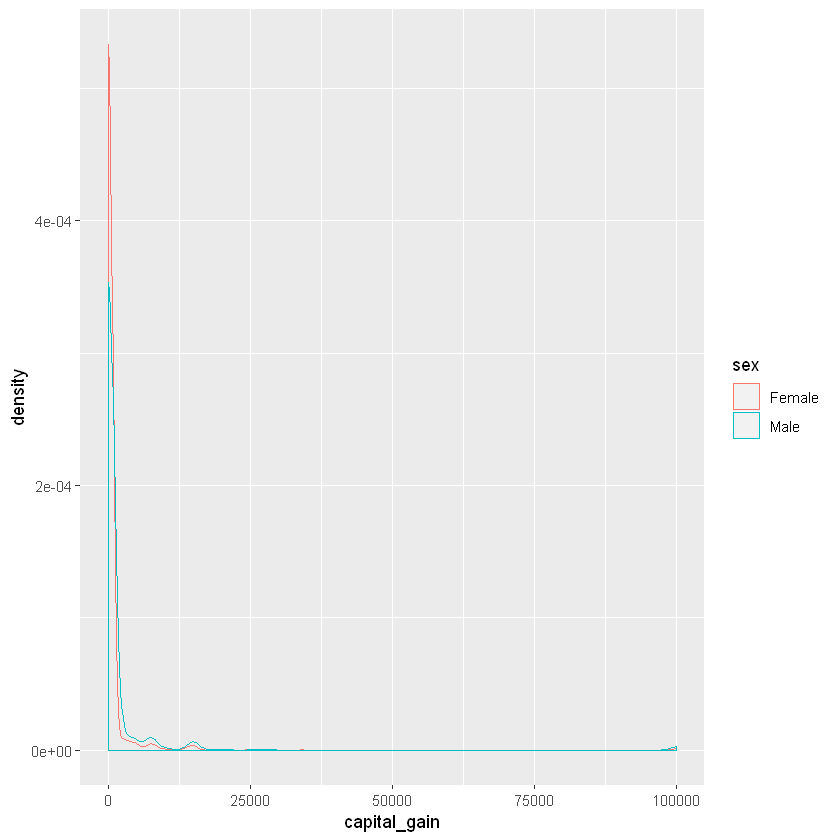

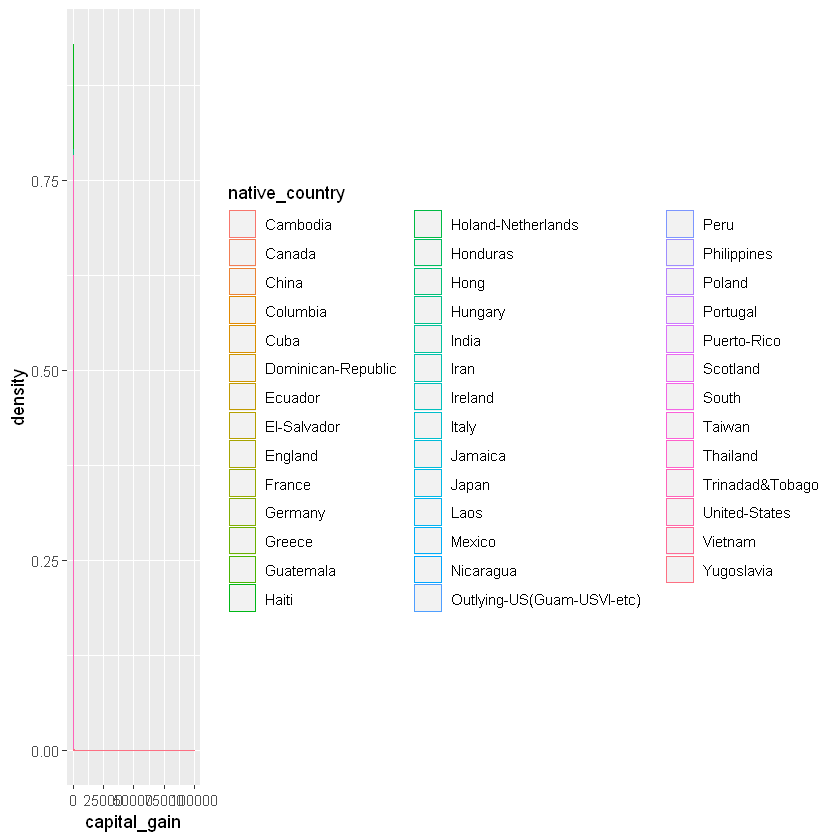

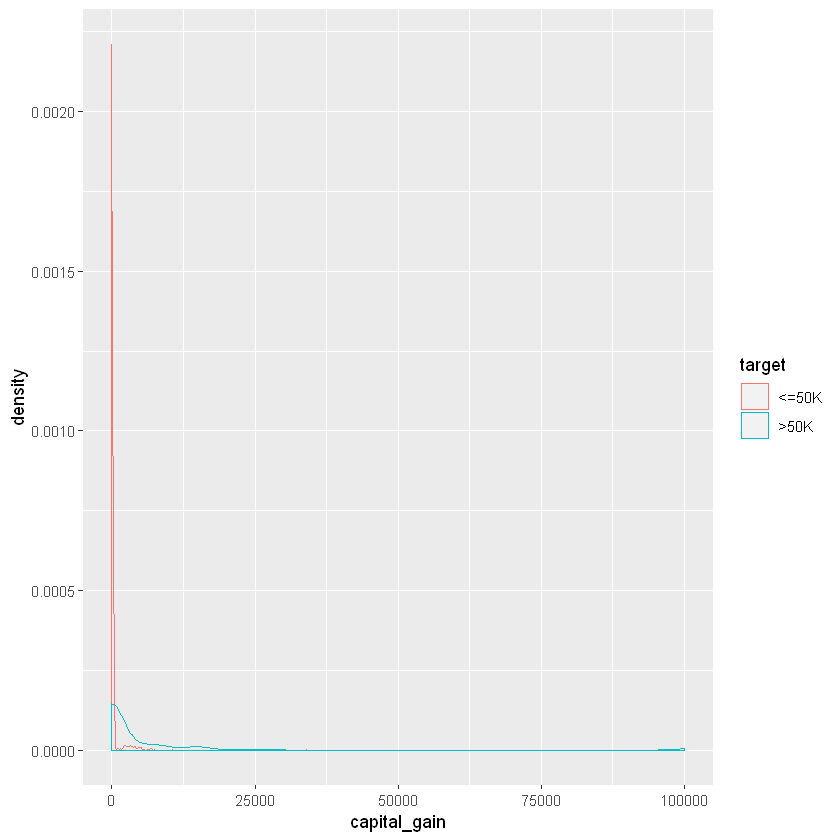

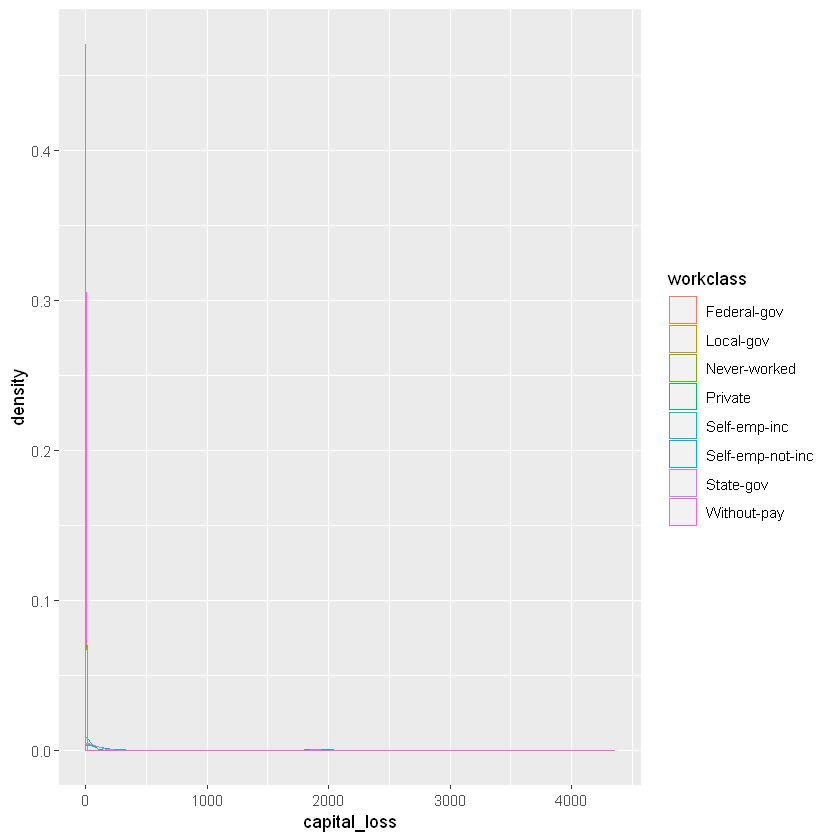

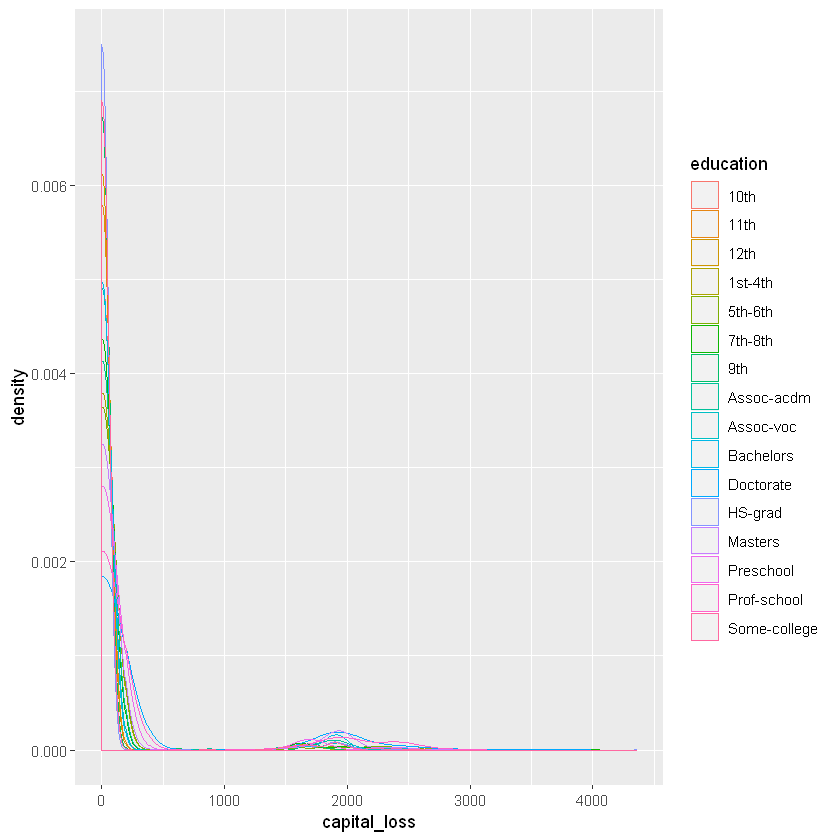

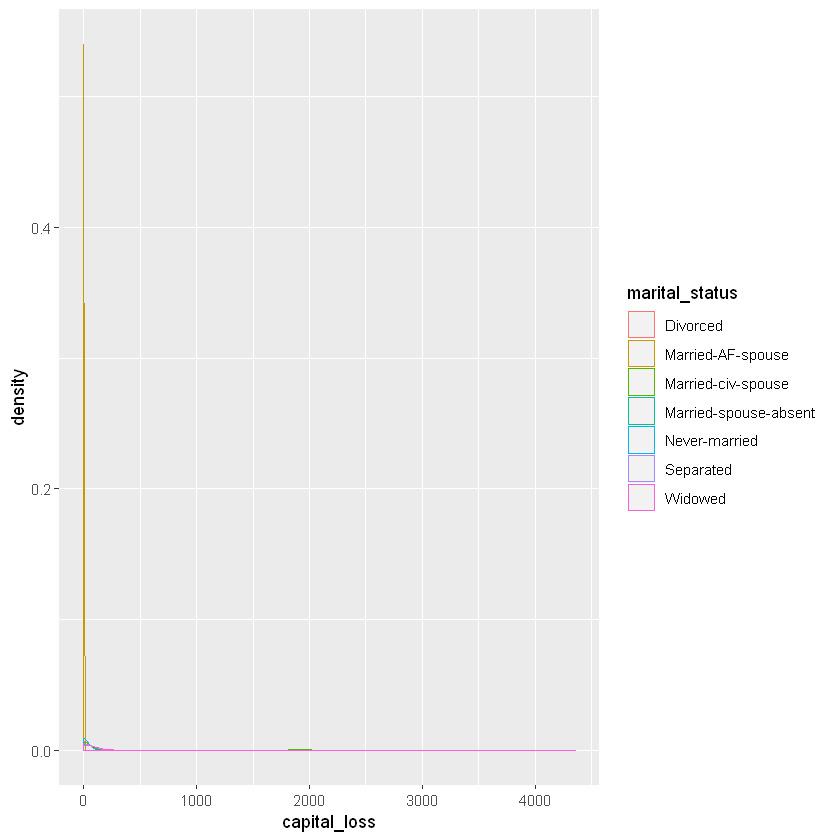

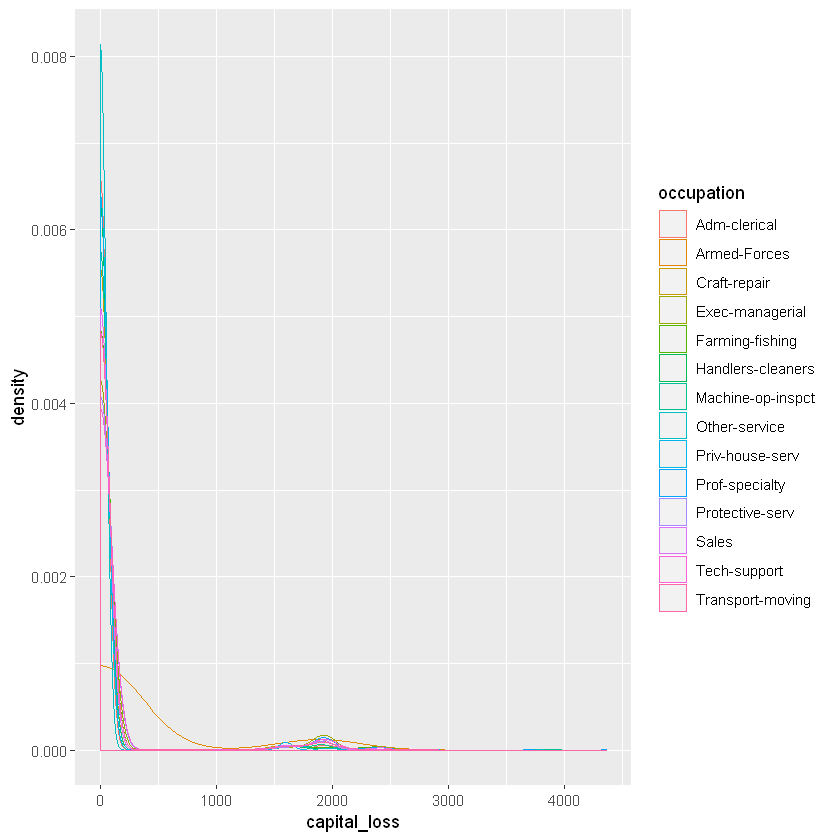

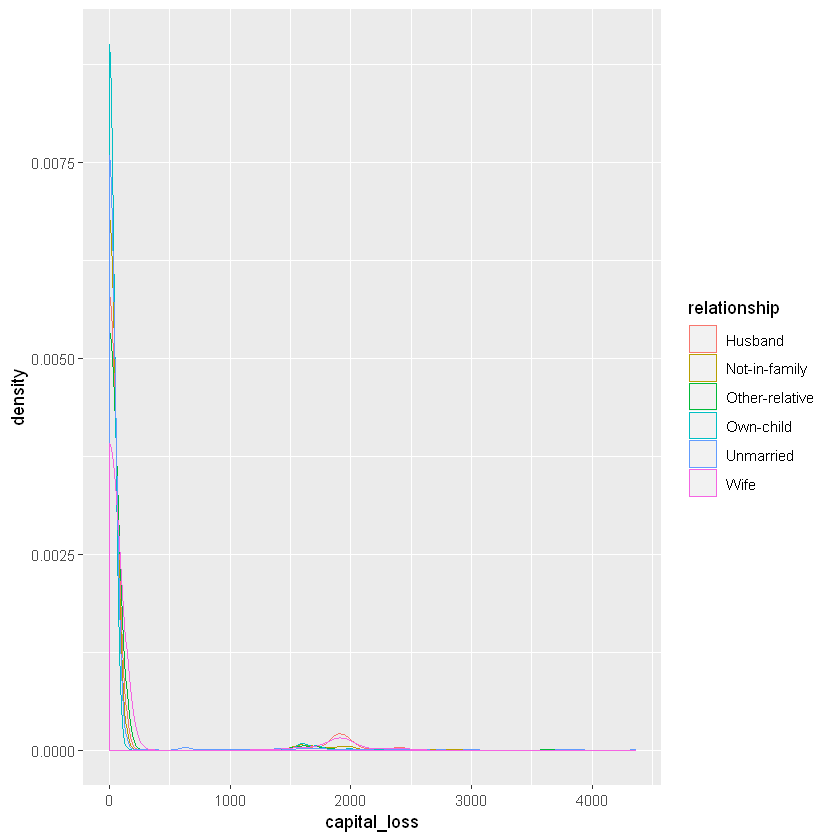

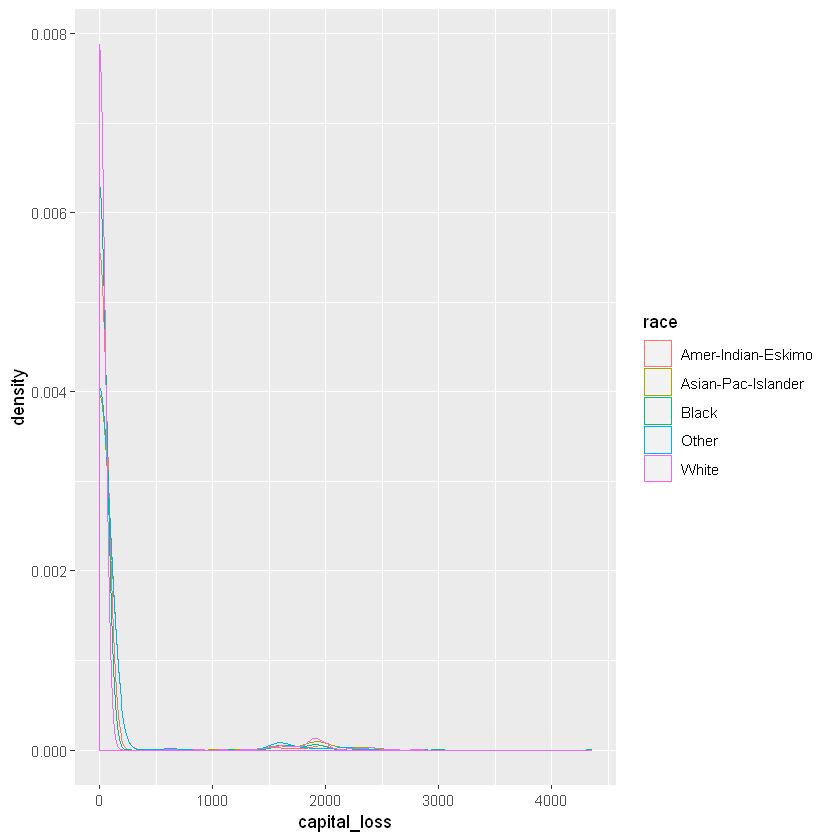

Warning message:
"Groups with fewer than two data points have been dropped."

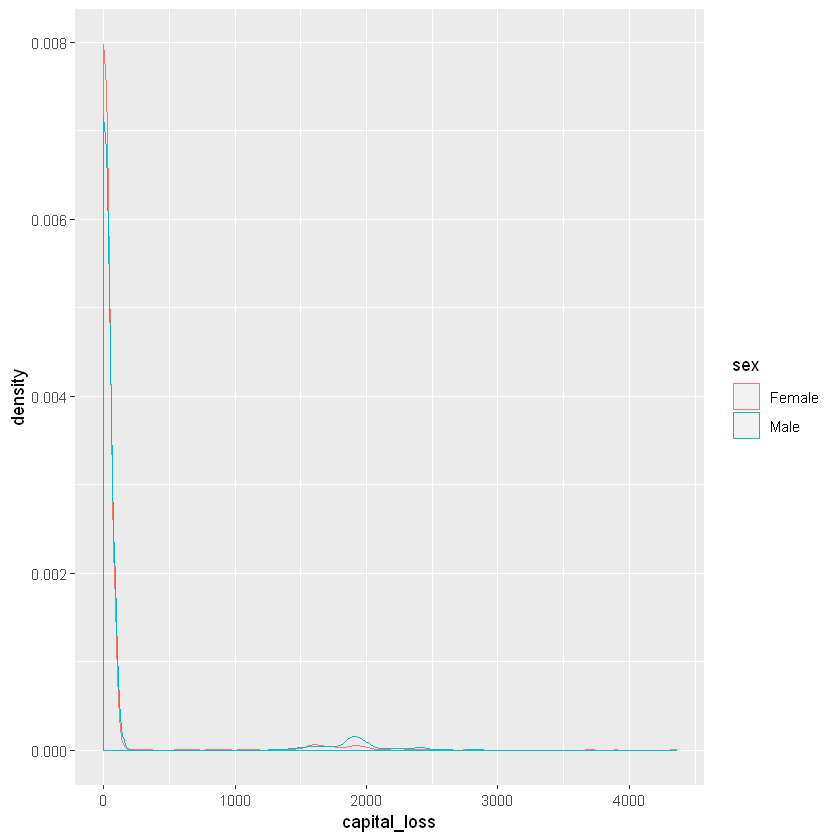

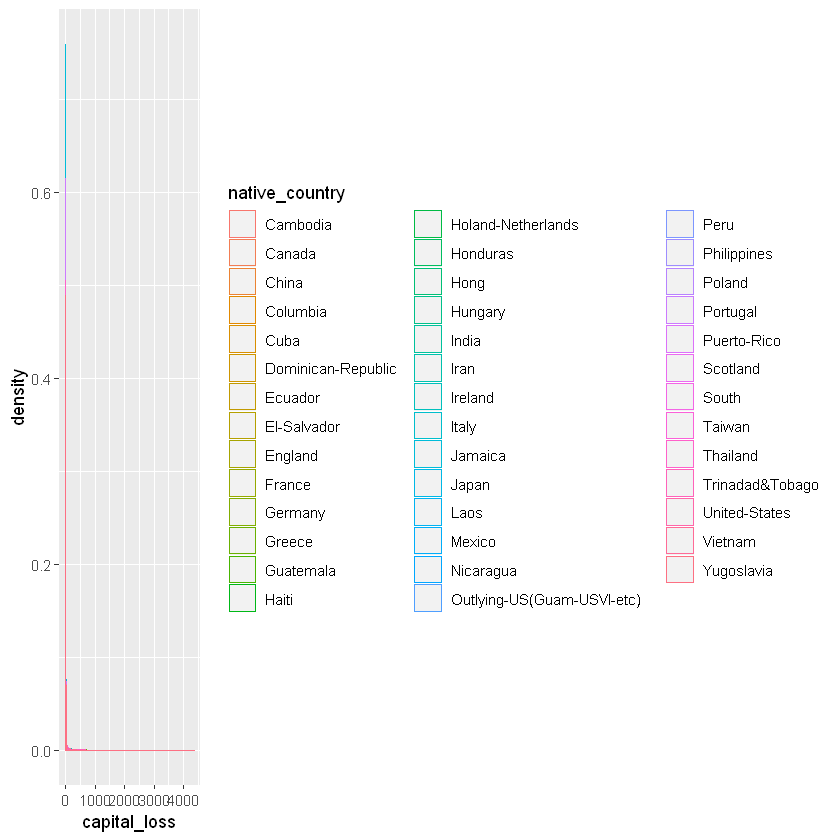

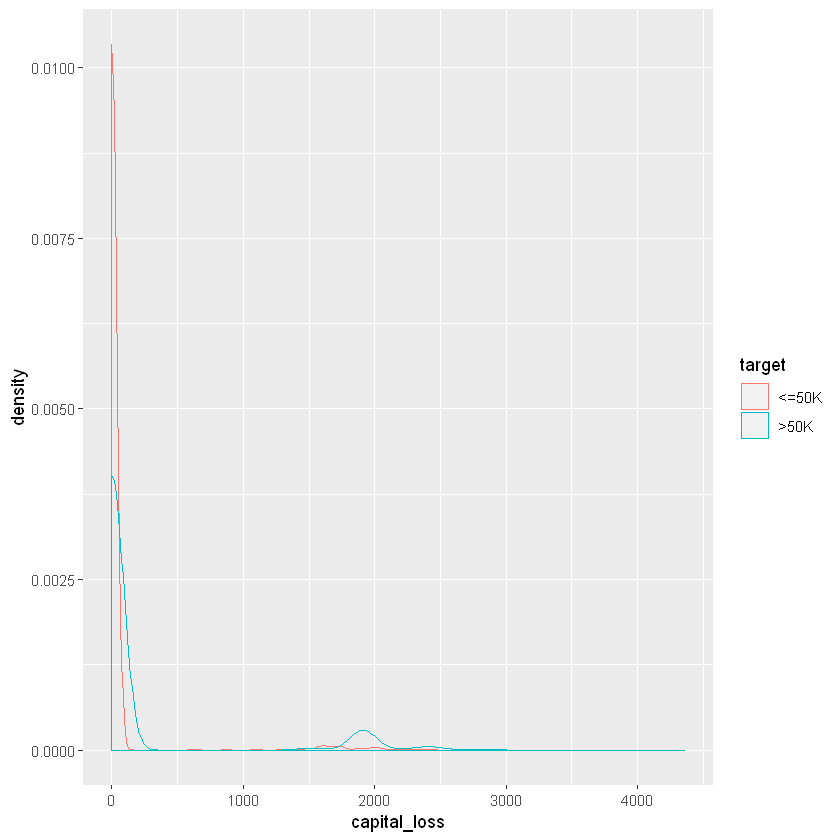

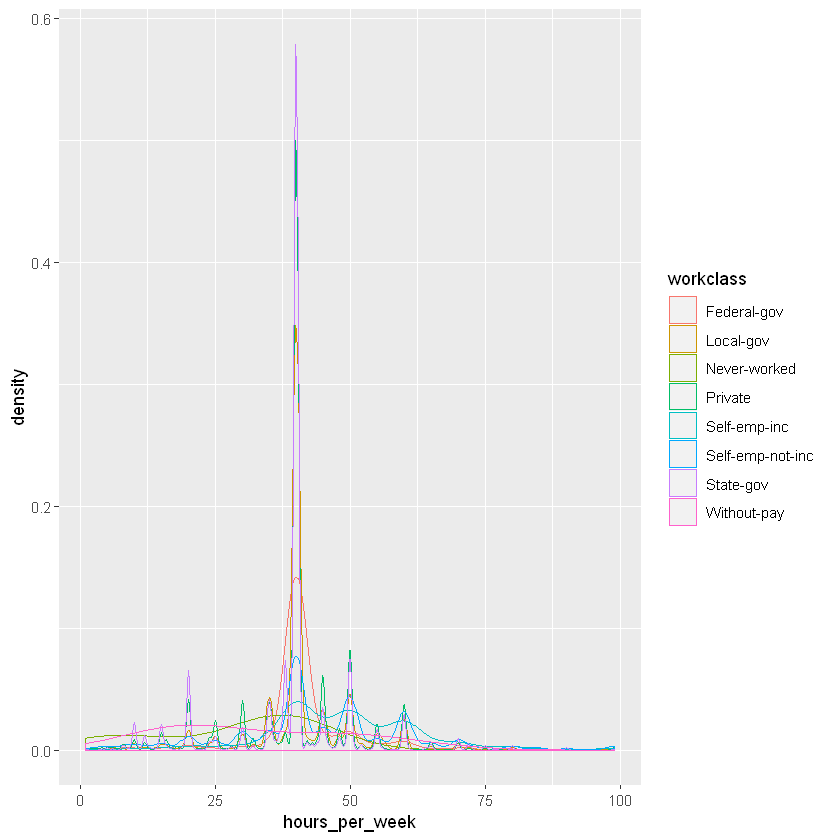

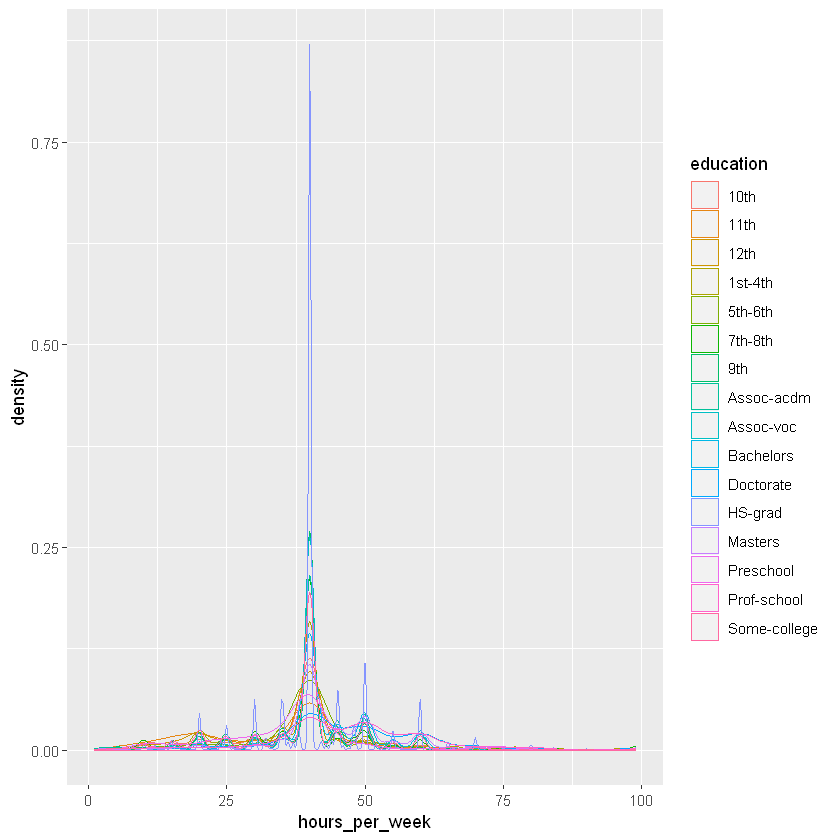

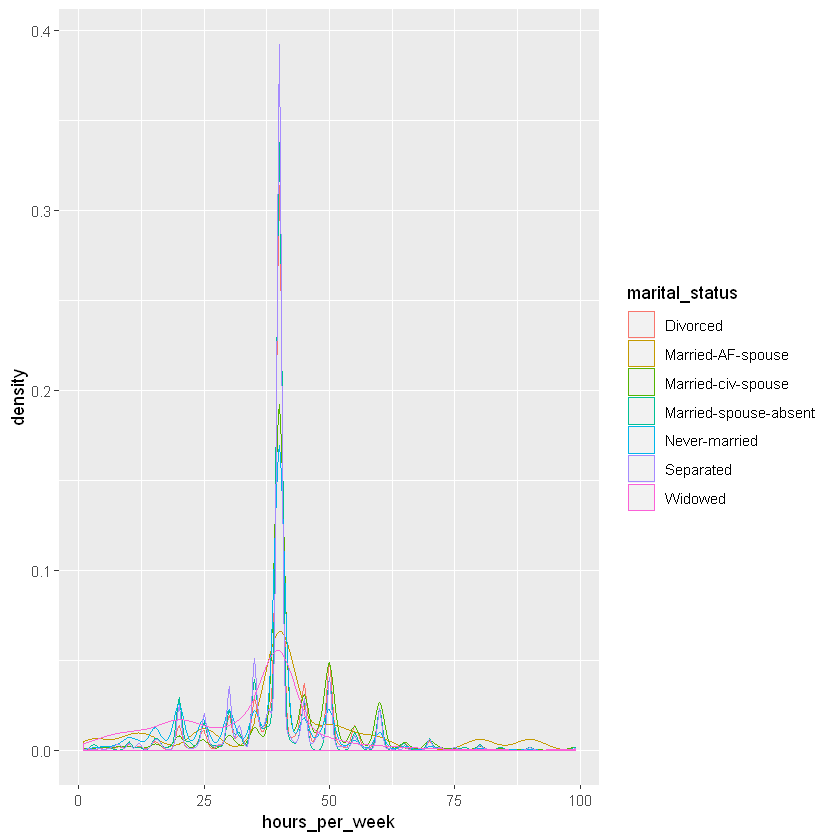

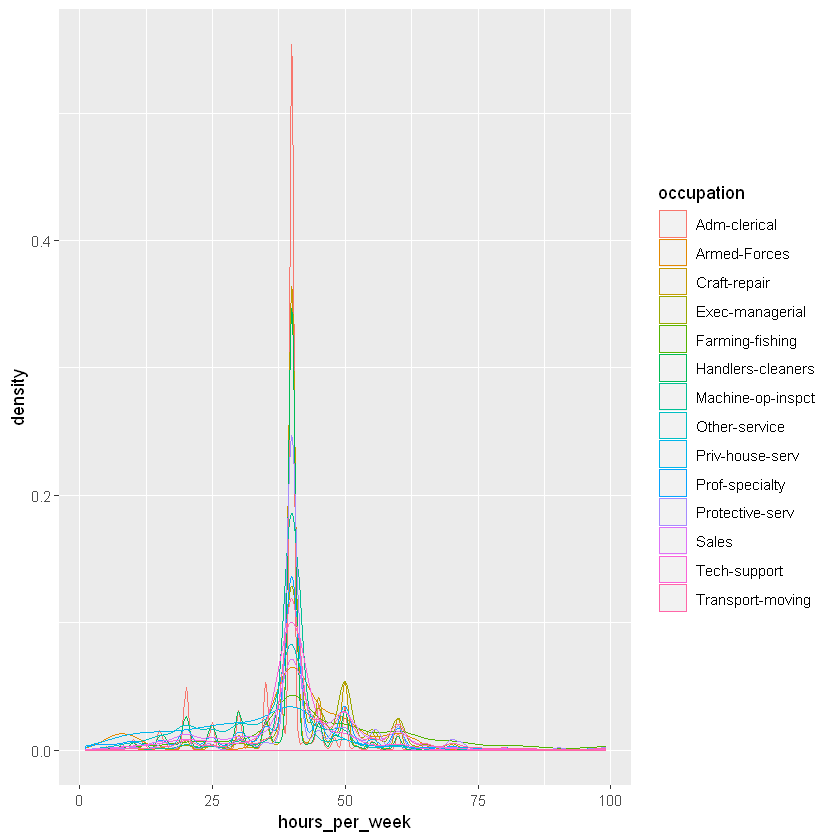

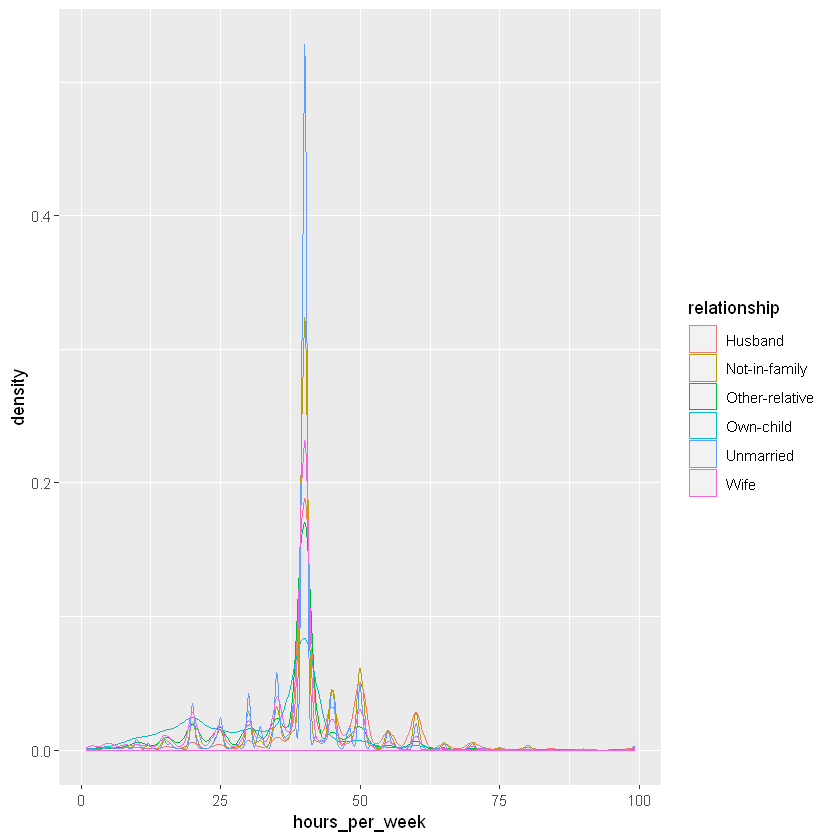

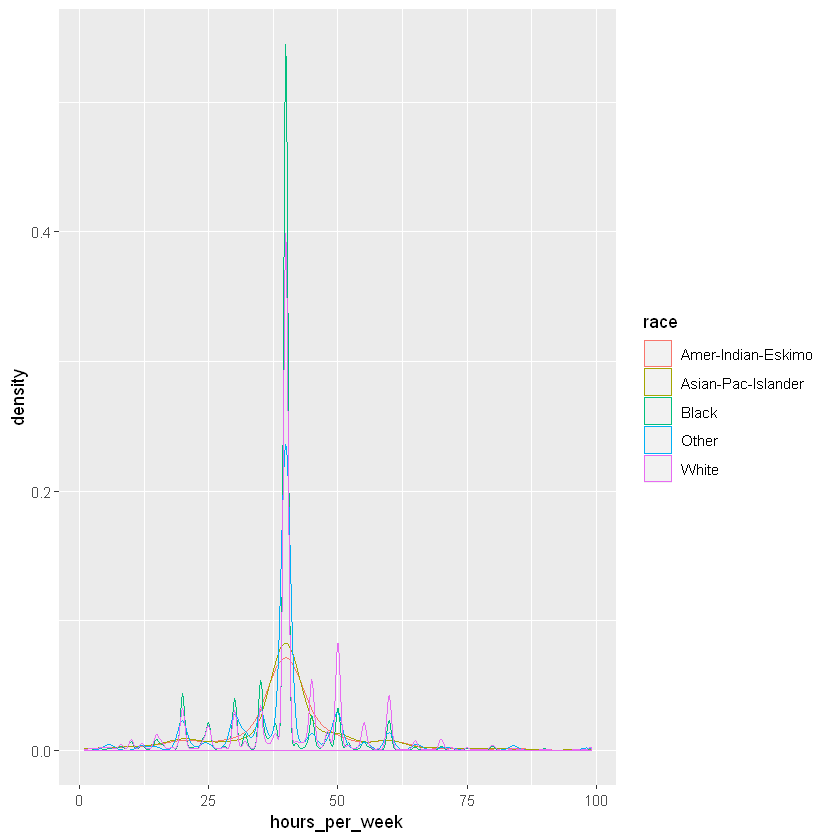

Warning message:
"Groups with fewer than two data points have been dropped."

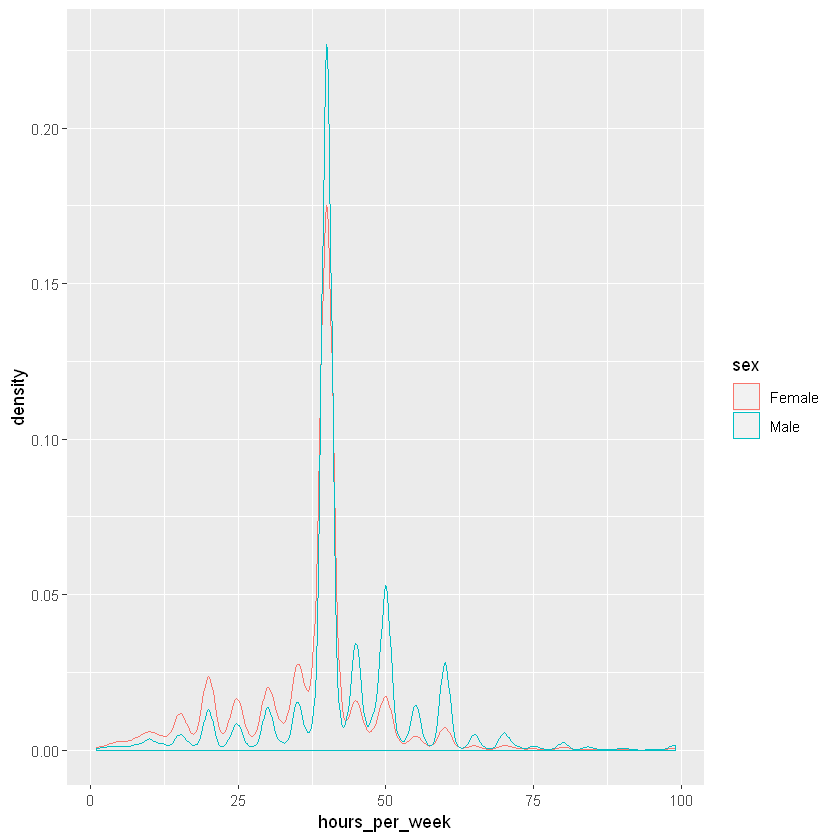

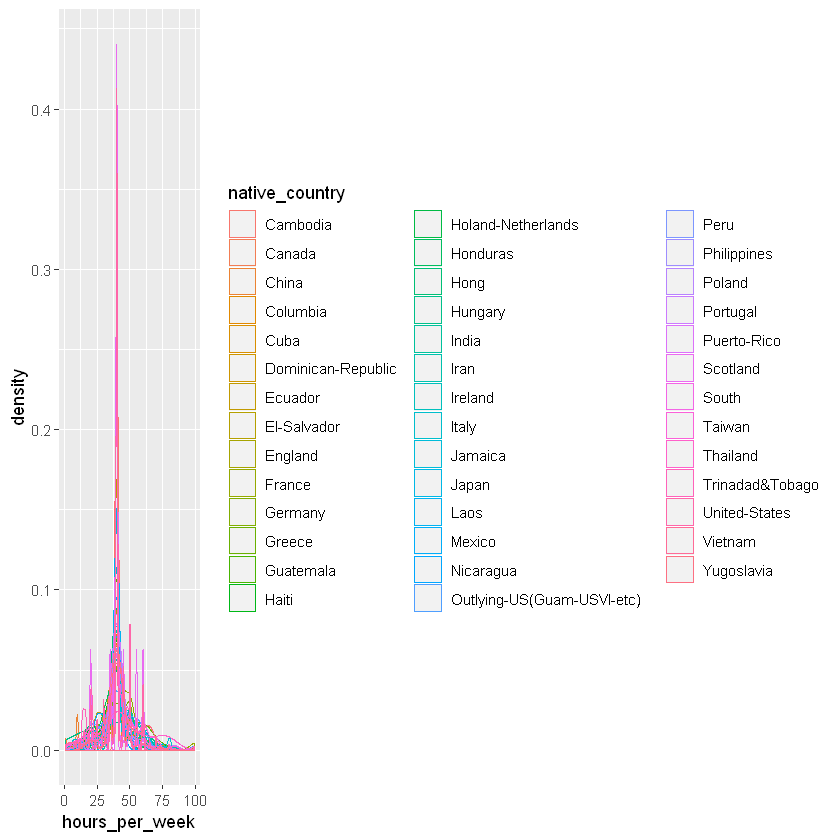

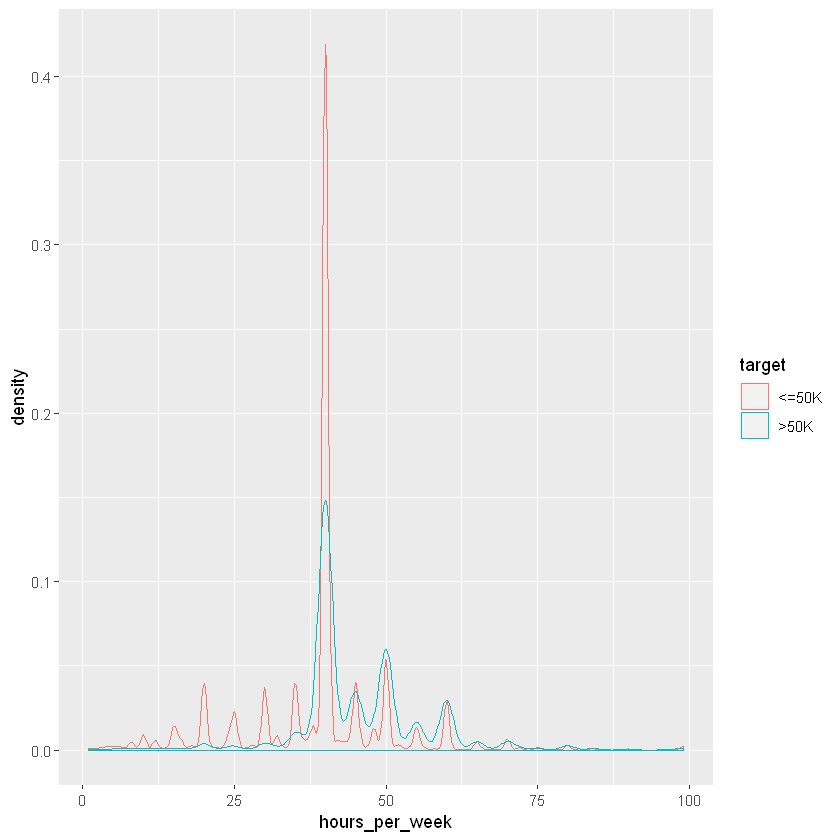

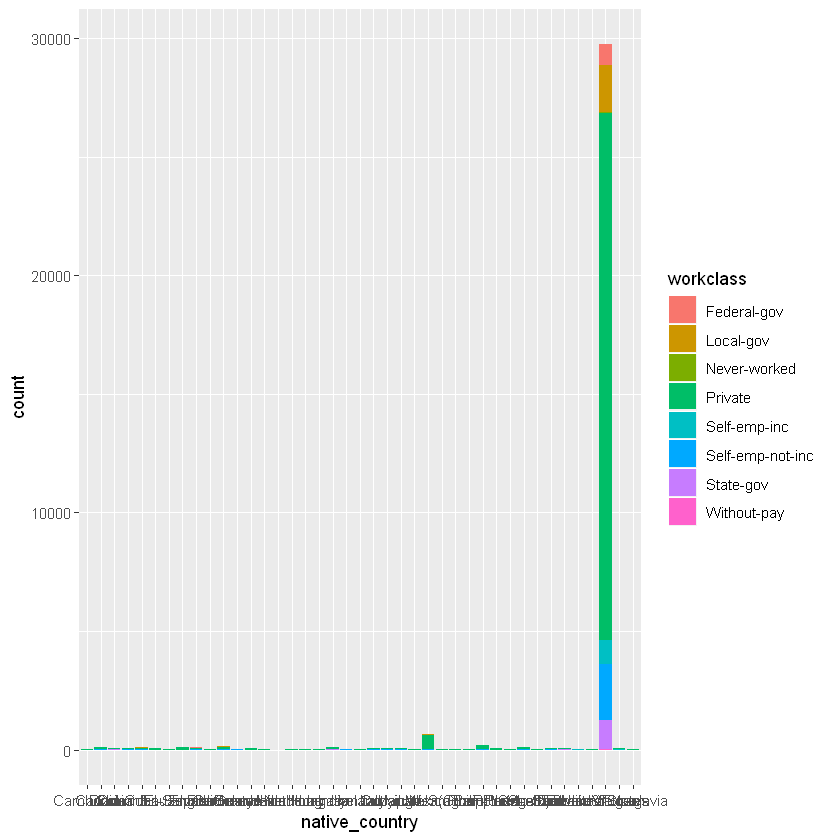

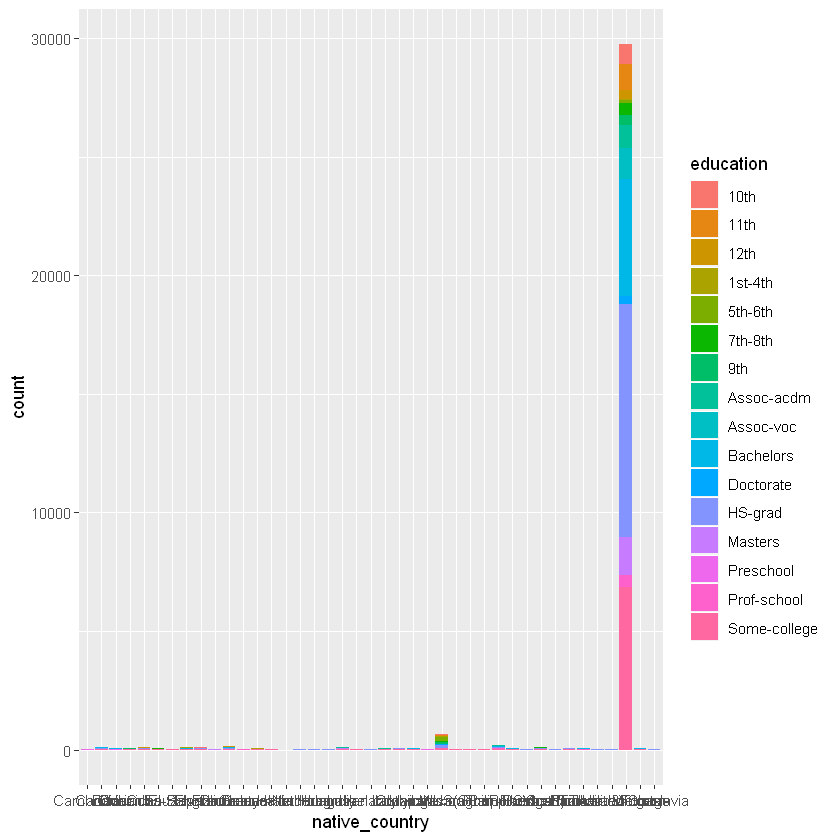

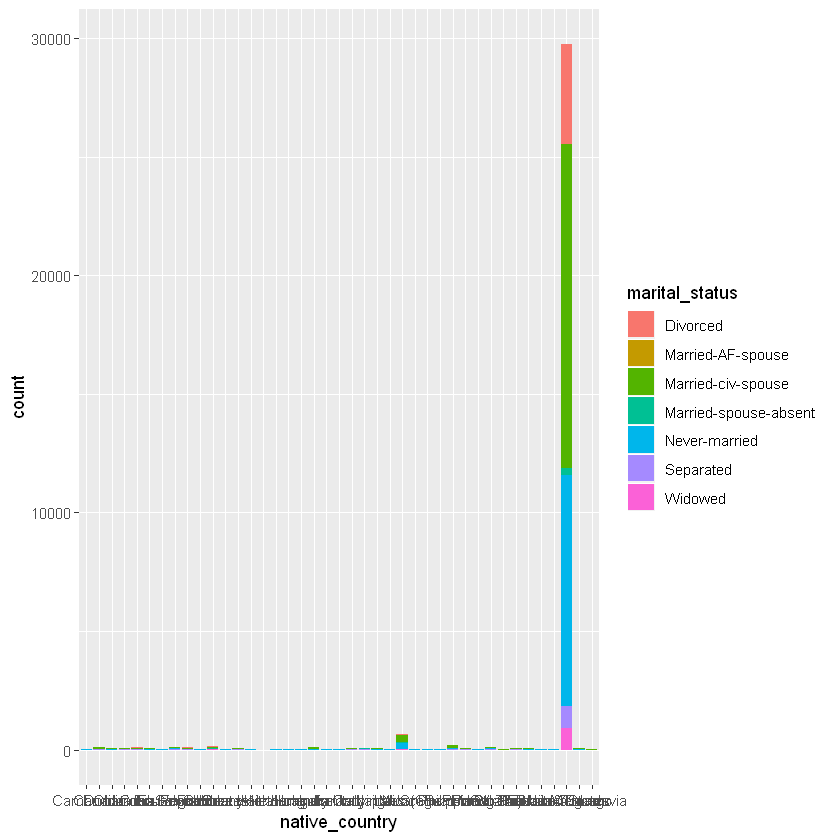

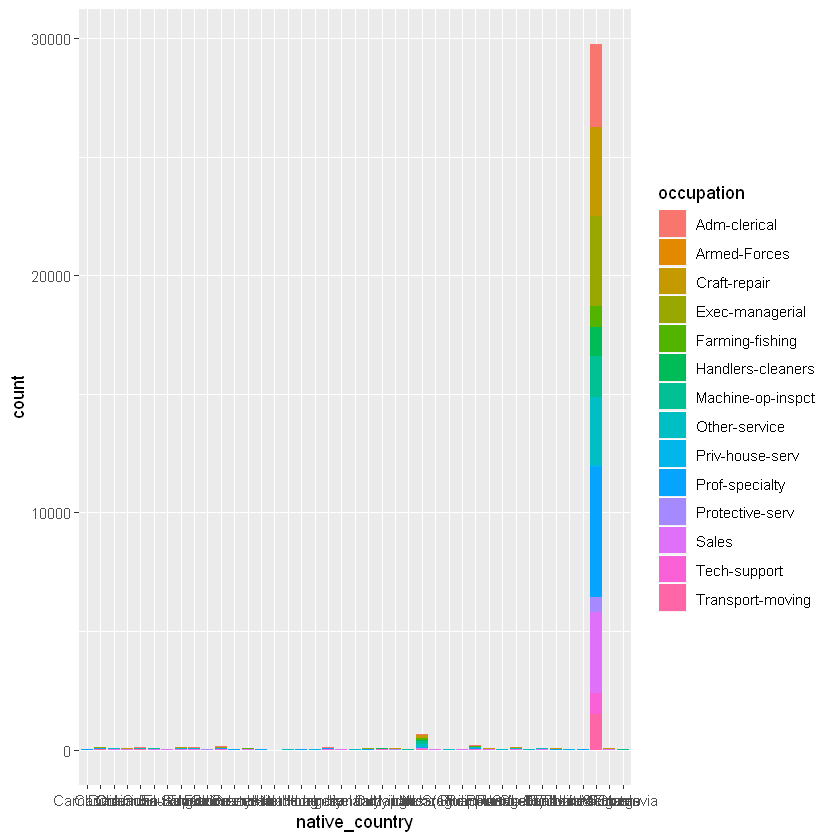

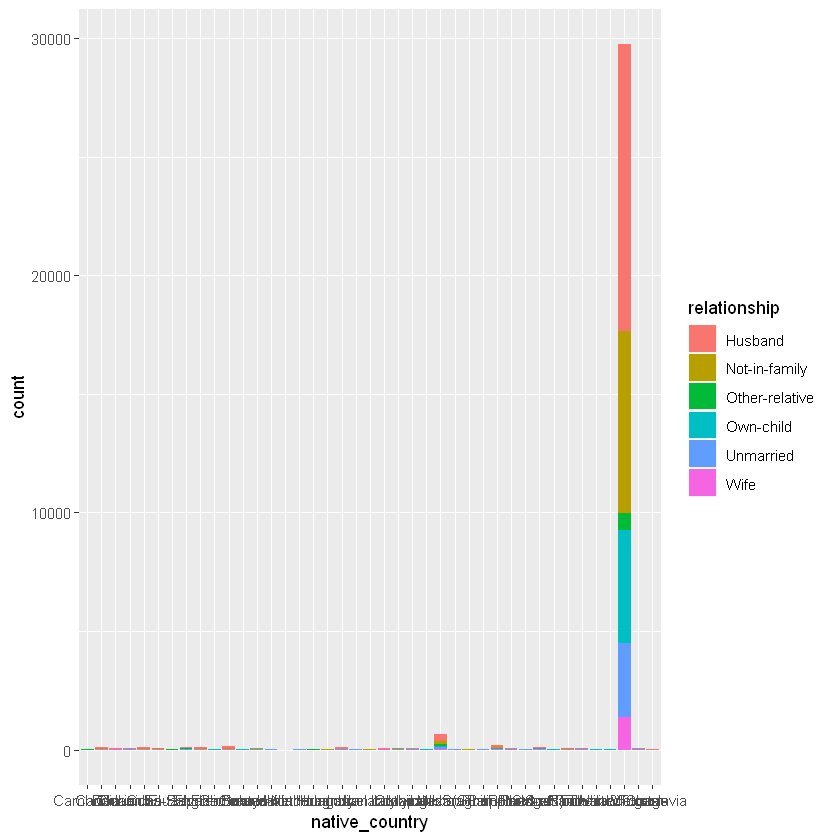

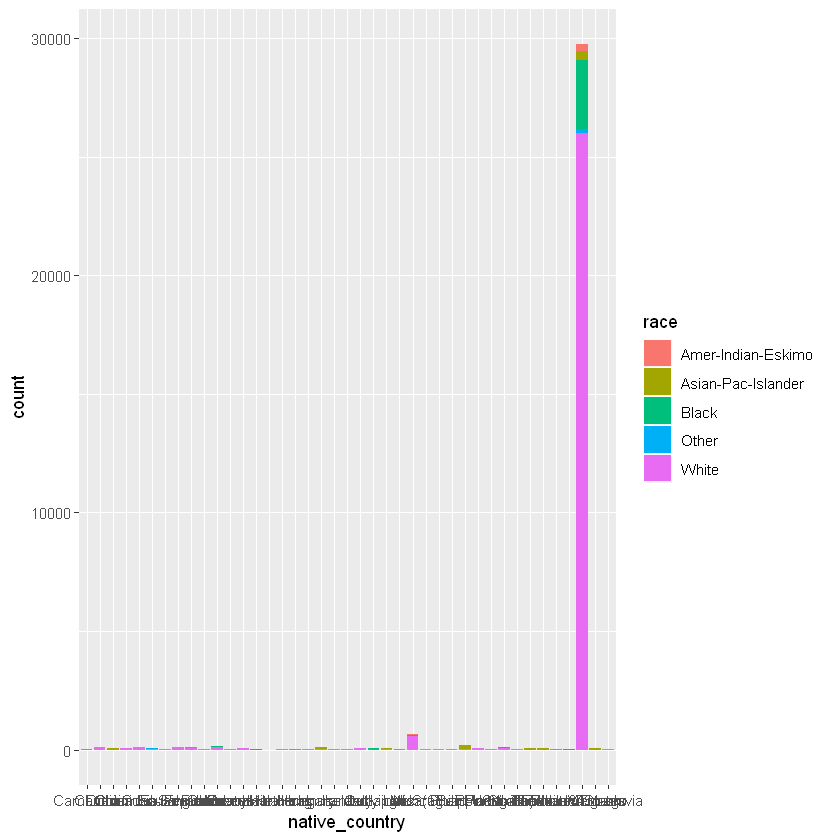

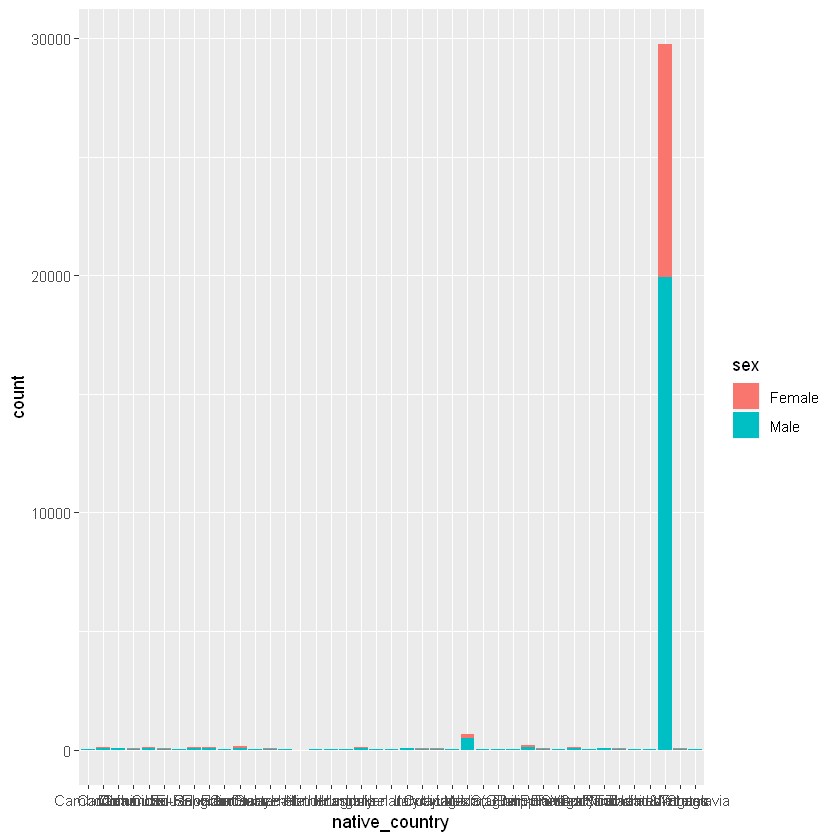

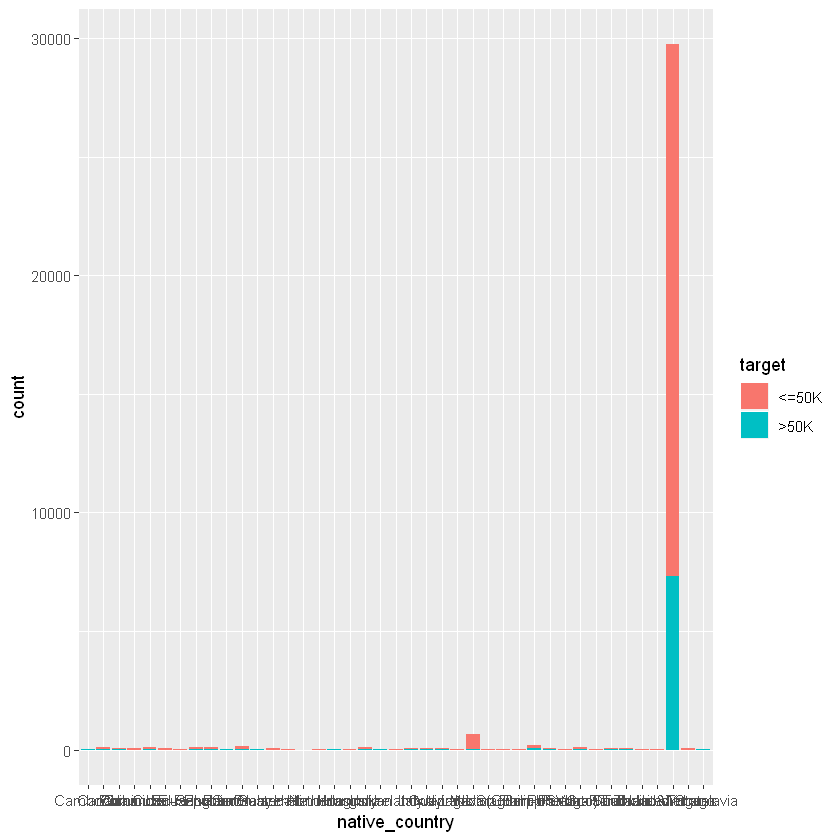

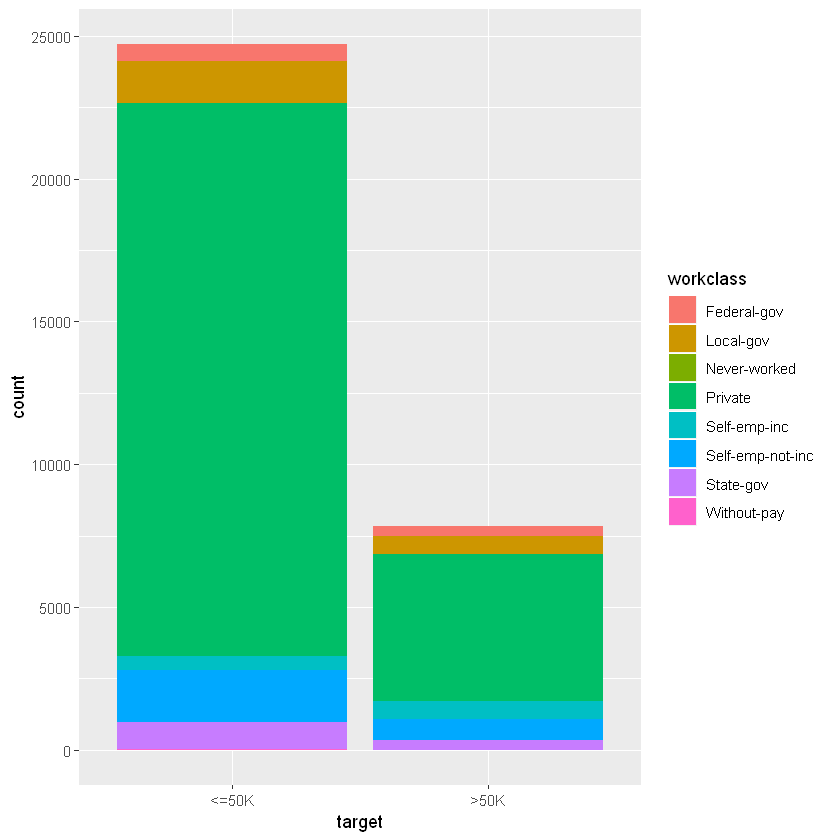

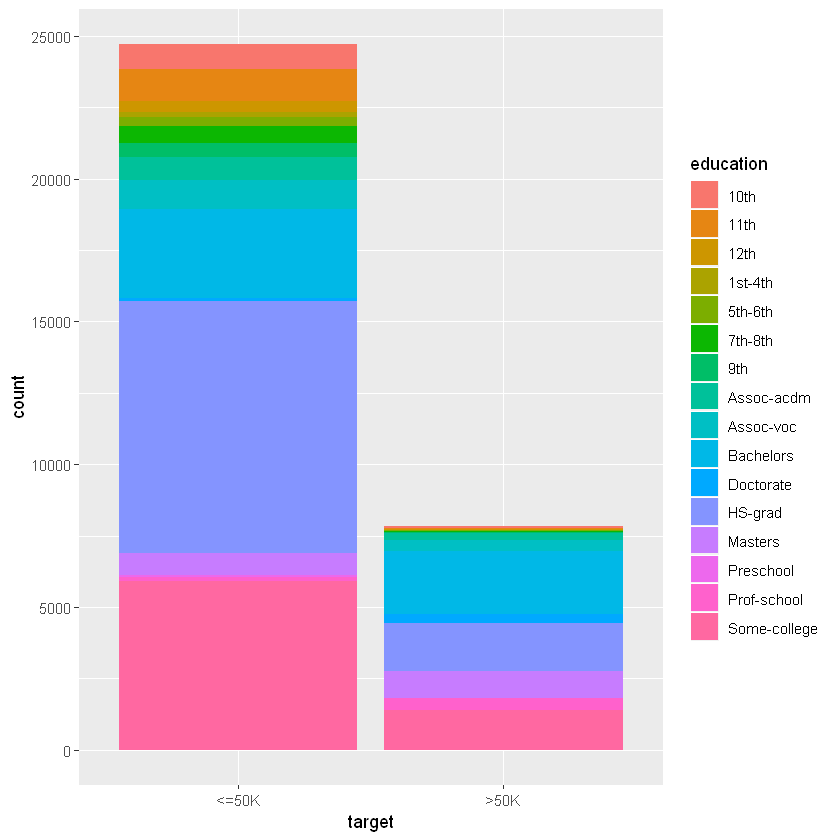

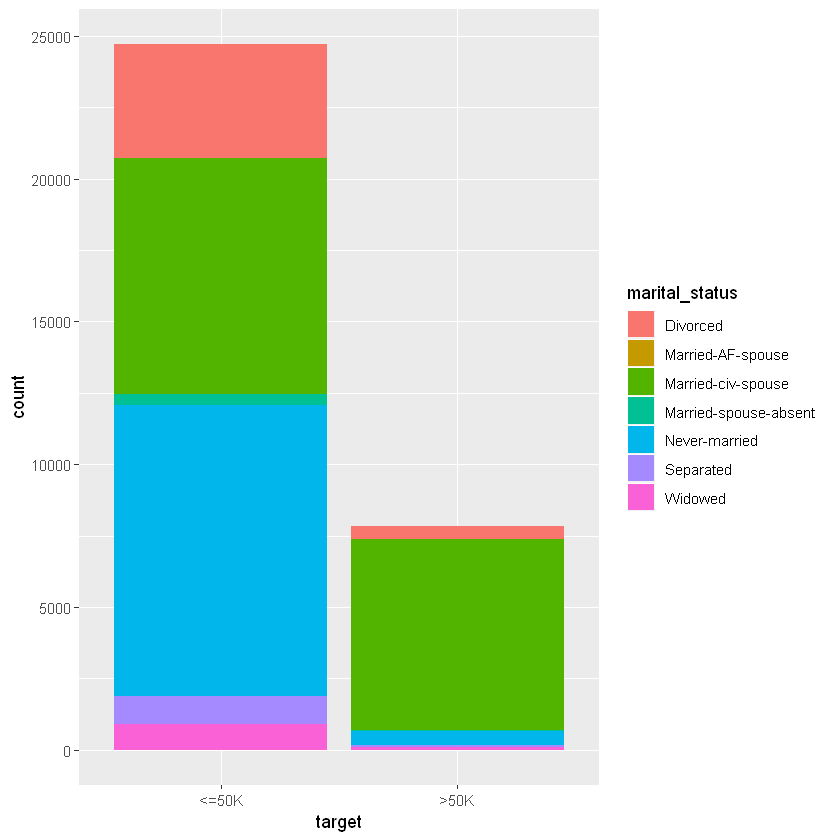

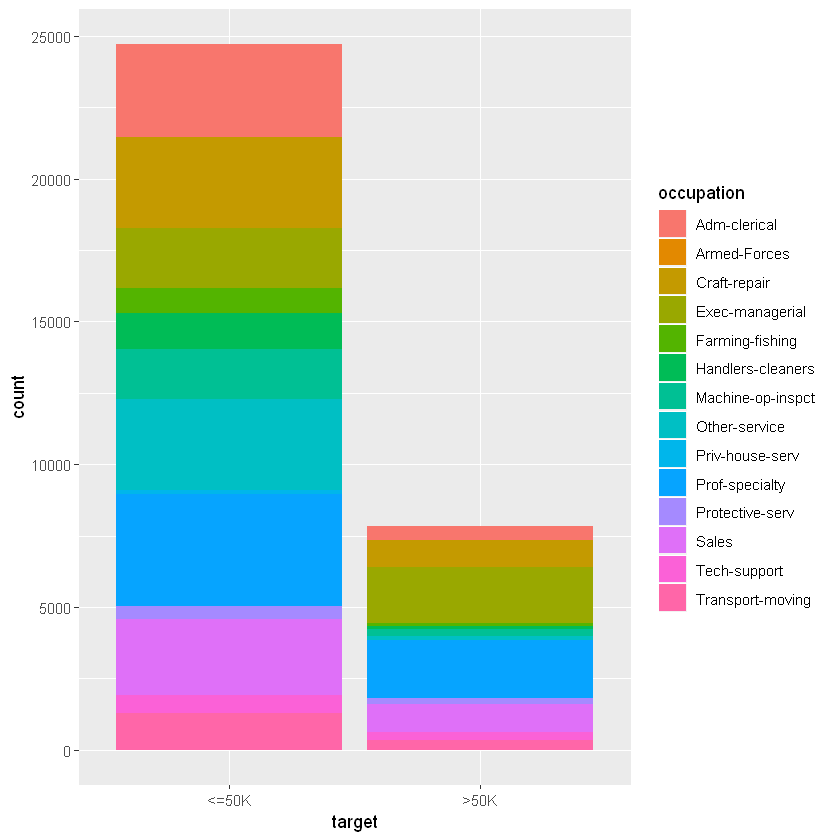

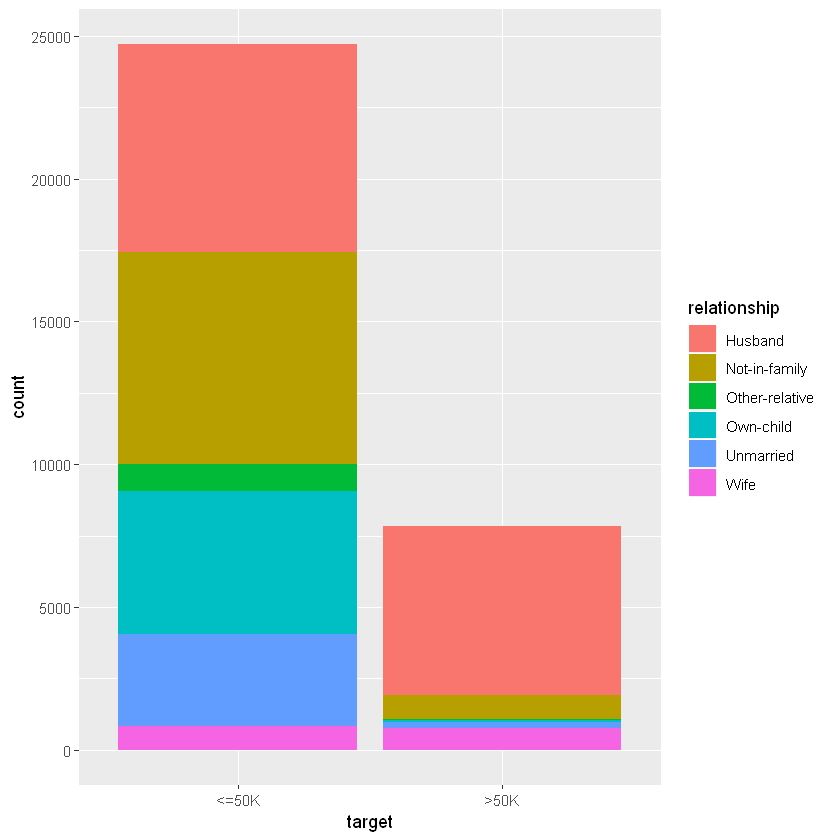

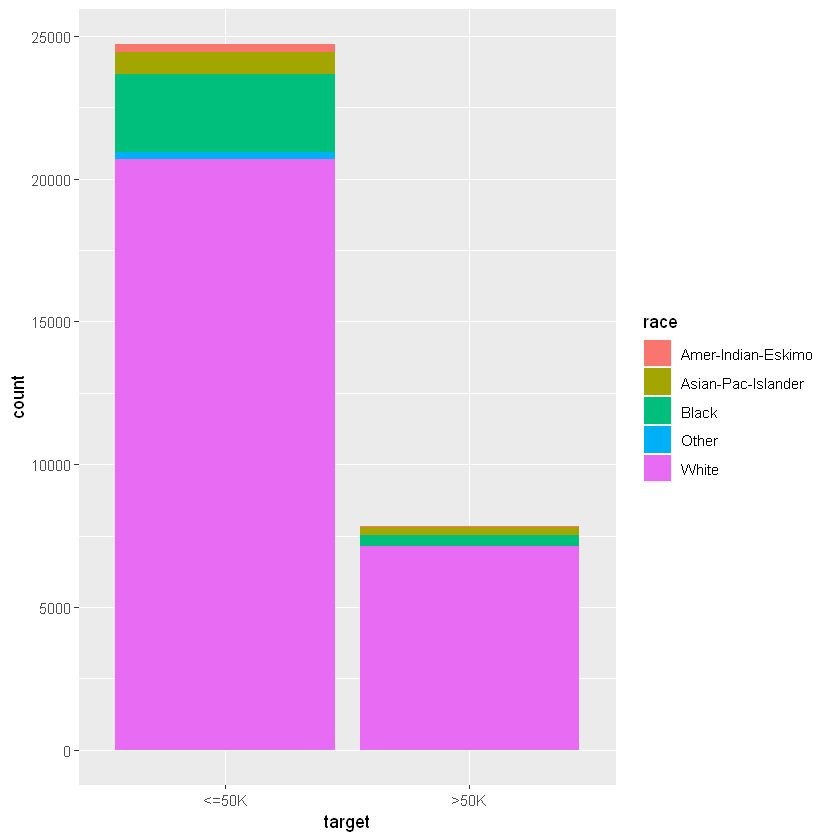

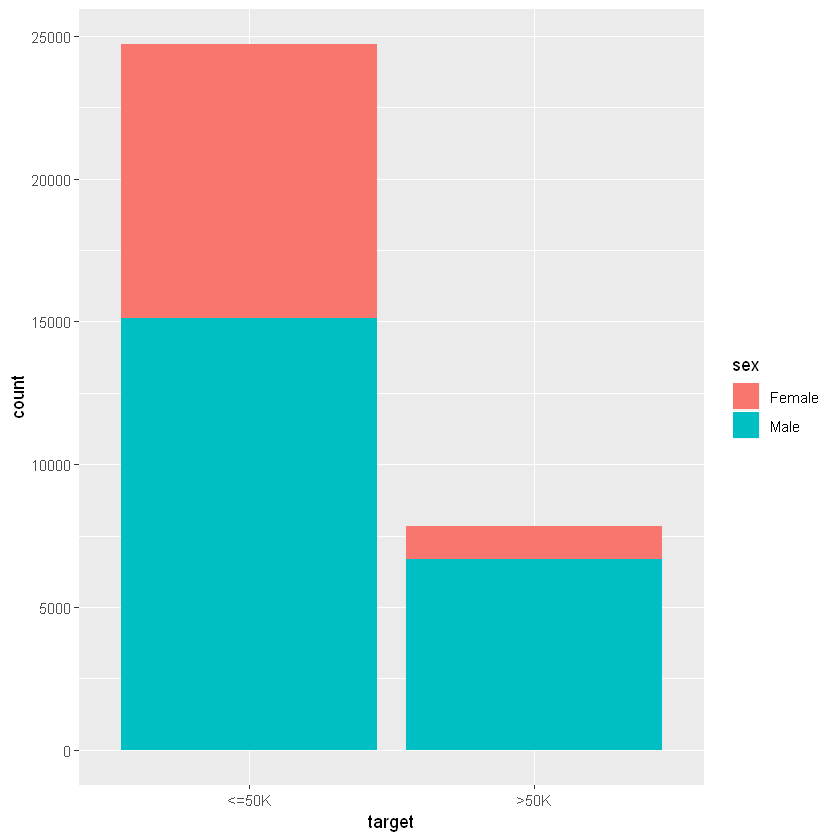

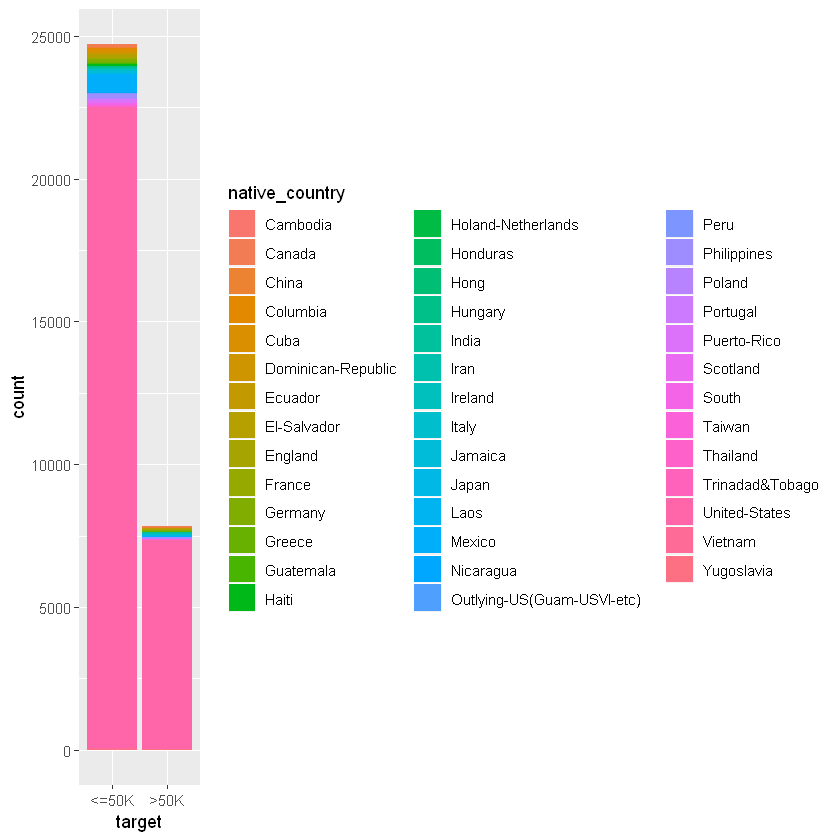

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  9384 1500
     >50K    504 1636
                                          
               Accuracy : 0.8461          
                 95% CI : (0.8398, 0.8523)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.528           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5217          
            Specificity : 0.9490          
         Pos Pred Value : 0.7645          
         Neg Pred Value : 0.8622          
             Prevalence : 0.2408          
         Detection Rate : 0.1256          
   Detection Prevalence : 0.1643          
      Balanced Accuracy : 0.7354          
                                          
       'Positive' Class : >50K            
                                          
Confusion Matrix and 

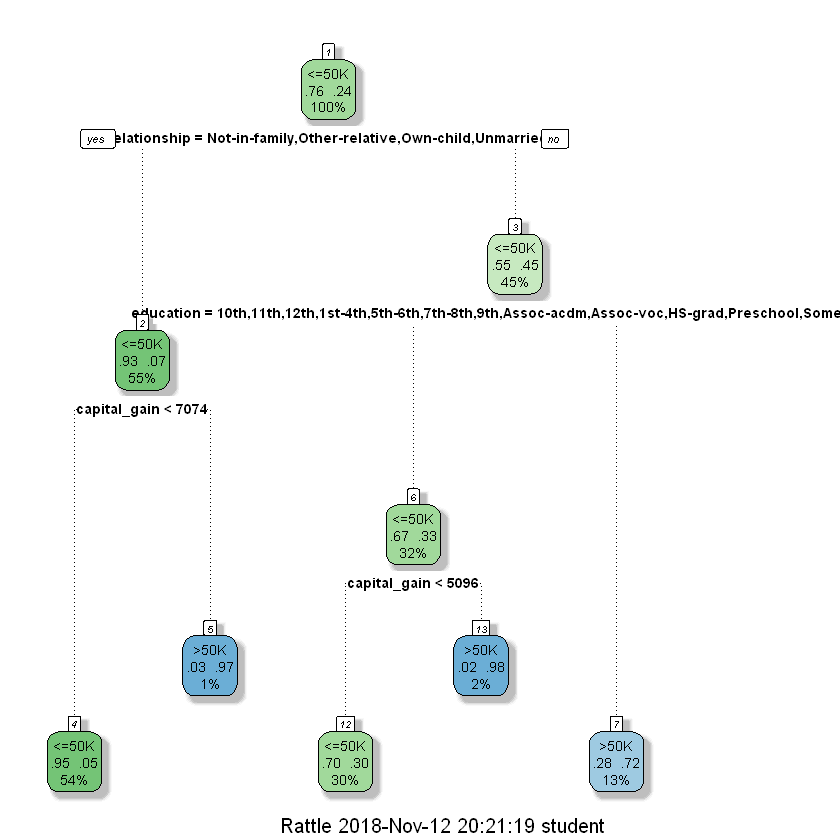

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  7037 1144
     >50K    379 1208
                                          
               Accuracy : 0.8441          
                 95% CI : (0.8367, 0.8512)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5203          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5136          
            Specificity : 0.9489          
         Pos Pred Value : 0.7612          
         Neg Pred Value : 0.8602          
             Prevalence : 0.2408          
         Detection Rate : 0.1237          
   Detection Prevalence : 0.1625          
      Balanced Accuracy : 0.7312          
                                          
       'Positive' Class : >50K            
                                          


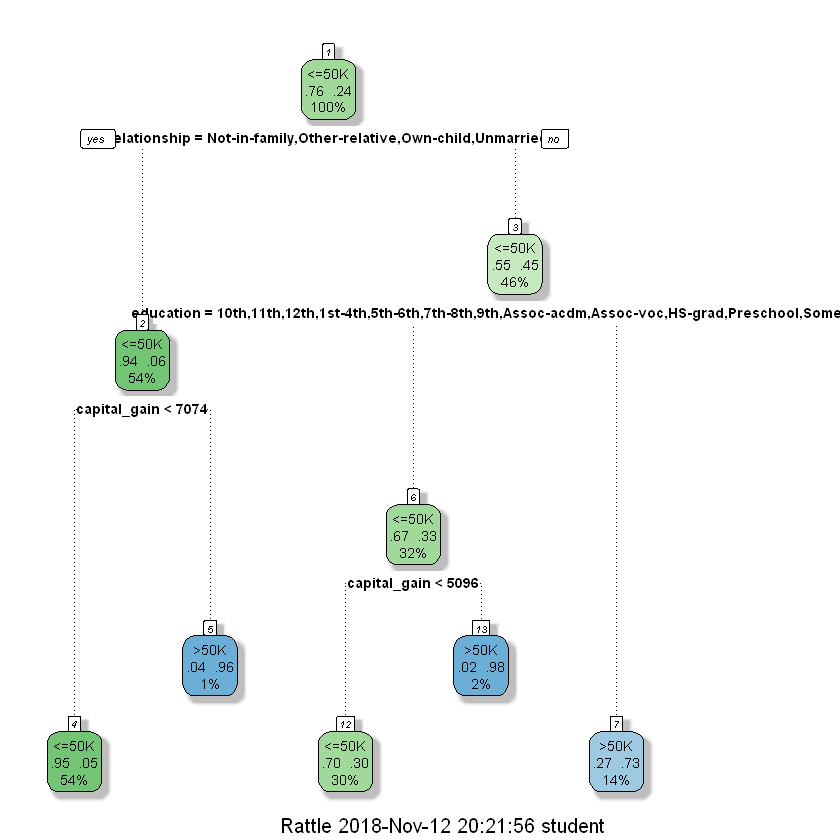

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  4695  754
     >50K    249  814
                                         
               Accuracy : 0.846          
                 95% CI : (0.837, 0.8547)
    No Information Rate : 0.7592         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5267         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.5191         
            Specificity : 0.9496         
         Pos Pred Value : 0.7658         
         Neg Pred Value : 0.8616         
             Prevalence : 0.2408         
         Detection Rate : 0.1250         
   Detection Prevalence : 0.1632         
      Balanced Accuracy : 0.7344         
                                         
       'Positive' Class : >50K           
                                         


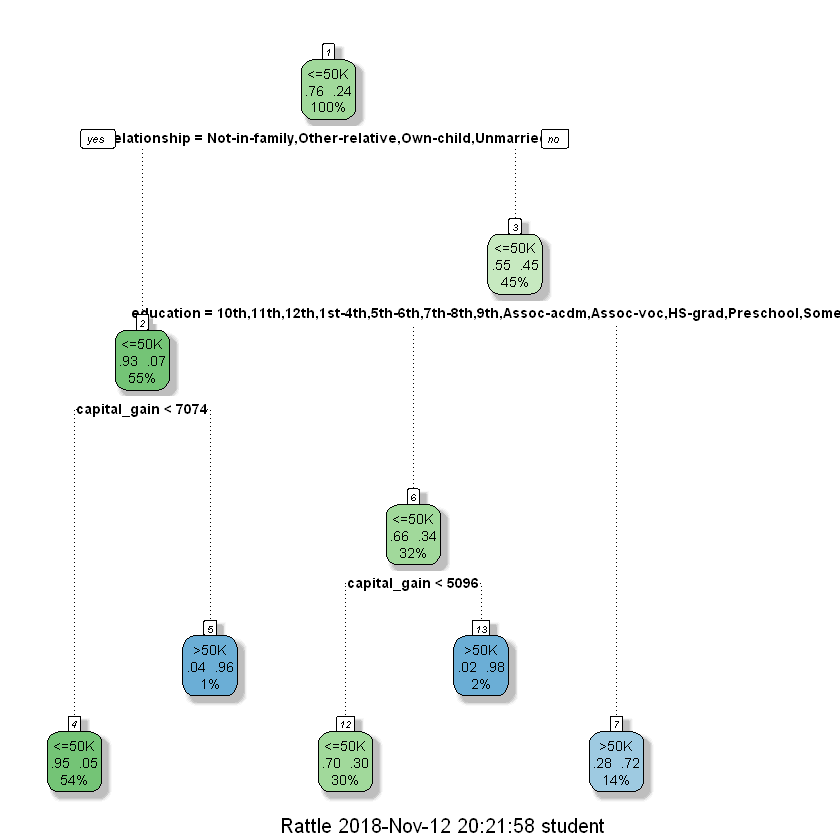

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  2346  372
     >50K    126  412
                                          
               Accuracy : 0.8471          
                 95% CI : (0.8342, 0.8593)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5315          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5255          
            Specificity : 0.9490          
         Pos Pred Value : 0.7658          
         Neg Pred Value : 0.8631          
             Prevalence : 0.2408          
         Detection Rate : 0.1265          
   Detection Prevalence : 0.1652          
      Balanced Accuracy : 0.7373          
                                          
       'Positive' Class : >50K            
                                          


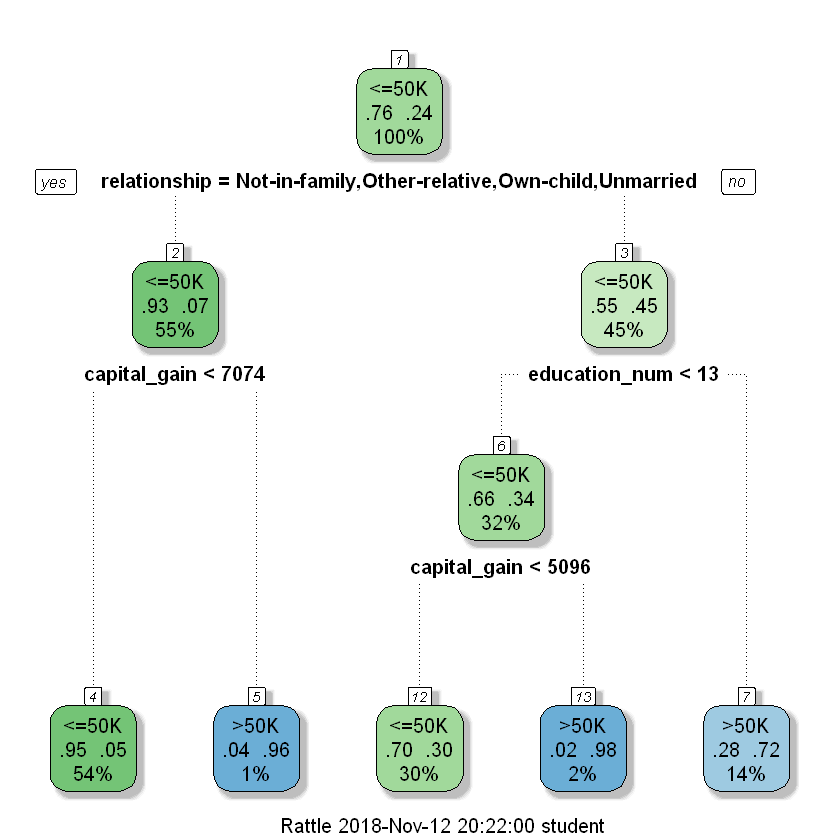

In [1]:

knitr::opts_chunk$set(echo = TRUE)
library(ggplot2)
library(caret)
library(rpart)
library(rattle)
library(lattice)
df = read.csv("adult.csv", header = FALSE)

names(df) = c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
  "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
  "hours_per_week", "native_country", "target")


#5. Fix missing values
for(i in 1:ncol(df)){
    
    if(is.numeric(df[,i])){
        df[,i][is.na(df[,i])] = mean(df[,i], na.rm=TRUE)
      
 
    }else if(is.factor(df[,i])){
        mode = levels(df[,i])[which.max(table(df[,i]))]
        df[,i][df[,i] == "?"] = mode
        
    }
}

###6. Graphs of bars and densities
GraphicalInfo = function(x){
  
for(i in 1:ncol(x)){
  if(is.numeric(x[,i])){
    for(j in 1:ncol(x)){
      if(is.factor(x[,j])){  
        print(ggplot() + geom_density(x, mapping = aes(x = x[,i], color = x[,j])) 
                    + labs(x = names(x)[i], color = names(x)[j]))
      }
    }
  } else if(is.factor(x[,i])){
      for(j in 1:ncol(x)){
        if(is.factor(x[,j]) & i != j){
          print(ggplot() + geom_bar(x, mapping = aes(x = x[,i], fill = x[,j]))
                   + labs(x = names(x)[i], fill = names(x)[j]))
        }
      }
    }
    
#if statements added to shrink number of results and target actually interesting ones  
}
}
GraphicalInfo(df)

##Building model with rpart package
#Split Data
splitIndex <- createDataPartition(df$target, p = .60, list = FALSE, times = 1)
train <- df[ splitIndex,]
test <- df[-splitIndex,]

#Create and plot tree
mytree <- rpart(target ~ ., data = train, method = "class")
fancyRpartPlot(mytree)

#Test accuracy of model
pred <- predict(mytree,test, type = "class")
cm=confusionMatrix(data = pred, reference = test$target, positive = ">50K")
print(cm)
#Caret model building
model = train(target ~ ., data = train, method = "rpart")
pred2=predict(model,test)

cm2=confusionMatrix(pred2, test$target, positive= ">50K")
print(cm2)


#Function to do the same thing
Buildmodel = function(x,target,p){
splitIndex <- createDataPartition(x$target, p = p, list = FALSE, times = 1)
train <- x[ splitIndex,]
test <- x[-splitIndex,]

#Create and plot tree
mytree <- rpart(target ~ ., data = train, method = "class")
fancyRpartPlot(mytree)

#Test accuracy of model
pred <- predict(mytree,test, type = "class")
cm=confusionMatrix(data = pred, reference = test$target, positive = ">50K")
print(cm)
}

Buildmodel(df,target,.7)
Buildmodel(df,target,.8)
Buildmodel(df,target,.9)